In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lastgangprognose basierend auf Open Data des Kantons Basel-Stadt


**Studiengang:**  
Msc. Wirtschaftsinformatik   
**Modul:**  
Business Intelligence & Analytics  
**Autoren:**   
Sebastian Eduard Breu, Bleron Bytyqi, Antonin Hüsler, Marcel Troxler, Yanik Waser  

# 1 Einleitung

Der Energiesektor steht vor grossen Herausforderungen. Die Elektrizitätsversorgung soll klimafreundlicher, dezentraler und zugleich zuverlässig bleiben. In der Schweiz trägt die Energiestrategie 2050 massgeblich zu diesem Wandel bei. Sie setzt auf den Ausbau erneuerbarer Energien, die Reduktion fossiler Energieträger sowie auf eine höhere Energieeffizienz. Für Energieversorgungsunternehmen bedeutet dies, dass Stromerzeugung und Stromverbrauch zunehmend schwieriger planbar werden, da sie stärker vom Wetter und vom Verbrauchsverhalten abhängen.

In diesem Umfeld gewinnen Lastprognosen, also Vorhersagen darüber, wie viel Strom in einem bestimmten Gebiet verbraucht oder eingespeist wird, zunehmend an Bedeutung. Sie stellen nicht nur ein strategisches Steuerungsinstrument dar, sondern sind auch regulatorisch vorgeschrieben. Gemäss dem Best-Practice-Papier des Verbands Schweizerischer Elektrizitätsunternehmen (VSE, 2025) müssen Bilanzgruppen und Lieferanten ihre Prognosen täglich aktualisieren, auch an Wochenenden und Feiertagen, um ihre Strompositionen am Markt optimal zu bewirtschaften. Ziel ist es, kostenintensive Ausgleichsenergie zu vermeiden, die entsteht, wenn der tatsächliche Stromverbrauch vom geplanten Verbrauch abweicht.

Je nach Zeithorizont erfüllen Prognosen unterschiedliche Funktionen:

- Langfristprognosen (Monate bis Jahre) dienen der strategischen Einkaufsplanung, der Budgetierung und der Modellkalibrierung.
- Day-Ahead-Prognosen liefern Verbrauchs- und Produktionsschätzungen für den Folgetag und bilden die Grundlage für die Marktpositionierung.
- Intraday-Prognosen ermöglichen eine laufende Anpassung während des Liefertages, beispielsweise bei kurzfristigen Wetterumschwüngen oder Lastspitzen.
- Nowcasting liefert kurzfristige Schätzungen für die nächsten Minuten bis Stunden, insbesondere hilfreich bei der Integration von Solarstrom.

Diese Arbeit fokussiert sich auf die Entwicklung einer Day-Ahead-Prognose für einen fiktiven Energieversorger im Kanton Basel-Stadt. Ziel ist es, mithilfe historischer Verbrauchsdaten, Lufttemperatur sowie weiterer Einflussgrössen wie Kalenderdaten vorherzusagen, wie viel Strom am kommenden Tag benötigt wird. Die Prognose könnte als Grundlage dienen für eine kostenoptimierte Beschaffung und eine stabile Netzführung.



## 1.1 Vorgehen

Als methodische Grundlage wird das CPA-Rahmenwerk «From Data to Decisions» verwendet. Dieses beschreibt einen strukturierten Analyseprozess in fünf Schritten: Zieldefinition, Datensammlung, Datenanalyse, Informationsaufbereitung und Entscheidungsfindung (Chartered Professional Accountants Canada, 2020).

Die Struktur dieser Arbeit orientiert sich an den ersten vier Schritten des CPA-Rahmenwerks. Die Kapitel folgen einer klaren Abfolge:

1. Definition von Zielen und Informationsbedarf
2. Datensammlung
3. Datenanalyse
4. Präsentation der Informationen


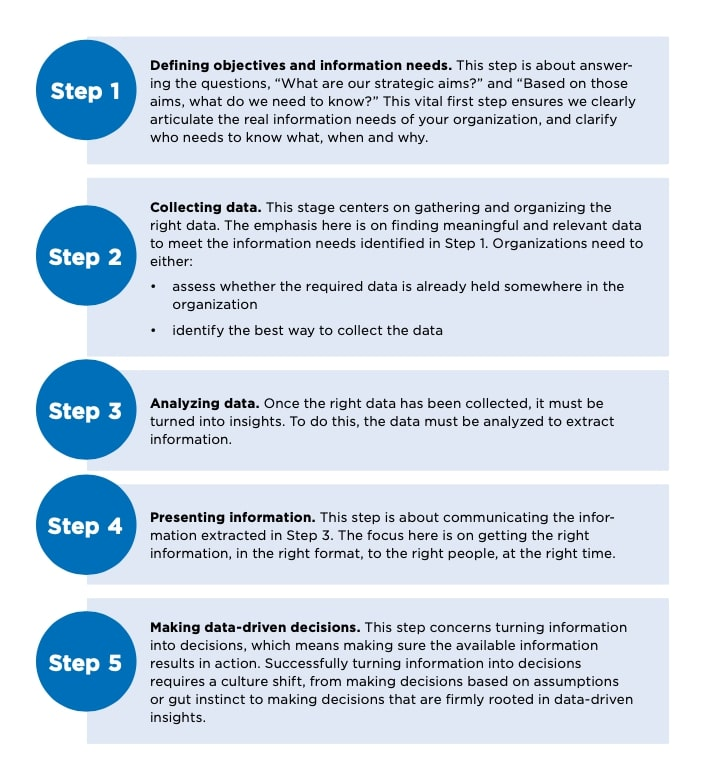

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/CPA_Process.jpg')
#Abbildung 1: CPA Prozess (Chartered Professional Accountants Canada, 2020)

# 2 Definition von Zielen und Informationsbedarf

Gemäss dem CPA-Leitfaden «From Data to Decisions» beginnt jeder datenbasierte Analyseprozess mit der klaren Definition des Ziels sowie des zugehörigen Informationsbedarfs (Chartered Professional Accountants Canada, 2020).   
  


## 2.1 Zieldefinition

Ziel dieser Arbeit ist die Entwicklung einer Day-Ahead-Prognose für den Stromverbrauch eines fiktiven Energieversorgers im Kanton Basel-Stadt. Die Prognose soll ermitteln, wie viel Strom im Versorgungsgebiet am Folgetag benötigt wird. Idealerweise erfolgt die Vorhersage in Intervallen von 15 Minuten. Abhängig vom eingesetzten Prognoseverfahren kann eine derart feine zeitliche Auflösung jedoch anspruchsvoll sein (siehe Kapitel 4.4).

Obwohl das betrachtete Unternehmen hypothetisch ist, ist diese Art der Prognose für reale Energieversorger von grosser Bedeutung. Eine verlässliche Verbrauchsprognose bildet die Grundlage für zentrale Aufgaben in der Energieversorgung:

- Sie ermöglicht eine bedarfsgerechte Strombeschaffung am Day-Ahead-Markt und trägt zur Kostenoptimierung bei.
- Sie unterstützt die Netzplanung, insbesondere zur Vermeidung von Überlastungen oder Lastspitzen.
- Sie hilft, Ausgleichsenergie zu vermeiden, die anfällt, wenn die tatsächliche Stromabnahme stark von der geplanten abweicht.
- Sie ist erforderlich zur Einhaltung regulatorischer Vorgaben, etwa der Pflicht zur täglichen Aktualisierung der Prognose (VSE, 2025).

Die Prognose ist somit ein zentrales Instrument für eine wirtschaftliche, zuverlässige und regelkonforme Energieversorgung. Die vorliegende Arbeit nutzt ein hypothetisches Szenario, um diesen Zusammenhang anwendungsorientiert und datenbasiert abzubilden.

Obwohl das Ziel auf eine klassische Day-Ahead-Prognose ausgerichtet ist, wurde im Rahmen dieser Arbeit jeweils eine Vorhersage über sieben Tage hinweg erstellt. Diese erweiterte Betrachtung dient dazu, systematisch zu untersuchen, ob und wie stark sich die Prognosegüte mit zunehmender zeitlicher Distanz zum letzten Trainingspunkt verschlechtert. Der gesamte Prognosehorizont bietet somit zusätzliche Erkenntnisse über die Robustheit und Stabilität der gewählten Modelle.



## 2.2 Informationsbedarf

Zur Erreichung der definierten Ziele ist es notwendig, den Informationsbedarf präzise festzulegen. Im Zentrum stehen dabei zwei grundlegende Datenquellen:

**Historische Lastgangdaten**  
Diese Daten bilden den tatsächlichen Stromverbrauch im Versorgungsgebiet des Energieversorgers in der Vergangenheit ab. Sie dienen als zentrale Grundlage zur Modellierung typischer Verbrauchsmuster. Um eine ausreichende Prognosegenauigkeit zu erzielen, sollten die Lastgänge idealerweise in Intervallen von 15 Minuten vorliegen. Dies entspricht dem vom Verband Schweizerischer Elektrizitätsunternehmen empfohlenen Standard für Prognose- und Bilanzierungsprozesse (VSE, 2025).

**Historische Wetterdaten**  
Da vermutet wird, dass der Stromverbrauch vom Wetter abhängt, werden zusätzlich historische Wetterdaten benötigt. Diese helfen dabei, den Einfluss der Witterung auf den Stromverbrauch quantitativ zu erfassen. In dieser Arbeit beschränken wir uns bei den Wetterdaten auf die Lufttemperatur. Es wird angenommen, dass ein Zusammenhang zwischen Lufttemperatur und Stromverbrauch besteht. Diese Annahme wird im Verlauf der Arbeit durch eine explorative Analyse überprüft, um zu beurteilen, ob die Temperatur als exogene Variable sinnvoll in ein Prognosemodell integriert werden kann.


# 3 Datensammlung

In diesem Kapitel wird beschrieben, welche Datensätze aus welchen Quellen bezogen wurden und wie diese aufbereitet wurden, um die nachfolgenden Analysen zu ermöglichen.


## 3.1 Datenquellen

Alle in diesem Projekt verwendeten Datensätze stammen aus offiziellen und öffentlich zugänglichen Quellen.

Ein zentraler Bestandteil ist das Datenportal des Kantons Basel-Stadt ([data.bs.ch](https://data.bs.ch/pages/home/)). Dieses Portal dient als zentrale Plattform für offene Behördendaten (Open Government Data) des Kantons Basel-Stadt. Es wird vom Statistischen Amt betrieben und stellt eine Vielzahl von Datensätzen aus unterschiedlichen Verwaltungsbereichen zur Verfügung.

Zusätzlich wurden Wetterdaten der Messstation Basel Binningen von MeteoSchweiz verwendet. MeteoSchweiz ist der nationale Wetterdienst der Schweiz und stellt hochwertige meteorologische Daten öffentlich zur Verfügung.

Für dieses Projekt wurden folgende Datensätze verwendet:

1. **Kantonaler Stromverbrauch**  
   Quelle: [data.bs.ch – Kanton Basel-Stadt](https://data.bs.ch/explore/dataset/100233/information/?sort=timestamp_interval_start)

2. **Wetterdaten der Messstation Basel / Binningen (BAS)**  
   Quelle: [MeteoSchweiz – Daten ohne Programmierkenntnisse herunterladen](https://www.meteoschweiz.admin.ch/service-und-publikationen/applikationen/ext/daten-ohne-programmierkenntnisse-herunterladen.html#lang=de&mdt=normal)  
   
   


### 3.1.1 Kantonaler Stromverbrauch

Der verwendete Datensatz beschreibt die im Kanton Basel-Stadt bezogene elektrische Energie in Intervallen von 15 Minuten. Er enthält die Summe der aus dem öffentlichen Stromnetz entnommenen Energie, inklusive Netzverlusten. Lokal erzeugte und direkt verbrauchte Energie, zum Beispiel aus Photovoltaikanlagen, die nicht ins Netz eingespeist wird, ist in diesen Werten nicht enthalten.

Die Messwerte basieren auf fernauslesbaren Zählern, die im kantonalen Netz installiert sind. Da nicht sämtliche Zähler fernauslesbar sind, werden die Daten zusätzlich durch Informationen zur Netzeinspeisung ergänzt. Seit dem 1. September 2020 erlaubt der Datensatz eine Unterscheidung zwischen dem Verbrauch in der Grundversorgung und jenem im freien Strommarkt. Der Datensatz wird täglich aktualisiert und steht als CSV-Datei zum Download bereit.

Für dieses Projekt wurde der gesamte verfügbare Zeitraum vom 1. Januar 2012 bis zum 15. April 2025 exportiert.

Die Abbildung bietet einen ersten Überblick über den Datensatz.


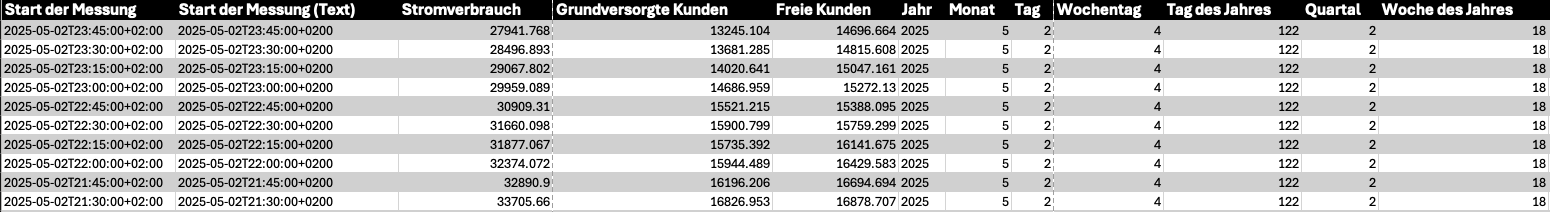

In [3]:
from IPython.display import Image
Image('//content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/Screenshot_Stromverbrauch.png')
#Abbildung 2: Screenshot des Datensatz "Kantonaler Stromverbrauch"

Die folgende Tabelle beschreibt das Schema des Datensatzes zum kantonalen Stromverbrauch:

| **Spalte**                  | **Beschreibung**                                                                                          | **Einheit**       | **Datentyp**       |
|:---------------------------|:-----------------------------------------------------------------------------------------------------------|:------------------|:-------------------|
| Start der Messung          | Beginn der Messperiode im Datetime-Format.                                                                | –                 | Datetime           |
| Start der Messung (Text)   | Beginn der Messperiode als Textwert.                                                                      | –                 | String             |
| Stromverbrauch             | Stromverbrauch während der Messperiode, enthält Grundversorgung und freie Kunden.                         | kWh   | Float              |
| Grundversorgte Kunden      | Stromverbrauch aller Kundinnen und Kunden in der Grundversorgung während der Messperiode.                 | kWh   | Float              |
| Freie Kunden               | Stromverbrauch aller Kundinnen und Kunden im freien Markt (>100'000 kWh Jahresverbrauch).                 | kWh   | Float              |
| Jahr                       | Kalenderjahr der Messperiode.                                                                             | –                 | Integer            |
| Monat                      | Kalendermonat der Messperiode.                                                                            | –                 | Integer            |
| Tag                        | Kalendertag der Messperiode.                                                                              | –                 | Integer            |
| Wochentag                  | Wochentag der Messperiode als Zahl (0 = Montag, 1 = Dienstag usw.).                                       | –                 | Integer            |
| Tag des Jahres             | Fortlaufender Tag innerhalb des Jahres (z. B. 1 = 1. Januar).                                              | –                 | Integer            |
| Quartal                    | Quartal der Messperiode (1 bis 4).                                                                        | –                 | Integer            |
| Woche des Jahres           | Kalenderwoche der Messperiode (1 bis 52 beziehungsweise 53).                                              | –                 | Integer            |


### 3.1.2 Wetterdaten: Lufttemperatur

Der verwendete Datensatz enthält meteorologische Messwerte der automatischen Wetterstation Basel / Binningen (BAS). Die Messwerte werden alle zehn Minuten aufgezeichnet und decken eine Vielzahl meteorologischer Grössen ab, darunter Lufttemperatur, Luftfeuchtigkeit, Windrichtung, Taupunkt, Luftdruck, Strahlung und Niederschlag.

Für dieses Projekt wurde der Zeitraum vom 1. Januar 2015 bis zum 31. Dezember 2024 exportiert. Die Daten stehen im CSV-Format zum Download zur Verfügung.

Die Abbildung zeigt einen ersten Überblick über den Datensatz.


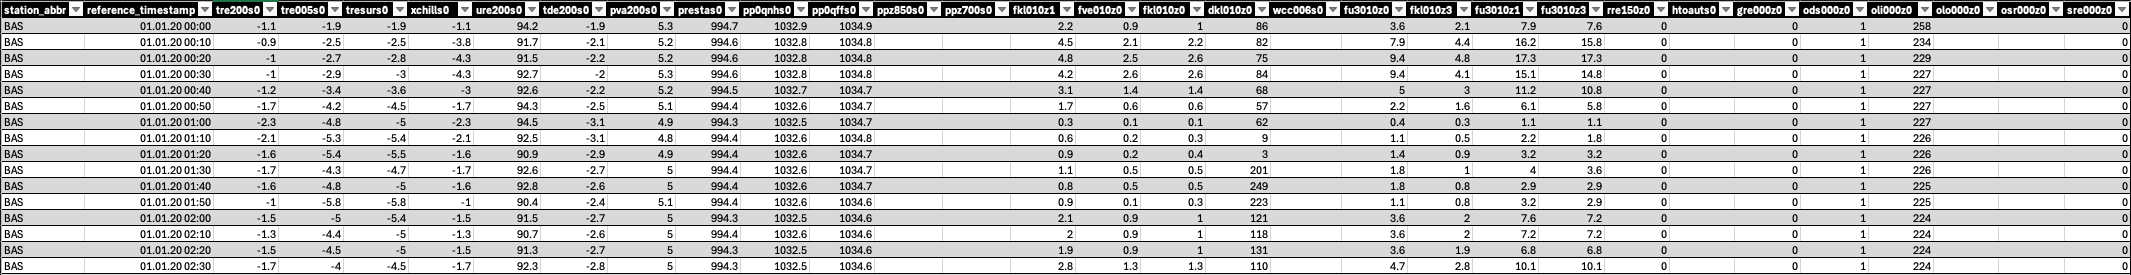

In [4]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/Screenshot_Meteo.png')
#Abbildung 3: Screenshot des Datensatz "Meteo Daten"

Die folgende Tabelle beschreibt das Schema des Datensatzes der Wetterstation Basel / Binningen (BAS).

| Spalte             | Beschreibung                                                                          | Einheit | Datentyp |
|--------------------|----------------------------------------------------------------------------------------|---------|----------|
| station_abbr       | Stationskürzel (zum Beispiel BAS für Binningen)                                       | –       | String   |
| reference_timestamp| Zeitstempel der Messung                                                               | –       | String   |
| tre200s0           | Lufttemperatur in 2 m Höhe über Boden, Momentanwert                                   | °C      | Float    |
| tre005s0           | Lufttemperatur in 5 cm Höhe über Gras, Momentanwert                                   | °C      | Float    |
| ure200s0           | Relative Luftfeuchtigkeit in 2 m Höhe über Boden, Momentanwert                        | %       | Float    |
| tde200s0           | Taupunkt in 2 m Höhe über Boden, Momentanwert                                         | °C      | Float    |
| pva200s0           | Dampfdruck in 2 m Höhe über Boden, Momentanwert                                       | hPa     | Float    |
| prestas0           | Luftdruck auf Barometerhöhe (QFE), Momentanwert                                       | hPa     | Float    |
| pp0qnhs0           | Luftdruck reduziert auf Meereshöhe (QNH), Momentanwert                                | hPa     | Float    |
| pp0qffs0           | Luftdruck reduziert auf Meereshöhe (QFF), Momentanwert                                | hPa     | Float    |
| ppz850s0           | Geopotentielle Höhe der 850 hPa-Fläche, Momentanwert                                  | gpm     | Float    |
| ppz700s0           | Geopotentielle Höhe der 700 hPa-Fläche, Momentanwert                                  | gpm     | Float    |
| fkl010z1           | Böenspitze (Sekundenböe), Maximum in m/s                                              | m/s     | Float    |
| fve010z0           | Windgeschwindigkeit vektoriell, Zehnminutenmittel in m/s                              | m/s     | Float    |
| fkl010z0           | Windgeschwindigkeit skalar, Zehnminutenmittel in m/s                                  | m/s     | Float    |
| dkl010z0           | Windrichtung, Zehnminutenmittel                                                       | °       | Integer  |
| fu3010z0           | Windgeschwindigkeit, Zehnminutenmittel in km/h                                        | km/h    | Float    |
| fkl010z3           | Böenspitze (3-Sekundenböe), Maximum in m/s                                            | m/s     | Float    |
| fu3010z1           | Böenspitze (Sekundenböe), Maximum in km/h                                             | km/h    | Float    |
| fu3010z3           | Böenspitze (3-Sekundenböe), Maximum in km/h                                           | km/h    | Float    |
| rre150z0           | Niederschlag, Zehnminutensumme                                                        | mm      | Float    |
| gre000z0           | Globalstrahlung, Zehnminutenmittel                                                    | W/m²    | Integer  |
| ods000z0           | Diffusstrahlung, Zehnminutenmittel                                                    | W/m²    | Integer  |
| oli000z0           | Langwellige Einstrahlung, Zehnminutenmittel                                           | W/m²    | Integer  |
| olo000z0           | Langwellige Ausstrahlung, Zehnminutenmittel                                           | W/m²    | Integer  |
| osr000z0           | Kurzwellig reflektierte Strahlung, Zehnminutenmittel                                  | W/m²    | Integer  |
| sre000z0           | Sonnenscheindauer, Zehnminutensumme                                                   | min     | Integer  |


## 3.2 Datenaufbereitung

In diesem Abschnitt werden die verwendeten Datensätze so aufbereitet, dass sie für die anschliessende Analyse und Modellierung eingesetzt werden können. Dazu gehören das Einlesen, Bereinigen und Aggregieren der Rohdaten.

Insgesamt werden sechs Datensätze aufbereitet:

- Temperaturdaten im 15-Minuten-Raster
- Temperaturdaten im Tagesraster
- Stromverbrauchsdaten im 15-Minuten-Raster
- Stromverbrauchsdaten im Tagesraster
- Ein kombinierter Datensatz aus Temperatur- und Stromverbrauchsdaten im 15-Minuten-Raster
- Ein kombinierter Datensatz aus Temperatur- und Stromverbrauchsdaten im Tagesraster


In [5]:
# Bibliotheken laden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Anzeigeoptionen für Pandas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", None)


Im folgenden Code werden Funktionen definiert, die im Verlauf dieses Abschnitts verwendet werden.


In [6]:
def count_nan(df, pro_spalte_anzeigen=False):
    """
    Gibt die Gesamtanzahl fehlender Werte (NaN) in einem DataFrame aus.

    Parameter:
    - df: pandas DataFrame
    - pro_spalte_anzeigen (bool): Wenn True, wird zusätzlich die Anzahl fehlender Werte pro Spalte angezeigt.
    """
    gesamt_nan = df.isnull().sum().sum()
    print(f"Anzahl fehlender Werte (NaN) insgesamt: {gesamt_nan}")

    if pro_spalte_anzeigen:
        print("\nFehlende Werte pro Spalte:")
        print(df.isnull().sum())

### 3.2.1 Stromverbrauch

In diesem Abschnitt wird der Datensatz zum Stromverbrauch eingelesen, bereinigt und in zwei zeitlichen Auflösungen aufbereitet. Die Originaldaten liegen im 15-Minuten-Raster vor und enthalten Messwerte zur bezogenen elektrischen Energie im Kanton Basel-Stadt. Nach dem Einlesen werden die Zeitstempel vereinheitlicht, fehlende oder fehlerhafte Einträge entfernt und die Daten zusätzlich in ein Tagesraster aggregiert. So entsteht eine konsistente und flexible Datenbasis für die weitere Analyse.


In [7]:
# Daten aus csv in ein pandas dataframe laden
df_stromverbrauch_raw = pd.read_csv("/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/data_raw/lastgang_bas.csv" , sep=";")

In [8]:
# Die ersten Zeilen anzeigen
df_stromverbrauch_raw.head()

Start der Messung  Start der Messung (Text)  Stromverbrauch  \
0  2025-04-15T23:45:00+02:00  2025-04-15T23:45:00+0200       27594.917   
1  2025-04-15T23:30:00+02:00  2025-04-15T23:30:00+0200       28255.087   
2  2025-04-15T23:15:00+02:00  2025-04-15T23:15:00+0200       28988.511   
3  2025-04-15T23:00:00+02:00  2025-04-15T23:00:00+0200       29812.946   
4  2025-04-15T22:45:00+02:00  2025-04-15T22:45:00+0200       30798.964   

   Grundversorgte Kunden  Freie Kunden  Jahr  Monat  Tag  Wochentag  \
0              12663.872     14931.045  2025      4   15          1   
1              13268.869     14986.218  2025      4   15          1   
2              13789.448     15199.063  2025      4   15          1   
3              14440.229     15372.717  2025      4   15          1   
4              15264.136     15534.828  2025      4   15          1   

   Tag des Jahres  Quartal  Woche des Jahres  
0             105        2                16  
1             105        2                16  
2             105        2                16  
3             105        2                16  
4             105        2                16

In [9]:
# Datensatz inspizieren
df_stromverbrauch_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465927 entries, 0 to 465926
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Start der Messung         465927 non-null  object 
 1   Start der Messung (Text)  465927 non-null  object 
 2   Stromverbrauch            465927 non-null  float64
 3   Grundversorgte Kunden     167983 non-null  float64
 4   Freie Kunden              162031 non-null  float64
 5   Jahr                      465927 non-null  int64  
 6   Monat                     465927 non-null  int64  
 7   Tag                       465927 non-null  int64  
 8   Wochentag                 465927 non-null  int64  
 9   Tag des Jahres            465927 non-null  int64  
 10  Quartal                   465927 non-null  int64  
 11  Woche des Jahres          465927 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 42.7+ MB


Nach dem Einlesen werden die Zeitinformationen bereinigt. Die beiden Spalten „Start der Messung“ und „Start der Messung (Text)“ enthalten inhaltlich identische Werte und liegen als String vor. Zur Vereinfachung der Datenanalyse wird die Textversion entfernt, und die verbleibende Spalte „Start der Messung“ in ein Datetime-Format überführt. Dabei wird die lokale Zeitzone berücksichtigt.

Der Datensatz umfasst insgesamt 465'927 Einträge. Bei einem Messintervall von 15 Minuten entspricht dies einer Datenabdeckung von rund 4'850 Tagen beziehungsweise 13,3 Jahren. Die Unterscheidung zwischen Kundinnen und Kunden in der Grundversorgung und solchen im freien Markt ist erst ab dem 1. September 2020 verfügbar. Für frühere Zeiträume sind die entsprechenden Spalten leer. Da diese Differenzierung für die Analyse nicht erforderlich ist, werden beide Spalten entfernt.

Für die weitere Analyse werden ausschliesslich Daten ab dem 1. Januar 2015 bis zum 31. Dezember 2024 berücksichtigt. Dieser Zeitraum umfasst damit genau zehn Jahre. Diese grösse des Datensatzen ist noch einfach zu handhaben und performant bei berechnungen. Zudem stehen für denselben Zeitraum auch die Wetterdaten zur Verfügung, was eine konsistente Verknüpfung beider Datensätze ermöglicht.

Mehrere zeitliche Merkmale wie Jahr, Monat, Tag, Wochentag, Tag im Jahr, Quartal oder Kalenderwoche lassen sich direkt aus dem Zeitstempel ableiten. Um die Datenstruktur übersichtlich zu halten, werden diese Spalten in einem ersten Schritt entfernt und bei Bedarf später aus dem Datetime-Wert neu generiert.


In [10]:
# Kopie des df erstellen
df_stromverbrauch_reduziert = df_stromverbrauch_raw.copy()

# Nicht benötigte Spalten definieren
spalten_zum_entfernen = [
    "Start der Messung (Text)",
    "Grundversorgte Kunden",
    "Freie Kunden",
    "Jahr",
    "Monat",
    "Tag",
    "Wochentag",
    "Tag des Jahres",
    "Quartal",
    "Woche des Jahres"
]
#Nichtbenötigte Spalten entfernen
df_stromverbrauch_reduziert = df_stromverbrauch_reduziert.drop(columns=spalten_zum_entfernen)

# Spalte "Start der Messung" als datetime formatieren
df_stromverbrauch_reduziert["Start der Messung"] = pd.to_datetime(df_stromverbrauch_reduziert["Start der Messung"], utc=True).dt.tz_convert('Europe/Zurich')

In [11]:
# Zeitbereich festlegen welcher behalten werden soll
start = pd.Timestamp("2015-01-01 00:00:00", tz="Europe/Zurich")
end   = pd.Timestamp("2024-12-31 23:45:00", tz="Europe/Zurich")

# Daten auf den gewünschten Zeitraum beschränken
df_stromverbrauch_reduziert = df_stromverbrauch_reduziert[
    (df_stromverbrauch_reduziert["Start der Messung"] >= start) &
    (df_stromverbrauch_reduziert["Start der Messung"] <= end)
]

Zur Sicherstellung der Datenqualität wird geprüft, ob im Datensatz fehlende Werte vorhanden sind.


In [12]:
# Zähle fehlende Werte pro Spalte (count_nan wurde weiter oben definiert)
count_nan(df_stromverbrauch_reduziert, False)

Anzahl fehlender Werte (NaN) insgesamt: 0


Im nächsten Schritt wird geprüft, ob der Datensatz zeitlich lückenlos ist. Dabei wird sichergestellt, dass für jede 15-Minuten-Periode im Zeitraum vom 1. Januar 2015 bis zum 31. Dezember 2024 ein Messwert vorliegt. Fehlende Zeitstempel würden auf Unterbrechungen in der Messung oder auf Datenverluste hinweisen.


In [13]:
# Zeitraum definieren
zeitraum_start = pd.Timestamp("2015-01-01 00:00:00", tz="Europe/Zurich")
zeitraum_ende  = pd.Timestamp("2024-12-31 23:45:00", tz="Europe/Zurich")

# Vollständige 15-Minuten-Zeitreihe erzeugen
vollständige_zeitreihe = pd.date_range(
    start=zeitraum_start,
    end=zeitraum_ende,
    freq="15min",
    tz="Europe/Zurich"
)

# Tatsächlich vorhandene Zeitstempel im Datensatz
vorhandene_zeitstempel = df_stromverbrauch_reduziert["Start der Messung"]

# Fehlende Zeitpunkte ermitteln
fehlende_zeitpunkte = vollständige_zeitreihe.difference(vorhandene_zeitstempel)

# Ergebnis ausgeben
print(f"Anzahl fehlender 15-Minuten-Intervalle: {len(fehlende_zeitpunkte)}")
if len(fehlende_zeitpunkte) > 0:
    print("Fehlender Zeitstempel:")
    print(fehlende_zeitpunkte)


Anzahl fehlender 15-Minuten-Intervalle: 40
Fehlender Zeitstempel:
DatetimeIndex(['2015-10-25 02:00:00+01:00', '2015-10-25 02:15:00+01:00',
               '2015-10-25 02:30:00+01:00', '2015-10-25 02:45:00+01:00',
               '2016-10-30 02:00:00+01:00', '2016-10-30 02:15:00+01:00',
               '2016-10-30 02:30:00+01:00', '2016-10-30 02:45:00+01:00',
               '2017-10-29 02:00:00+01:00', '2017-10-29 02:15:00+01:00',
               '2017-10-29 02:30:00+01:00', '2017-10-29 02:45:00+01:00',
               '2018-10-28 02:00:00+01:00', '2018-10-28 02:15:00+01:00',
               '2018-10-28 02:30:00+01:00', '2018-10-28 02:45:00+01:00',
               '2019-10-27 02:00:00+01:00', '2019-10-27 02:15:00+01:00',
               '2019-10-27 02:30:00+01:00', '2019-10-27 02:45:00+01:00',
               '2020-10-25 02:00:00+01:00', '2020-10-25 02:15:00+01:00',
               '2020-10-25 02:30:00+01:00', '2020-10-25 02:45:00+01:00',
               '2021-10-31 02:00:00+01:00', '2021-10-31 02

Im Datensatz fehlen insgesamt 40 Intervalle an 15 Minuten. Pro Jahr handelt es sich jeweils um vier Intervalle, die jeweils Ende Oktober zwischen 01:00 Uhr und 02:00 Uhr auftreten. Diese scheinbar fehlenden Zeitstempel lassen sich auf die Zeitumstellung von Sommerzeit auf Winterzeit zurückführen: In dieser Nacht wird die Uhr um eine Stunde zurückgestellt.

Beim Arbeiten mit lokalisierten Zeitstempeln in der Zeitzone «Europe/Zurich» wird diese Umstellung korrekt berücksichtigt. Die sogenannte doppelte Stunde zwischen 02:00 und 03:00 Uhr erscheint nicht doppelt im Datensatz, sondern wird intern durch unterschiedliche UTC-Offsets («+02:00» für Sommerzeit, «+01:00» für Winterzeit) eindeutig unterschieden.

Die Analyse der Zeitreihe rund um die Nacht vom 25. Oktober 2015 (siehe nächste Code-Zelle) bestätigt, dass alle 15-Minuten-Intervalle dieser Nacht vorhanden sind. Der Datensatz ist damit über den gesamten gewählten Zeitraum hinweg vollständig und kontinuierlich.

In [14]:
# Daten vom 25.10.2015 zwischen 01:00 und 04:00 Uhr filtern
maske = (
    (df_stromverbrauch_reduziert['Start der Messung'] >= '2015-10-25 01:00:00') &
    (df_stromverbrauch_reduziert['Start der Messung'] <  '2015-10-25 04:00:00')
)
daten_25_okt_nacht = df_stromverbrauch_reduziert[maske]
daten_25_okt_nacht

Start der Messung  Stromverbrauch
332200 2015-10-25 03:45:00+01:00      26779.4715
332201 2015-10-25 03:30:00+01:00      27020.6270
332202 2015-10-25 03:15:00+01:00      27015.1050
332203 2015-10-25 03:00:00+01:00      27061.4600
332204 2015-10-25 02:45:00+02:00      27277.0280
332205 2015-10-25 02:30:00+02:00      27400.4095
332206 2015-10-25 02:15:00+02:00      27748.7345
332207 2015-10-25 02:00:00+02:00      28173.8020
332208 2015-10-25 01:45:00+02:00      28638.3285
332209 2015-10-25 01:30:00+02:00      28923.7190
332210 2015-10-25 01:15:00+02:00      29333.9730
332211 2015-10-25 01:00:00+02:00      29676.4340

Die zuvor entfernten Zeitmerkmale wie «Jahr», «Monat» oder «Wochentag» werden nun aus dem Zeitstempel erneut abgeleitet. Diese Merkmale können bei der späteren Analyse oder Modellierung als erklärende Variablen verwendet werden. Die folgenden Merkmale werden aus der Spalte «Start der Messung» generiert und dem Datensatz hinzugefügt:

- Jahr  
- Monat  
- Tag  
- Wochentag  
- Tag des Jahres  
- Quartal  
- Woche des Jahres

In [15]:
# kopie des df
df_stromverbrauch_clean_15min = df_stromverbrauch_reduziert.copy()

# Zeitbasierte Features aus dem Zeitstempel extrahieren und als Spalten hinzufügen
df_stromverbrauch_clean_15min["Jahr"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.year
df_stromverbrauch_clean_15min["Monat"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.month
df_stromverbrauch_clean_15min["Tag"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.day
df_stromverbrauch_clean_15min["Wochentag"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.weekday  # 0 = Montag
df_stromverbrauch_clean_15min["Tag des Jahres"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.dayofyear
df_stromverbrauch_clean_15min["Quartal"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.quarter
df_stromverbrauch_clean_15min["Woche des Jahres"] = df_stromverbrauch_clean_15min["Start der Messung"].dt.isocalendar().week

In [16]:
df_stromverbrauch_clean_15min.tail()

Start der Messung  Stromverbrauch  Jahr  Monat  Tag  Wochentag  \
360719 2015-01-01 01:00:00+01:00      33028.2820  2015      1    1          3   
360720 2015-01-01 00:45:00+01:00      33400.2135  2015      1    1          3   
360721 2015-01-01 00:30:00+01:00      33815.7260  2015      1    1          3   
360722 2015-01-01 00:15:00+01:00      33866.3075  2015      1    1          3   
360723 2015-01-01 00:00:00+01:00      33079.5220  2015      1    1          3   

        Tag des Jahres  Quartal  Woche des Jahres  
360719               1        1                 1  
360720               1        1                 1  
360721               1        1                 1  
360722               1        1                 1  
360723               1        1                 1

Der Datensatz ist nun vollständig aufbereitet. Er umfasst einen kontinuierlichen Zeitraum vom 1. Januar 2015 bis zum 31. Dezember 2024, in dem für jedes 15-Minuten-Intervall eine Messung vorliegt. Damit steht eine konsistente und lückenlose Grundlage für die nachfolgenden Analysen zur Verfügung.

Für bestimmte Fragestellungen wird zusätzlich ein Datensatz benötigt, in dem der Stromverbrauch auf Tageswerte aggregiert ist.


In [17]:
# Kopie des df ohne features erstellen
df_stromverbrauch_clean_1d = df_stromverbrauch_reduziert.copy()

# Zeitstempel als Index setzen (wichtig für Resampling)
df_stromverbrauch_clean_1d.set_index("Start der Messung", inplace=True)

# Tagesweise aggregieren: Summe pro Tag für den Stromverbrauch
df_stromverbrauch_clean_1d = (
    df_stromverbrauch_clean_1d
    .resample("1D")
    .sum()
)

# Features wieder hinzufügen
df_stromverbrauch_clean_1d['Jahr'] = df_stromverbrauch_clean_1d.index.year
df_stromverbrauch_clean_1d['Monat'] = df_stromverbrauch_clean_1d.index.month
df_stromverbrauch_clean_1d['Tag'] = df_stromverbrauch_clean_1d.index.day
df_stromverbrauch_clean_1d['Wochentag'] = df_stromverbrauch_clean_1d.index.dayofweek  # Montag = 0
df_stromverbrauch_clean_1d['Tag des Jahres'] = df_stromverbrauch_clean_1d.index.dayofyear
df_stromverbrauch_clean_1d['Quartal'] = df_stromverbrauch_clean_1d.index.quarter
df_stromverbrauch_clean_1d['Woche des Jahres'] = df_stromverbrauch_clean_1d.index.isocalendar().week

# nach Zeitpunkt sortieren, neustes Datum zuerst
df_stromverbrauch_clean_1d = df_stromverbrauch_clean_1d.sort_index(ascending=False)

#index zurücksetzen (Start der Messung wieder als Spalte
df_stromverbrauch_clean_1d = df_stromverbrauch_clean_1d.reset_index()

In [18]:
df_stromverbrauch_clean_1d.tail()

Start der Messung  Stromverbrauch  Jahr  Monat  Tag  Wochentag  \
3648 2015-01-05 00:00:00+01:00    4.229869e+06  2015      1    5          0   
3649 2015-01-04 00:00:00+01:00    3.281679e+06  2015      1    4          6   
3650 2015-01-03 00:00:00+01:00    3.612642e+06  2015      1    3          5   
3651 2015-01-02 00:00:00+01:00    3.844239e+06  2015      1    2          4   
3652 2015-01-01 00:00:00+01:00    3.348729e+06  2015      1    1          3   

      Tag des Jahres  Quartal  Woche des Jahres  
3648               5        1                 2  
3649               4        1                 1  
3650               3        1                 1  
3651               2        1                 1  
3652               1        1                 1

Es stehen nun zwei aufbereitete Datensätze zur Verfügung:

- `df_stromverbrauch_clean_15min`: Stromverbrauchsdaten im 15-Minuten-Intervall  
- `df_stromverbrauch_clean_1d`: Stromverbrauch auf Tageswerte aggregiert

Beide Datensätze decken den Zeitraum vom 1. Januar 2015 bis zum 31. Dezember 2024 ab und bilden die Grundlage für die weiteren Analysen.


### 3.2.2 Wetterdaten

In diesem Abschnitt werden die Wetterdaten aus der automatischen Messstation Basel / Binningen (BAS) eingelesen und aufbereitet. Die Daten liegen im 10-Minuten-Raster vor und umfassen verschiedene meteorologische Grössen wie Lufttemperatur, Luftfeuchtigkeit, Windgeschwindigkeit und Strahlung. Für die weitere Analyse wird ausschliesslich die Lufttemperatur verwendet.

Die Daten werden auf 15-Minuten- und Tageswerte aggregiert, um sie mit den Stromverbrauchsdaten abgleichen und kombinieren zu können.


In [19]:
# Daten aus csv in ein pandas dataframe laden
df_meteo_raw = pd.read_csv("/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/data_raw/meteo_bas.csv", sep=",")

In [20]:
# erste Zeielen anzeigen
df_meteo_raw.head()

station_abbr reference_timestamp  tre200s0  tre005s0  tresurs0  xchills0  \
0          BAS    01.01.2010 00:00       4.5       2.8       2.5       2.5   
1          BAS    01.01.2010 00:10       4.2       2.9       2.5       1.9   
2          BAS    01.01.2010 00:20       4.0       2.7       2.3       1.9   
3          BAS    01.01.2010 00:30       4.3       3.2       2.9       3.1   
4          BAS    01.01.2010 00:40       4.3       3.6       3.5       3.1   

   ure200s0  tde200s0  pva200s0  prestas0  pp0qnhs0  pp0qffs0  ppz850s0  \
0      94.8       3.7       8.0     954.9     991.8     992.7       NaN   
1      96.2       3.6       7.9     955.0     991.9     992.8       NaN   
2      96.2       3.5       7.8     954.9     991.8     992.8       NaN   
3      96.1       3.7       8.0     954.9     991.8     992.7       NaN   
4      96.3       3.8       8.0     954.8     991.7     992.6       NaN   

   ppz700s0  fkl010z1  fve010z0  fkl010z0  dkl010z0  wcc006s0  fu3010z0  \
0       NaN       4.3       2.3       2.3     108.0       NaN       8.3   
1       NaN       4.5       2.6       2.7     105.0       NaN       9.4   
2       NaN       3.8       2.3       2.3     100.0       NaN       8.3   
3       NaN       2.9       1.5       1.6     108.0       NaN       5.4   
4       NaN       2.7       1.5       1.6      96.0       NaN       5.4   

   fkl010z3  fu3010z1  fu3010z3  rre150z0  htoauts0  gre000z0  ods000z0  \
0       4.1      15.5      14.8       0.0       NaN       0.0      18.0   
1       4.3      16.2      15.5       0.0       NaN       0.0      19.0   
2       3.7      13.7      13.3       0.0       NaN       0.0      19.0   
3       2.8      10.4      10.1       0.0       NaN       0.0      20.0   
4       2.6       9.7       9.4       0.0       NaN       0.0      19.0   

   olo000z0  osr000z0  sre000z0  
0       NaN       NaN       0.0  
1       NaN       NaN       0.0  
2       NaN       NaN       0.0  
3       NaN       NaN       0.0  
4       NaN       NaN       0.0

In [21]:
# Daten inspizieren
df_meteo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788978 entries, 0 to 788977
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   station_abbr         788978 non-null  object 
 1   reference_timestamp  788978 non-null  object 
 2   tre200s0             788784 non-null  float64
 3   tre005s0             788667 non-null  float64
 4   tresurs0             788121 non-null  float64
 5   xchills0             787049 non-null  float64
 6   ure200s0             788831 non-null  float64
 7   tde200s0             788775 non-null  float64
 8   pva200s0             788775 non-null  float64
 9   prestas0             788767 non-null  float64
 10  pp0qnhs0             788766 non-null  float64
 11  pp0qffs0             788766 non-null  float64
 12  ppz850s0             0 non-null       float64
 13  ppz700s0             0 non-null       float64
 14  fkl010z1             787052 non-null  float64
 15  fve010z0         

Der Wetterdatensatz umfasst insgesamt 788'978 Einträge, die an der automatischen Wetterstation in Basel / Binningen aufgezeichnet wurden. Für die vorliegende Analyse werden aus dem umfassenden Datensatz ausschliesslich zwei Spalten verwendet:

- **reference_timestamp**: Zeitstempel der Messung im 10-Minuten-Intervall (Zeitzone: Europe/Zurich)  
- **tre200s0**: Lufttemperatur in 2 Metern Höhe über Boden in Grad Celsius (°C)

Alle weiteren im Datensatz enthaltenen Parameter, wie Luftdruck, Windgeschwindigkeit oder Luftfeuchtigkeit, werden für diese Untersuchung nicht berücksichtigt und daher entfernt.

Zur weiteren Verarbeitung wird die Spalte `reference_timestamp` in das Datetime-Format überführt.

In [22]:
# Nur relevante Spalten extrahieren (Zeitstempel + Lufttemperatur)
df_meteo_reduziert = df_meteo_raw[["reference_timestamp", "tre200s0"]].copy()

# Zeitstempel in datetime-Format umwandeln
df_meteo_reduziert["reference_timestamp"] = pd.to_datetime(
    df_meteo_reduziert["reference_timestamp"],
    format="%d.%m.%Y %H:%M"
)

# Zeitzone setzen (Europe/Zurich), Zeitumstellungen behandeln
df_meteo_reduziert["reference_timestamp"] = df_meteo_reduziert["reference_timestamp"].dt.tz_localize(
    "Europe/Zurich",
    nonexistent="shift_forward",   # Verschiebt Zeitstempel bei fehlender Stunde im Frühling (Sommerzeitbeginn)
    ambiguous="NaT"                # Markiert doppelte Stunde im Herbst (Sommerzeitende) als ungültig
)

# Zeilen mit ungültigen oder doppelten Zeitstempeln entfernen
df_meteo_reduziert.dropna(subset=["reference_timestamp"], inplace=True)
df_meteo_reduziert.drop_duplicates(subset=["reference_timestamp"], keep="first", inplace=True)

# Spalten umbenennen für Klarheit
df_meteo_reduziert.rename(columns={
    "reference_timestamp": "Zeitstempel",
    "tre200s0": "Lufttemperatur"
}, inplace=True)

# Check
df_meteo_reduziert.tail()

Zeitstempel  Lufttemperatur
788973 2024-12-31 23:10:00+01:00            -2.4
788974 2024-12-31 23:20:00+01:00            -2.4
788975 2024-12-31 23:30:00+01:00            -2.3
788976 2024-12-31 23:40:00+01:00            -2.6
788977 2024-12-31 23:50:00+01:00            -2.5

Der Wetterdatensatz wird auf denselben Zeitraum reduziert wie der Stromverbrauchsdatensatz. Es werden nur Messwerte zwischen dem 1. Januar 2015 und dem 31. Dezember 2024 berücksichtigt, damit beide Datensätze den gleichen zeitlichen Umfang abdecken.

In [23]:
# Zeitraum festlegen der behalten werden soll
start = pd.to_datetime("2015-01-01 00:00").tz_localize("Europe/Zurich")
end = pd.to_datetime("2024-12-31 23:50").tz_localize("Europe/Zurich")
# Datensatz auf den gewünschten Zeitraum reduzieren
df_meteo_reduziert = df_meteo_reduziert[
    (df_meteo_reduziert["Zeitstempel"] >= start) &
    (df_meteo_reduziert["Zeitstempel"] <= end)
]

In [24]:
df_meteo_reduziert.head(7)

Zeitstempel  Lufttemperatur
262945 2015-01-01 00:00:00+01:00            -4.6
262946 2015-01-01 00:10:00+01:00            -5.7
262947 2015-01-01 00:20:00+01:00            -5.9
262948 2015-01-01 00:30:00+01:00            -5.0
262949 2015-01-01 00:40:00+01:00            -5.4
262950 2015-01-01 00:50:00+01:00            -6.2
262951 2015-01-01 01:00:00+01:00            -6.0

Im nächsten Schritt wird geprüft, ob der Datensatz zeitlich vollständig ist. Dabei wird sichergestellt, dass für jedes 10-Minuten-Intervall im Zeitraum vom 1. Januar 2015 bis zum 31. Dezember 2024 ein Messwert vorliegt. Fehlende Zeitstempel würden auf Unterbrechungen in der Messung oder auf Datenverluste hinweisen.


In [25]:
# Zeitraum definieren
zeitraum_start = pd.Timestamp("2015-01-01 00:00:00", tz="Europe/Zurich")
zeitraum_ende  = pd.Timestamp("2024-12-31 23:50:00", tz="Europe/Zurich")

# Vollständige 10-Minuten-Zeitreihe erzeugen
vollständige_zeitreihe = pd.date_range(
    start=zeitraum_start,
    end=zeitraum_ende,
    freq="10min",
    tz="Europe/Zurich"
)

# Tatsächlich vorhandene Zeitstempel im Datensatz
vorhandene_zeitstempel = df_meteo_reduziert["Zeitstempel"]

# Fehlende Zeitpunkte ermitteln
fehlende_zeitpunkte = vollständige_zeitreihe.difference(vorhandene_zeitstempel)

# Ergebnis ausgeben
print(f"Anzahl fehlender 10-Minuten-Intervalle: {len(fehlende_zeitpunkte)}")
if len(fehlende_zeitpunkte) > 0:
    print("Fehlender Zeitstempel:")
    print(fehlende_zeitpunkte)

Anzahl fehlender 10-Minuten-Intervalle: 120
Fehlender Zeitstempel:
DatetimeIndex(['2015-10-25 02:00:00+02:00', '2015-10-25 02:10:00+02:00',
               '2015-10-25 02:20:00+02:00', '2015-10-25 02:30:00+02:00',
               '2015-10-25 02:40:00+02:00', '2015-10-25 02:50:00+02:00',
               '2015-10-25 02:00:00+01:00', '2015-10-25 02:10:00+01:00',
               '2015-10-25 02:20:00+01:00', '2015-10-25 02:30:00+01:00',
               ...
               '2024-10-27 02:20:00+02:00', '2024-10-27 02:30:00+02:00',
               '2024-10-27 02:40:00+02:00', '2024-10-27 02:50:00+02:00',
               '2024-10-27 02:00:00+01:00', '2024-10-27 02:10:00+01:00',
               '2024-10-27 02:20:00+01:00', '2024-10-27 02:30:00+01:00',
               '2024-10-27 02:40:00+01:00', '2024-10-27 02:50:00+01:00'],
              dtype='datetime64[ns, Europe/Zurich]', length=120, freq=None)


Im Datensatz fehlen insgesamt 120 Intervalle à 10 Minuten. Pro Jahr handelt es sich jeweils um zwölf Intervalle, jeweils Ende Oktober zwischen 02:00 Uhr und 03:00 Uhr. Diese scheinbar fehlenden Zeitstempel lassen sich auf die Zeitumstellung von Sommerzeit auf Winterzeit zurückführen. In dieser Nacht wird die Uhr um eine Stunde zurückgestellt. Das Phänomen wurde bereits im Zusammenhang mit den Stromdaten erläutert.

Für die Aggregation der Temperaturdaten auf ein 15-Minuten-Raster wird die Methode `.resample("15T").ffill()` verwendet. Dabei wird für jedes 15-Minuten-Intervall der zuletzt verfügbare Wert aus dem ursprünglichen 10-Minuten-Raster übernommen.

**Beispiel:**  
Liegt der letzte gemessene Wert um 00:10 Uhr vor, so wird dieser für das 15-Minuten-Zeitfenster um 00:15 Uhr übernommen.

In [26]:
# kopie erstellen und Zeitstempel als Index setzen
df_meteo_15min = df_meteo_reduziert.copy()
df_meteo_15min.set_index("Zeitstempel", inplace=True)

# Resampling auf 15-Minuten-Intervalle mit Vorwärtsauffüllung
df_meteo_15min = df_meteo_15min.resample("15min").ffill()

# Zeitstempel wieder als reguläre Spalte führen
df_meteo_15min = df_meteo_15min.reset_index()


In [27]:
df_meteo_15min.head()

Zeitstempel  Lufttemperatur
0 2015-01-01 00:00:00+01:00            -4.6
1 2015-01-01 00:15:00+01:00            -5.7
2 2015-01-01 00:30:00+01:00            -5.0
3 2015-01-01 00:45:00+01:00            -5.4
4 2015-01-01 01:00:00+01:00            -6.0

Nach der Aggregation auf ein 15-Minuten-Intervall wird geprüft, ob im resultierenden Datensatz fehlende Werte vorhanden sind. Solche NaN-Werte können beispielsweise dann entstehen, wenn für bestimmte Zeitpunkte im ursprünglichen 10-Minuten-Raster keine gültige Temperaturmessung vorlag.

In [28]:
# Funktion zählt nan Values(wurde weiter oben definiert)
count_nan(df_meteo_15min, True)

Anzahl fehlender Werte (NaN) insgesamt: 124

Fehlende Werte pro Spalte:
Zeitstempel         0
Lufttemperatur    124
dtype: int64


der Datensatz enthält 124 NaN values. Es soll überprüft werden wo sich diese im Datendatz befinden.

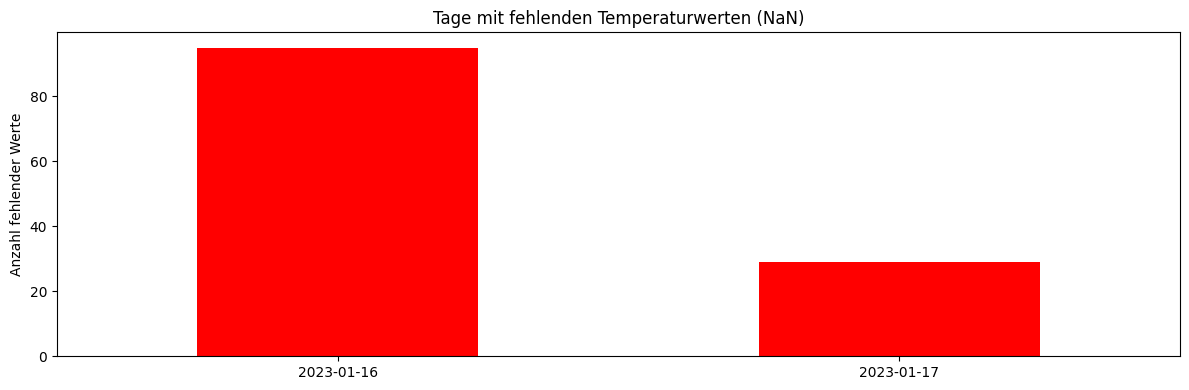

In [29]:
# Kopie des DataFrames
df_meteo_nan_check = df_meteo_15min.copy()

# Datum extrahieren
df_meteo_nan_check["Datum"] = df_meteo_nan_check["Zeitstempel"].dt.date

# Anzahl NaNs pro Tag in der Lufttemperatur-Spalte zählen
nan_per_day = df_meteo_nan_check[df_meteo_nan_check["Lufttemperatur"].isna()].groupby("Datum").size()

# Plot erstellen
plt.figure(figsize=(12, 4))
nan_per_day.plot(kind="bar", color="red")
plt.title("Tage mit fehlenden Temperaturwerten (NaN)")
plt.xlabel(None)
plt.ylabel("Anzahl fehlender Werte")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Die fehlenden Werte in der Spalte «Lufttemperatur» treten an zwei aufeinanderfolgenden Tagen auf. In diesem Zeitraum wurden keine Daten erfasst, was auf ein technisches Problem bei der Datenerhebung hindeutet.

Um diese Lücken zu schliessen, sollen die fehlenden Werte durch Messwerte aus derselben Zeitspanne, jedoch vom jeweils zwei Tage früheren Zeitraum ersetzt werden. Ein Rückgriff auf den Vortag ist nicht möglich, da auch dieser ja auch von den Ausfällen betroffen ist.

In [30]:
# kopie erstellen
df_meteo_clean_15min = df_meteo_15min.copy()

# setze den zeitstempel als index
df_meteo_clean_15min.set_index("Zeitstempel", inplace=True)

# finde alle fehlenden werte
missing_idx = df_meteo_clean_15min[df_meteo_clean_15min["Lufttemperatur"].isna()].index

# für jeden fehlenden zeitstempel: ersetze mit wert von zwei tagen vorher
for ts in missing_idx:
    ts_shifted = ts - pd.Timedelta(days=2)
    if ts_shifted in df_meteo_clean_15min.index:
        df_meteo_clean_15min.at[ts, "Lufttemperatur"] = df_meteo_clean_15min.at[ts_shifted, "Lufttemperatur"]

# Zeitstempel wieder als reguläre Spalte führen
df_meteo_clean_15min = df_meteo_clean_15min.reset_index()

In [31]:
count_nan(df_meteo_clean_15min, True)

Anzahl fehlender Werte (NaN) insgesamt: 0

Fehlende Werte pro Spalte:
Zeitstempel       0
Lufttemperatur    0
dtype: int64


Der Datensatz enthält keine fehlenden Werte und bildet eine vollständig kontinuierliche Zeitreihe im 15-Minuten-Raster ab. Dieser bereinigte Datensatz wird unter dem Namen `meteo_clean_15min` gespeichert und für die weitere Analyse verwendet.

Auf Basis des bereinigten und kontinuierlichen 15-Minuten-Datensatzes `meteo_clean_15min` wird ein weiterer Datensatz erstellt, der die täglichen Durchschnittswerte der Lufttemperatur enthält. Die Aggregation auf Tagesebene erfolgt durch Mittelwertbildung aller Temperaturwerte eines Kalendertages.

Dieser Datensatz wird unter dem Namen `meteo_clean_1d` gespeichert.


In [32]:
# Kopie erstellen
df_meteo_clean_1d = df_meteo_clean_15min.copy()

# Zeitstempel als Index setzen (notwendig für resample)
df_meteo_clean_1d.set_index("Zeitstempel", inplace=True)

# Tägliche Mitteltemperatur berechnen
df_meteo_clean_1d = (
    df_meteo_clean_1d
    .resample("1D")
    .mean()
)
# Index wieder als Spalte
df_meteo_clean_1d = df_meteo_clean_1d.reset_index()

df_meteo_clean_1d.head()

Zeitstempel  Lufttemperatur
0 2015-01-01 00:00:00+01:00       -3.133333
1 2015-01-02 00:00:00+01:00       -1.106250
2 2015-01-03 00:00:00+01:00        5.408333
3 2015-01-04 00:00:00+01:00        3.564583
4 2015-01-05 00:00:00+01:00        0.333333

Es steht nun auch für die Wetterdaten ein auf Tageswerte aggregierter Datensatz zur Verfügung:

- `df_meteo_clean_15min`: Temperaturdaten im 15-Minuten-Intervall  
- `df_meteo_clean_1d`: Tagesmittelwerte der Lufttemperatur

Beide Datensätze decken denselben Zeitraum ab wie die Stromverbrauchsdaten.

### 3.2.3 Strom- und Meteodaten zusammenführen

Im nächsten Schritt werden die Stromverbrauchsdaten mit den Wetterdaten kombiniert. Dabei entstehen zwei Datensätze, jeweils durch Zusammenführung auf Basis eines gemeinsamen Zeitstempels:

- Die 15-Minuten-Datensätze `df_stromverbrauch_clean_15min` und `df_meteo_clean_15min` werden anhand ihrer Zeitstempel verknüpft.  
- Zusätzlich werden die Tagesdatensätze `df_stromverbrauch_clean_1d` und `df_meteo_1d` miteinander kombiniert.

Durch diese Zusammenführungen stehen vollständige Datensätze zur Verfügung, die sowohl den Stromverbrauch als auch die Lufttemperatur enthalten.


#### 3.2.3.1 Zusammenführung der 15-Minuten-Daten

In [33]:
# Kopien
df_strom = df_stromverbrauch_clean_15min.copy()
df_meteo = df_meteo_clean_15min.copy()

# Umbenennen für konsistente Spaltennamen
df_strom = df_strom.rename(columns={"Start der Messung": "Zeitstempel"})

# Merge auf gemeinsamen Zeitstempel (inner: nur gemeinsame Zeitpunkte)
df_merged_15min = pd.merge(
    df_strom,
    df_meteo,
    on="Zeitstempel",
    how="inner"
)

# Ergebnis prüfen
df_merged_15min.head()


Zeitstempel  Stromverbrauch  Jahr  Monat  Tag  Wochentag  \
0 2024-12-31 23:45:00+01:00       30282.928  2024     12   31          1   
1 2024-12-31 23:30:00+01:00       30448.868  2024     12   31          1   
2 2024-12-31 23:15:00+01:00       31074.397  2024     12   31          1   
3 2024-12-31 23:00:00+01:00       31567.270  2024     12   31          1   
4 2024-12-31 22:45:00+01:00       32043.473  2024     12   31          1   

   Tag des Jahres  Quartal  Woche des Jahres  Lufttemperatur  
0             366        4                 1            -2.6  
1             366        4                 1            -2.3  
2             366        4                 1            -2.4  
3             366        4                 1            -2.2  
4             366        4                 1            -2.1

#### 3.2.3.2 Zusammenführen der Tagesdaten

In [34]:
# Kopien der Tagesdatensätze
df_strom_1d = df_stromverbrauch_clean_1d.copy()
df_meteo_1d = df_meteo_clean_1d.copy() # Use df_meteo_clean_1d which has 'Zeitstempel'

# Einheitlicher Spaltenname für den Merge
df_strom_1d = df_strom_1d.rename(columns={"Start der Messung": "Datum"})
df_meteo_1d = df_meteo_1d.rename(columns={"Zeitstempel": "Datum"})

# Datum ohne Uhrzeit (rein auf Tagesebene)
df_strom_1d["Datum"] = df_strom_1d["Datum"].dt.date
df_meteo_1d["Datum"] = df_meteo_1d["Datum"].dt.date

# Merge beider DataFrames
df_merged_1d = pd.merge(
    df_strom_1d,
    df_meteo_1d,
    on="Datum",
    how="inner"
)

# Ergebnis anzeigen
df_merged_1d.head()

Datum  Stromverbrauch  Jahr  Monat  Tag  Wochentag  Tag des Jahres  \
0  2024-12-31     3354252.813  2024     12   31          1             366   
1  2024-12-30     3458629.936  2024     12   30          0             365   
2  2024-12-29     2866909.559  2024     12   29          6             364   
3  2024-12-28     3049541.397  2024     12   28          5             363   
4  2024-12-27     3243493.345  2024     12   27          4             362   

   Quartal  Woche des Jahres  Lufttemperatur  
0        4                 1       -1.009375  
1        4                 1       -1.588542  
2        4                52       -0.282292  
3        4                52        0.009375  
4        4                52       -0.321875

Nach dem Zusammenführen der Stromverbrauchs- und Wetterdaten stehen nun insgesammt sechs bereingte Datensätze zur Verfügung:

| Name                        | Beschreibung                                              | Zeitauflösung     | Zeitraum                  |
|-----------------------------|-----------------------------------------------------------|-------------------|---------------------------|
| `df_stromverbrauch_clean_15min` | Stromverbrauchsdaten                        | 15 Minuten        | 01.01.2015 – 31.12.2024   |
| `df_stromverbrauch_clean_1d`    | Stromverbrauch, auf Tageswerte aggregiert                | 1 Tag             | 01.01.2015 – 31.12.2024   |
| `df_meteo_clean_15min`          | Lufttemperaturdaten                         | 15 Minuten        | 01.01.2015 – 31.12.2024   |
| `df_meteo_1d`                   | Lufttemperatur, auf Tagesmittel aggregiert               | 1 Tag             | 01.01.2015 – 31.12.2024   |
| `df_merged_15min`               | Stromverbrauch und Temperatur kombiniert                 | 15 Minuten        | 01.01.2015 – 31.12.2024   |
| `df_merged_1d`                  | Stromverbrauch und Temperatur kombiniert (tagesbasiert)  | 1 Tag             | 01.01.2015 – 31.12.2024   |


# 4 Datenanalyse

In der Analysephase werden verschiedene datenbasierte Voruntersuchungen durchgeführt, um eine Grundlage für die anschliessende Verbrauchsprognose zu schaffen.

Zu Beginn werden die vorliegenden Stromverbrauchs- und Wetterdaten visuell untersucht. Ziel dieser explorativen Analyse ist es, saisonale Muster, Trends, Ausreisser oder sonstige Auffälligkeiten in den Zeitreihen zu identifizieren. Die Visualisierung dient als Grundlage für das Verständnis der Datenstruktur und möglicher Zusammenhänge.

Anschliessend wird ein Clustering-Verfahren angewendet, um sogenannte typische Tage im Stromverbrauch zu identifizieren. Zwar ist im Datensatz der Wochentag bereits enthalten, dennoch besteht die Vermutung, dass darüber hinaus weitere Muster existieren. Dazu zählen beispielsweise Feiertage oder Brückentage, die sich im Verbrauchsverhalten eher wie Wochenendtage verhalten, aber bei rein kalendarischer Betrachtung als gewöhnliche Wochentage erscheinen. Die ermittelten Cluster werden später als zusätzliches Merkmal in die Prognosemodelle aufgenommen.

Darauf folgt eine Korrelationsanalyse. Aus theoretischer Sicht ist bekannt, dass der Stromverbrauch unter anderem durch die Witterung beeinflusst wird. In dieser Analyse wird spezifisch untersucht, ob und in welchem Ausmass ein Zusammenhang mit der Lufttemperatur besteht, die als meteorologisches Merkmal ausgewählt wurde. Ziel ist es, diesen Zusammenhang im vorliegenden Datensatz zu erkunden.


Abschliessend wird die eigentliche Lastgangprognose durchgeführt. Dabei werden mehrere Modellansätze verglichen. Als Baseline dient ein SARIMA-Modell ohne externe Einflussgrössen. Darauf aufbauend wird ein SARIMAX-Modell eingesetzt, das exogene Variablen wie Temperatur oder Clusterzugehörigkeit berücksichtigt. Zusätzlich wird geprüft, ob Modelle aus dem Bereich des maschinellen Lernens, wie XGBoost, die Prognosegenauigkeit weiter verbessern können.


In [35]:
# Notwendige Bibliotheken importieren
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.dates import DateFormatter, HourLocator
import holidays
import calendar
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## 4.1 Datensätze erkunden

Bevor weiterführende Analysen durchgeführt werden, erfolgt zunächst eine visuelle und explorative Untersuchung der aufbereiteten Stromverbrauchs- und Wetterdaten. Ziel ist es, ein besseres Verständnis für deren Verlauf, saisonale Muster, Varianz und potenzielle Ausreisser zu gewinnen.




### 4.1.1 Visualisierung der Zeitreihe

#### 4.1.1.1 Visualisierung des Stromverbrauchs

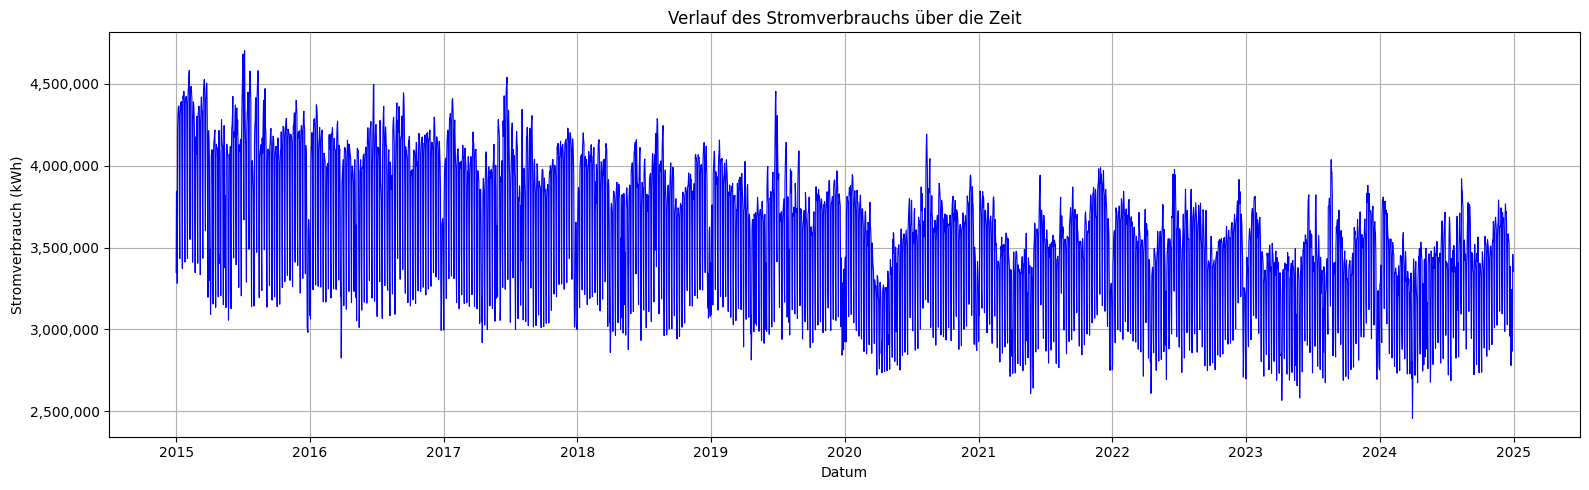

In [36]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Sicherstellen, dass Datum als datetime erkannt wird
df_plot['Datum'] = pd.to_datetime(df_plot['Datum'])

# Plot erstellen
plt.figure(figsize=(16, 5))
plt.plot(df_plot['Datum'], df_plot['Stromverbrauch'], color='blue', linewidth=0.8)

# Y-Achse: normale Zahlendarstellung mit Tausendertrennzeichen
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Formatierung
plt.title('Verlauf des Stromverbrauchs über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

Die Abbildung zeigt den zeitlichen Verlauf des täglichen Stromverbrauchs im Zeitraum von 2015 bis Ende 2024. Insgesamt ist über die Jahre ein leicht rückläufiger Trend im Gesamtverbrauch feststellbar. Auch scheint es ein saisonales Muster zu geben

#### 4.1.1.2 Visualisierung der Lufttemperatur

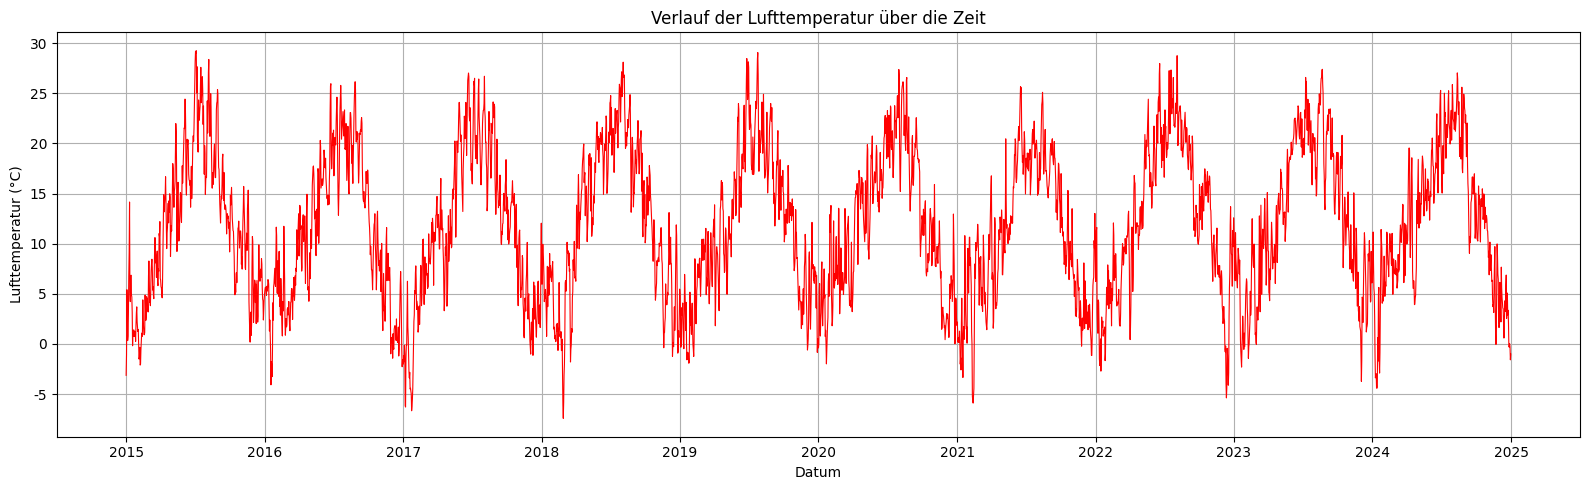

In [37]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Sicherstellen, dass das Datum als datetime erfasst ist
df_plot['Datum'] = pd.to_datetime(df_plot['Datum'])

# Zeitreihe der Lufttemperatur plotten
plt.figure(figsize=(16, 5))
plt.plot(df_plot['Datum'], df_plot['Lufttemperatur'], color='red', linewidth=0.8)

# Y-Achse: normale Zahlendarstellung mit Tausendertrennzeichen
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Formatierung
plt.title('Verlauf der Lufttemperatur über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Lufttemperatur (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

Die Abbildung zeigt den Verlauf der täglichen Lufttemperatur im Zeitraum von 2015 bis Ende 2024. Es sind regelmässige, stark ausgeprägte saisonale Schwankungen erkennbar: Die Temperaturen erreichen im Sommer jeweils Höchstwerte um 25 °C und fallen im Winter regelmässig unter 0 °C.


### 4.1.2 Stromverbrauch pro Wochentag

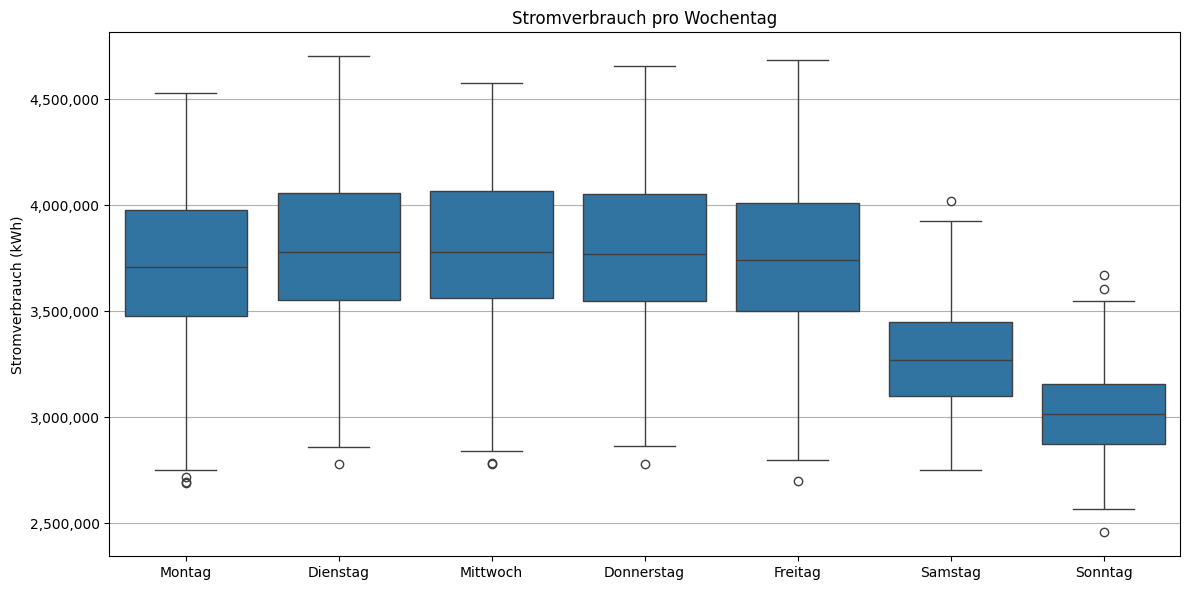

In [38]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Boxplot mit numerischen Wochentagen
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x='Wochentag', y='Stromverbrauch')

# Y-Achse: normale Zahlendarstellung mit Tausendertrennzeichen
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Formatierung
plt.title('Stromverbrauch pro Wochentag')
plt.xlabel(None)
plt.ylabel('Stromverbrauch (kWh)')
plt.xticks(ticks=range(7), labels=['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Die Boxplot-Darstellung zeigt den täglichen Stromverbrauch differenziert nach Wochentagen. An Werktagen (Montag bis Freitag) ist der Medianverbrauch deutlich höher als an Wochenenden. Am Sonntag fällt der Stromverbrauch im Durchschnitt am tiefsten aus, wobei auch die Streuung geringer ist. Die Verteilung an den Werktagen ist vergleichbar.


### 4.1.3 Stromverbrauch pro Monat

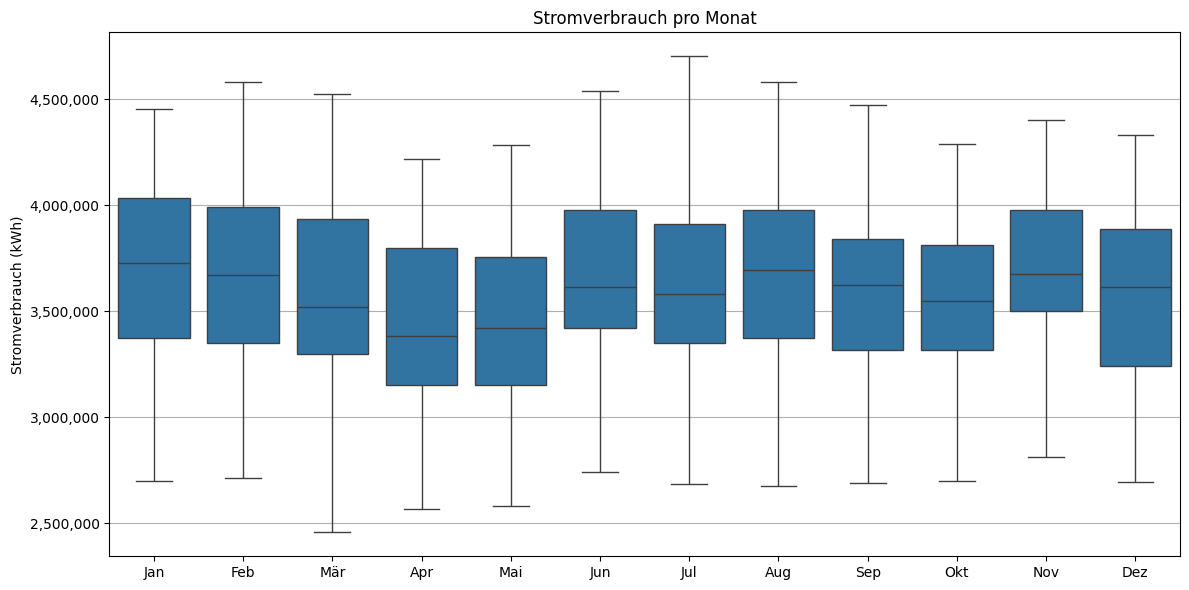

In [39]:
# Kopie des DataFrames
df_plot = df_merged_1d.copy()

# Monatsnamen definieren
monatsnamen = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

# Boxplot pro Monat erstellen
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x='Monat', y='Stromverbrauch')

# Achsen- und Tickbeschriftung
plt.title('Stromverbrauch pro Monat')
plt.xlabel(None)
plt.ylabel('Stromverbrauch (kWh)')
plt.xticks(ticks=range(12), labels=monatsnamen)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Layout und Gitter
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Die Abbildung zeigt den täglichen Stromverbrauch gruppiert nach Monaten. Der Medianverbrauch ist in den Wintermonaten (Januar, Februar, November, Dezember) tendenziell höher als in den Sommermonaten. Gleichzeitig ist die Streuung im Winter etwas grösser, was auf stärkere Schwankungen im Verbrauch hindeutet. Im Frühling (insbesondere April und Mai) liegen Median und Spannweite insgesamt tiefer.


### 4.1.4 Saisonalitäten

### 4.1.4 Saisonalitäten

Mit dem Modell `seasonal_decompose` kann die Zeitreihe detaillierter analysiert werden. Dabei wird die Serie in mehrere Komponenten zerlegt, die unterschiedliche Aspekte des Verbrauchsverhaltens abbilden:

- **Original**: Die ursprüngliche Zeitreihe.
- **Trend**: Zeigt den langfristigen Verlauf, beispielsweise einen stetigen Anstieg oder Rückgang über die Zeit.
- **Seasonal**: Hebt regelmässig wiederkehrende Muster hervor, etwa eine jährliche Saisonalität.
- **Residual**: Beinhaltet Unregelmässigkeiten oder Ausreisser, die weder durch den Trend noch durch die Saisonalität erklärbar sind.

Für die Zerlegung der Zeitreihe stehen zwei Modellvarianten zur Verfügung:

- **Additives Modell**: Geeignet, wenn die Varianz der saisonalen Schwankung über die Zeit konstant bleibt.
- **Multiplikatives Modell**: Wird verwendet, wenn die Varianz der Zeitreihe nicht konstant ist.

Bevor die Zerlegung durchgeführt wird, wird geprüft, ob die Varianz der Zeitreihe über die Zeit konstant bleibt. Dies dient als Entscheidungsgrundlage für die Wahl zwischen dem additiven und dem multiplikativen Modell.


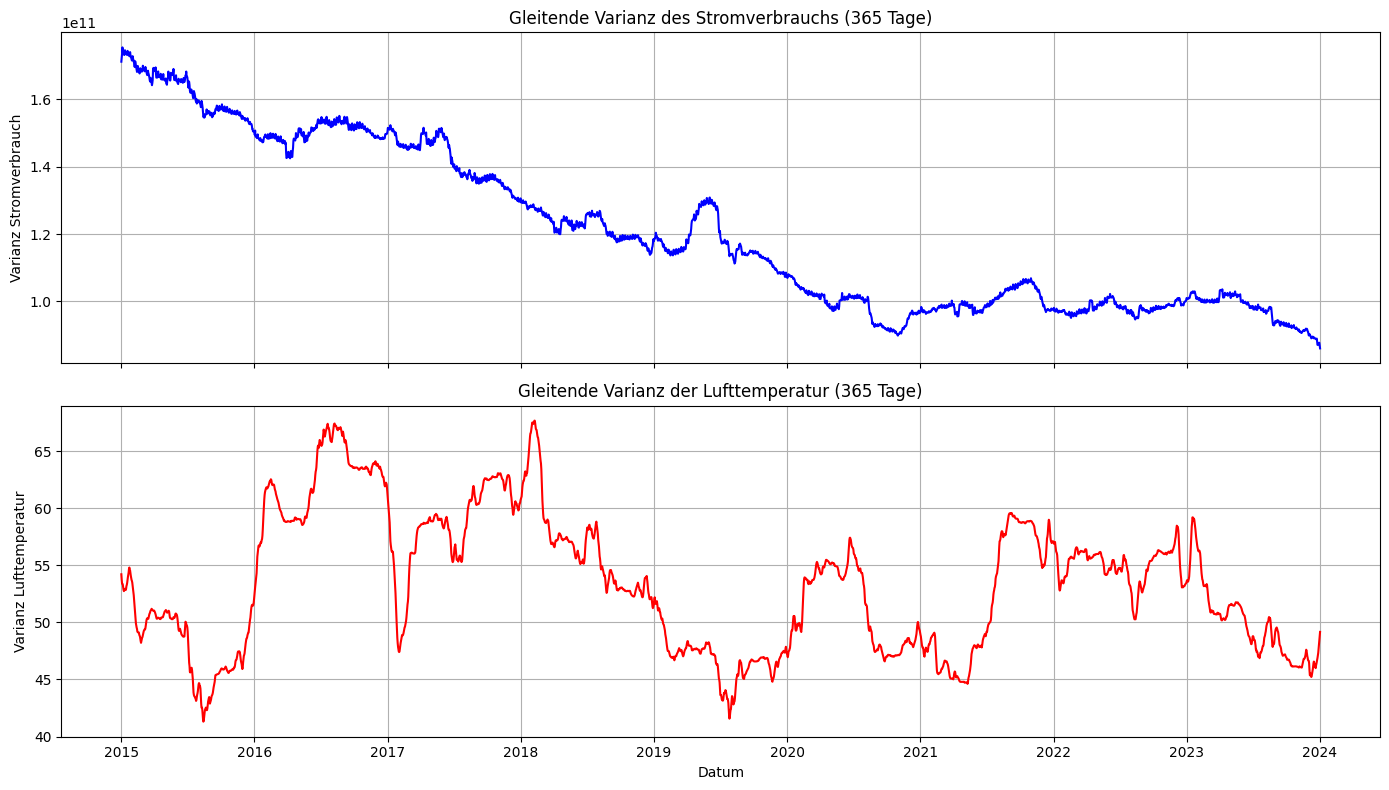

In [40]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Datum als Index setzen
df_plot.set_index('Datum', inplace=True)

# Gleitende Varianz berechnen (über ein Jahr)
rolling_var_strom = df_plot['Stromverbrauch'].rolling(window=365).var()
rolling_var_temp = df_plot['Lufttemperatur'].rolling(window=365).var()

# Subplots erstellen
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

# Plot 1: Stromverbrauch
ax1.plot(rolling_var_strom, color='blue')
ax1.set_title('Gleitende Varianz des Stromverbrauchs (365 Tage)')
ax1.set_ylabel('Varianz Stromverbrauch')
ax1.grid(True)

# Plot 2: Lufttemperatur
ax2.plot(rolling_var_temp, color='red')
ax2.set_title('Gleitende Varianz der Lufttemperatur (365 Tage)')
ax2.set_ylabel('Varianz Lufttemperatur')
ax2.set_xlabel('Datum')
ax2.grid(True)

# Layout anpassen
plt.tight_layout()
plt.show()


Die beiden Abbildungen zeigen die zeitliche Entwicklung der Varianz für den Stromverbrauch (oben) und die Lufttemperatur (unten).

Im oberen Plot ist ein deutlich abnehmender Verlauf der Varianz des Stromverbrauchs erkennbar.

Die Varianz der Lufttemperatur zeigt dagegen kein klar erkennbares langfristiges Muster.

Daraus ergibt sich:
- Für den Stromverbrauch --> multiplikatives Zerlegungsmodell
- Für die Lufttemperatur --> additives Zerlegungsmodell

####4.1.4.1 Saisonalität des Stromverbrauchs

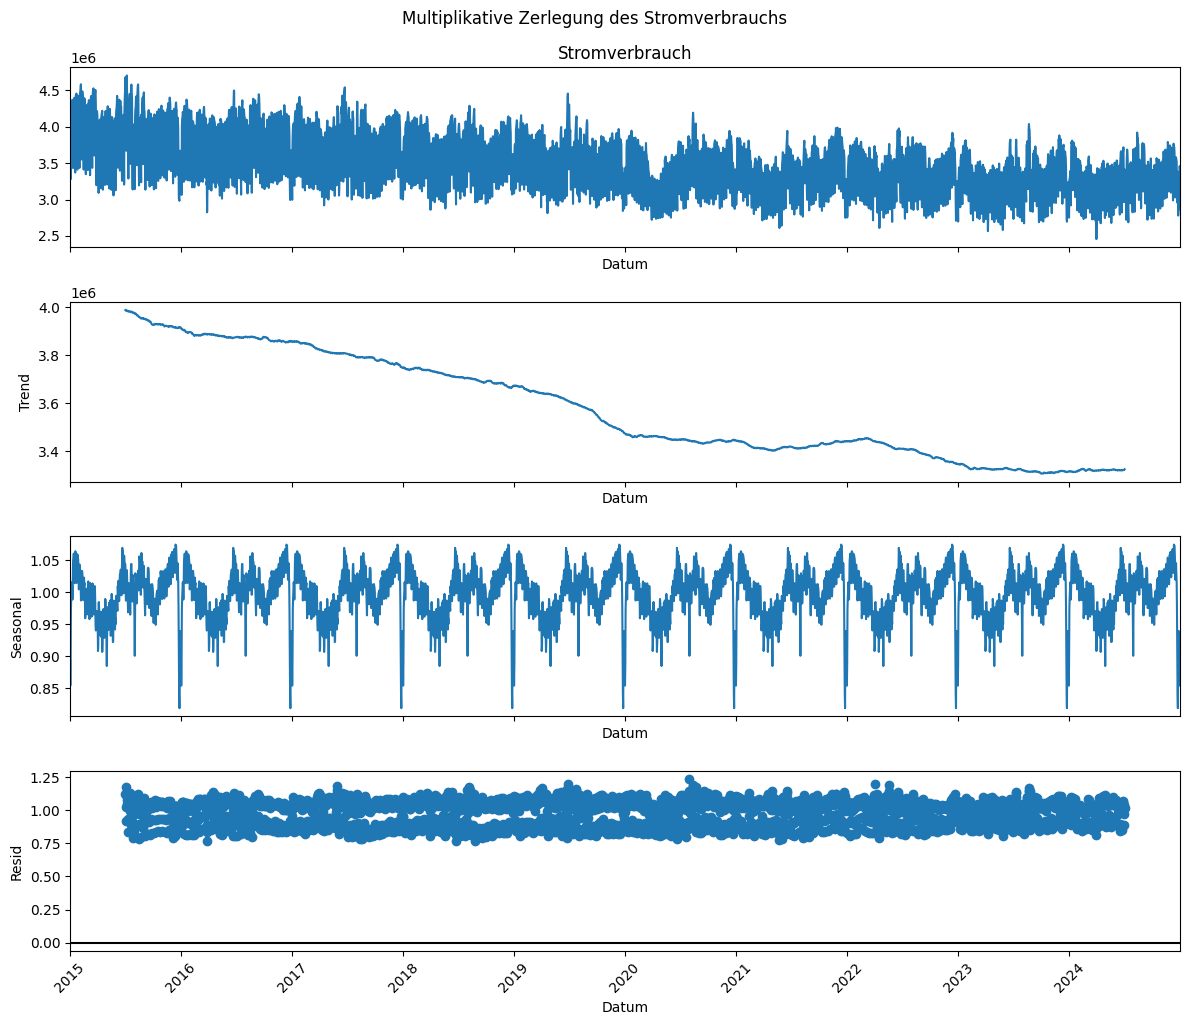

In [41]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Datum als Index setzen
df_plot.set_index('Datum', inplace=True)
df_plot.sort_index(inplace=True)

# Zeitreihe extrahieren
daily_consumption_strom = df_plot['Stromverbrauch']

# Zeitreihe zerlegen
decomposition = seasonal_decompose(daily_consumption_strom, model='multiplicative', period=365)

# Plot-Einstellungen
plt.rcParams.update({'figure.figsize': (12, 10)})

# Zerlegung visualisieren
fig = decomposition.plot()
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Datum')

plt.tight_layout()
plt.suptitle('Multiplikative Zerlegung des Stromverbrauchs', y=1.02)
plt.show()


Die Abbildung zeigt die multiplikative Zerlegung der Zeitreihe des täglichen Stromverbrauchs in Trend-, Saison- und Restkomponenten. Im oberen Plot sind die Originalwerte dargestellt. Die Trendkomponente verdeutlicht eine kontinuierlichen Reduktion des Stromverbrauchs über den betrachteten Zeitraum hinweg.

Die saisonale Komponente zeigt ausgeprägte Muster: Einerseits ist eine deutliche jährliche Saisonalität erkennbar, andererseits treten auch feinere, kurzfristigere Schwankungen auf (z.b Wöchentlichhe Saisonalität). Die Residualkomponente erscheint weitgehend zufällig verteilt und weist keine systematischen Muster auf, was auf eine gute Modellpassung hindeutet.





#### 4.1.4.1 Saisonalität der Temperatur

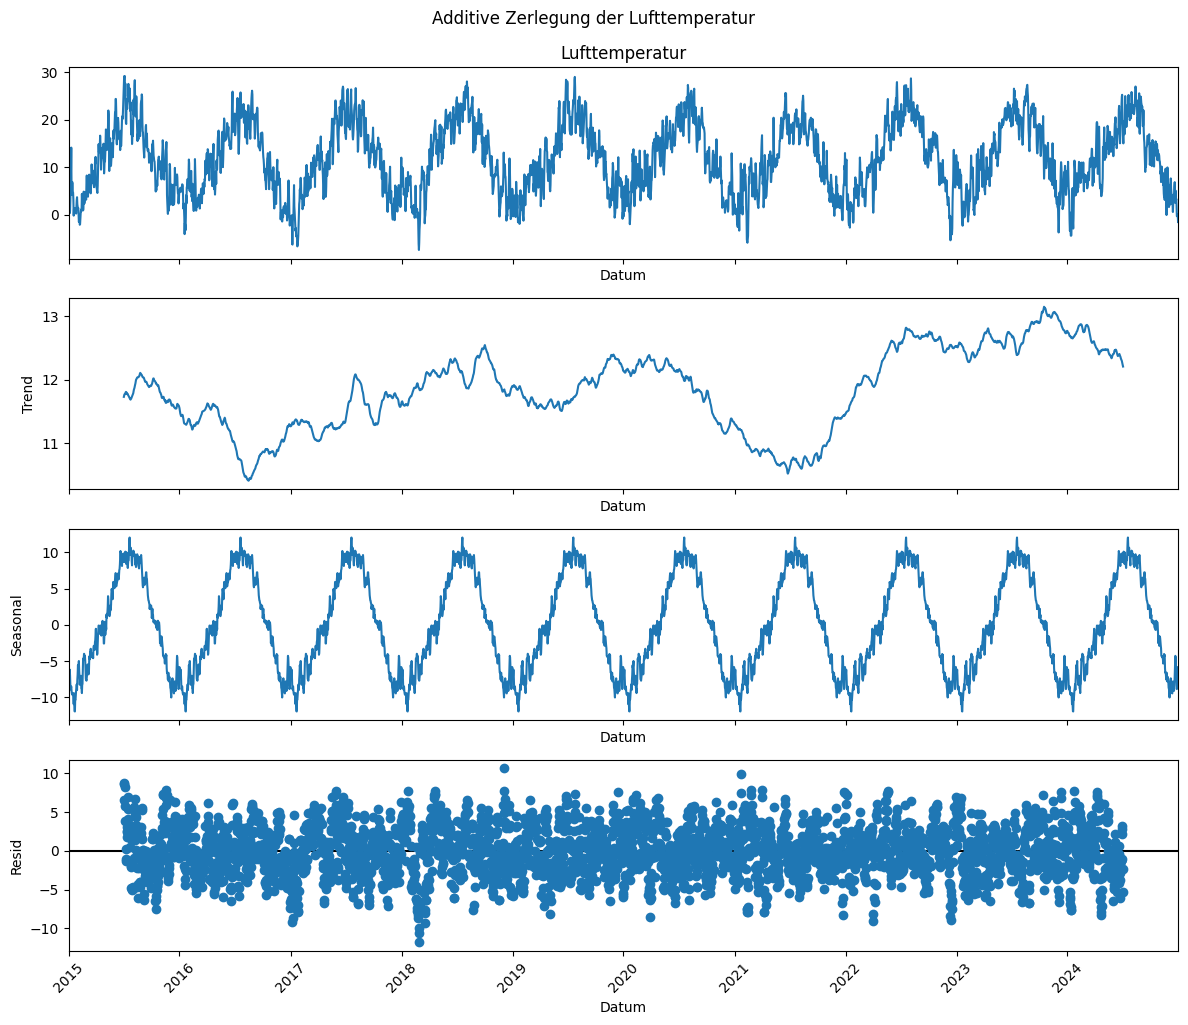

In [42]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Datum als Index setzen
df_plot.set_index('Datum', inplace=True)
df_plot.sort_index(inplace=True)

# Zeitreihe extrahieren
daily_consumption_strom = df_plot['Lufttemperatur']

# Zeitreihe zerlegen
decomposition = seasonal_decompose(daily_consumption_strom, model='additive', period=365)

# Plot-Einstellungen
plt.rcParams.update({'figure.figsize': (12, 10)})

# Zerlegung visualisieren
fig = decomposition.plot()
for ax in fig.axes:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Datum')

plt.tight_layout()
plt.suptitle('Additive Zerlegung der Lufttemperatur', y=1.02)
plt.show()

Die Abbildung zeigt die additive Zerlegung der Zeitreihe der täglichen Lufttemperatur in Trend-, Saison- und Restkomponenten.

Die Trendkomponente zeigt einen leicht ansteigenden Verlauf über die Jahre hinweg. Die saisonale Komponente ist stabil und weist eine konstante jährliche Amplitude auf. Die Residuen erscheinen zufällig verteilt und enthalten keine Muster, was auf eine gute Modellanpassung hinweist.


### 4.1.5 Ausreisser

In diesem Abschnitt werden Ausreisser im Stromverbrauch und in der Lufttemperatur identifiziert. Die Analyse erfolgt relativ zum monatlichen Mittelwert. Als Ausreisser gelten dabei alle Tage, deren Werte mehr als zwei Standardabweichungen vom monatlichen Durchschnitt abweichen.

Die Erkennung von Ausreissern dient dazu, ungewöhnliche Verbrauchs- oder Wetterereignisse zu identifizieren.


#### 4.1.5.1 Ausreisser Stromverbrauch


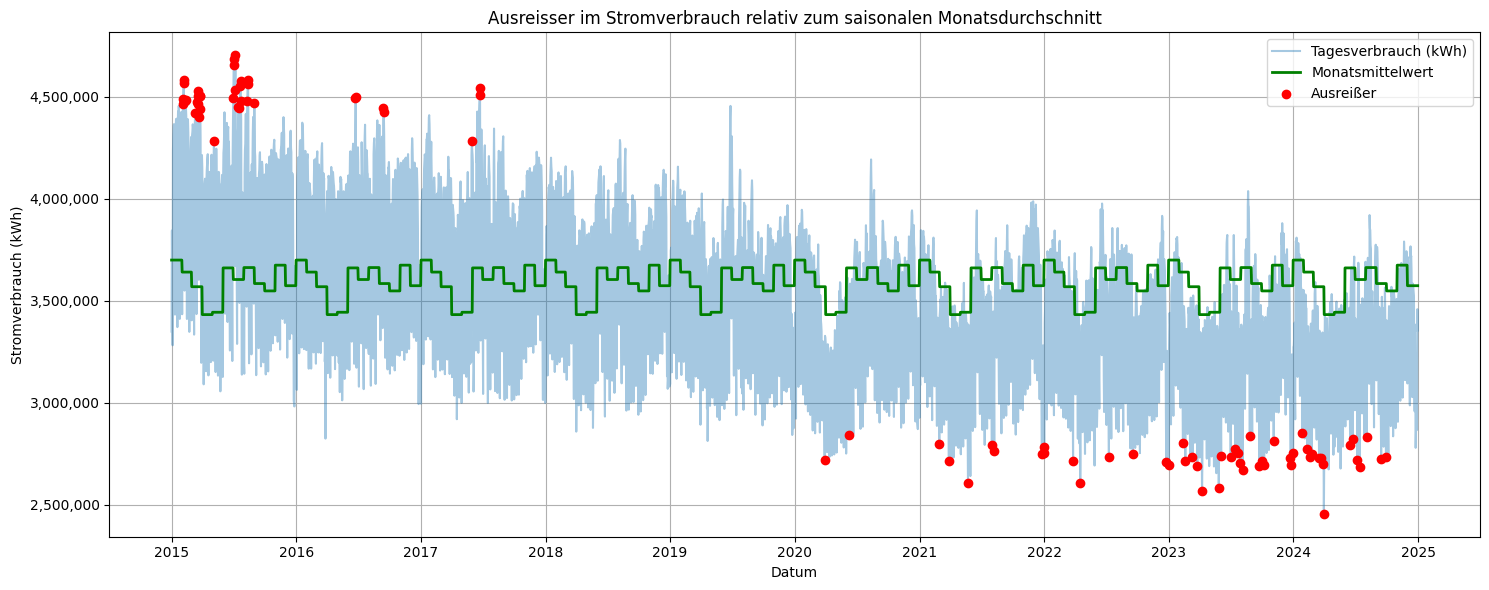

In [43]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Sicherstellen, dass 'Datum' datetime-Format hat
df_plot['Datum'] = pd.to_datetime(df_plot['Datum'])

# Monat extrahieren (für Gruppierung)
df_plot['Monat'] = df_plot['Datum'].dt.month

# Monatliche Durchschnittswerte berechnen
monthly_avg = df_plot.groupby('Monat')['Stromverbrauch'].transform('mean')

# Abweichung berechnen
abweichung = df_plot['Stromverbrauch'] - monthly_avg

# Ausreißer definieren ( > 2 * Standardabweichung)
grenze = abweichung.std() * 2
outliers = abweichung.abs() > grenze

# Visualisierung
plt.figure(figsize=(15, 6))
plt.plot(df_plot['Datum'], df_plot['Stromverbrauch'], label='Tagesverbrauch (kWh)', alpha=0.4)
plt.plot(df_plot['Datum'], monthly_avg, label='Monatsmittelwert', color='green', linewidth=2)
plt.scatter(df_plot.loc[outliers, 'Datum'], df_plot.loc[outliers, 'Stromverbrauch'],
            color='red', label='Ausreißer', zorder=5)

plt.title('Ausreisser im Stromverbrauch relativ zum saisonalen Monatsdurchschnitt')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch (kWh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Die Abbildung zeigt den täglichen Stromverbrauch im Vergleich zum monatlichen Durchschnitt sowie die identifizierten Ausreisser.

Auffällig ist, dass sich die Ausreisser zeitlich häufen: In den Jahren 2015 und 2017 treten vor allem positive Ausreisser auf, während ab dem Jahr 2020 vermehrt negative Abweichungen vom Mittelwert zu beobachten sind. Diese Entwicklung steht im Einklang mit dem zuvor analysierten rückläufigen Trend im Stromverbrauch. Es wird über die Jahre hinweg tendenziell weniger Strom verbraucht, wodurch tiefe Einzelwerte in den späteren Jahren zunehmend als Ausreisser erscheinen.


#### 4.1.5.2 Ausreisser Lufttemperatur

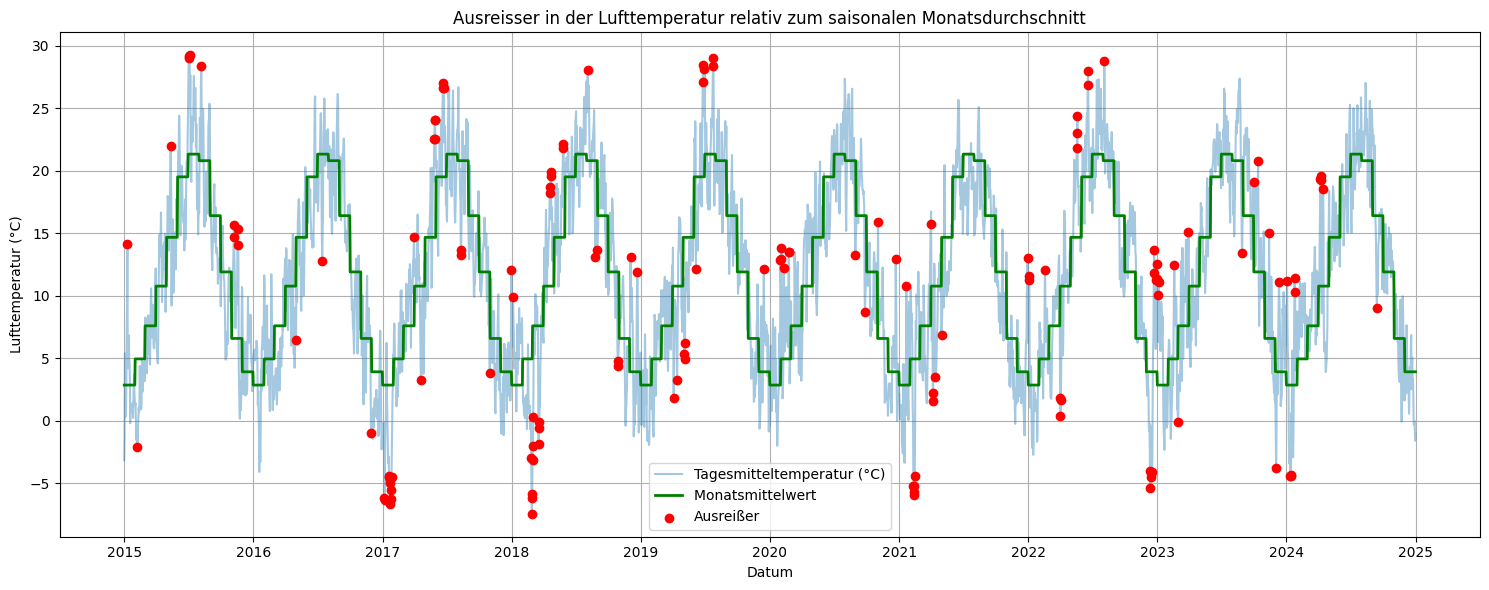

In [44]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Sicherstellen, dass 'Datum' datetime ist
df_plot['Datum'] = pd.to_datetime(df_plot['Datum'])

# Monat extrahieren für Gruppierung
df_plot['Monat'] = df_plot['Datum'].dt.month

# Monatliche Durchschnittswerte berechnen
monthly_avg = df_plot.groupby('Monat')['Lufttemperatur'].transform('mean')

# Abweichung berechnen
abweichung = df_plot['Lufttemperatur'] - monthly_avg

# Ausreißer: Abweichung > 2 * Standardabweichung
grenze = abweichung.std() * 2
outliers = abweichung.abs() > grenze

# Visualisierung
plt.figure(figsize=(15, 6))
plt.plot(df_plot['Datum'], df_plot['Lufttemperatur'], label='Tagesmitteltemperatur (°C)', alpha=0.4)
plt.plot(df_plot['Datum'], monthly_avg, label='Monatsmittelwert ', color='green', linewidth=2)
plt.scatter(df_plot.loc[outliers, 'Datum'], df_plot.loc[outliers, 'Lufttemperatur'],
            color='red', label='Ausreißer', zorder=5)

plt.title('Ausreisser in der Lufttemperatur relativ zum saisonalen Monatsdurchschnitt')
plt.xlabel('Datum')
plt.ylabel('Lufttemperatur (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Die Abbildung zeigt die täglichen Mittelwerte der Lufttemperatur im Vergleich zum saisonalen Monatsmittelwert sowie die identifizierten Ausreisser.

Die Ausreisser verteilen sich grundsätzlich gleichmässig über alle Jahre und Jahreszeiten hinweg. Es treten sowohl positive als auch negative Abweichungen auf. Auffällig ist jedoch, dass mehr positive Ausreisser zu beobachten sind. Dies deutet auf eine zunehmende Häufung ungewöhnlich warmer Tage hin, was im Kontext der fortschreitenden Klimaerwärmung interpretiert werden kann.


## 4.2 Clustering

In diesem Abschnitt werden zwei Clustering-Verfahren eingesetzt, um typische Verbrauchstage im Stromverbrauchsverhalten zu identifizieren. Ziel ist es, strukturelle Ähnlichkeiten im Tageslastgang zu erkennen, die über die klassische Einteilung in Wochentage hinausgehen.

Es wird angenommen, dass bestimmte Tage wie Feiertage, Brückentage oder Ferienzeiten ein vom üblichen Muster abweichendes Verbrauchsprofil aufweisen. Durch das Clustering sollen solche verbrauchsgeprägten Tagesmuster automatisch erkannt und in Gruppen zusammengefasst werden.

Die resultierenden Cluster stehen anschliessend als zusätzliche erklärende Variable für die Prognosemodelle zur Verfügung.


### 4.2.1 Erstellen einer Pivot-Tabelle

Für das Clustering wird der Stromverbrauch jedes einzelnen Tages als Zahlenreihe benötigt. Dazu wird aus dem 15-Minuten-Datensatz eine Pivot-Tabelle erstellt. In dieser entspricht jede Zeile einem Kalendertag und jede Spalte einem bestimmten 15-Minuten-Zeitpunkt.



In [45]:
#kopie erstellen
df_pivot = df_stromverbrauch_clean_15min.copy()

# Spalte Datum hinzufügen
df_pivot['Datum'] = df_pivot['Start der Messung'].dt.date

# Pivot-Tabelle erstellen: Zeile = Datum, Spalten = Viertelstunden, Werte = Stromverbrauch
df_pivot = df_pivot.pivot_table(
    index='Datum',
    columns=df_pivot['Start der Messung'].dt.time,
    values='Stromverbrauch'
)
# spaltennamen als hh:mm formatieren
df_pivot.columns = df_pivot.columns.map(lambda t: t.strftime('%H:%M'))

df_pivot.head()


Start der Messung       00:00       00:15       00:30       00:45       01:00  \
Datum                                                                           
2015-01-01         33079.5220  33866.3075  33815.7260  33400.2135  33028.2820   
2015-01-02         31770.1130  31492.7470  31115.2520  30404.0050  29636.1555   
2015-01-03         33229.6645  32824.4540  32197.8895  31490.0510  31072.7915   
2015-01-04         31791.4455  31277.9805  30968.0270  30283.3700  29988.4080   
2015-01-05         31070.7760  30588.4110  30314.8655  29199.4910  28827.8055   

Start der Messung      01:15       01:30       01:45       02:00       02:15  \
Datum                                                                          
2015-01-01         33138.408  34992.0545  34640.3605  33717.3205  32720.7655   
2015-01-02         29399.268  30804.1120  30825.0030  30410.1395  29466.2775   
2015-01-03         30842.737  32484.9840  32129.0225  31582.6515  30685.3715   
2015-01-04         29560.703  29276.7990  28889.8280  28410.0820  27957.3685   
2015-01-05         28331.132  28014.7590  27837.1350  27718.4310  27687.5115   

Start der Messung       02:30       02:45       03:00       03:15       03:30  \
Datum                                                                           
2015-01-01         32145.3035  31252.2380  30761.1045  30158.2930  29900.8460   
2015-01-02         28937.6695  28636.7725  28324.2255  28206.0865  27991.1635   
2015-01-03         29945.4915  29328.8325  29045.4420  28686.1795  28348.0875   
2015-01-04         27783.0235  27510.9150  27403.1795  27538.6750  27444.4185   
2015-01-05         27772.6355  27767.6115  27617.3270  27645.7275  27665.7655   

Start der Messung       03:45       04:00       04:15       04:30       04:45  \
Datum                                                                           
2015-01-01         29659.7385  29382.8730  29348.3530  29155.9150  29180.8355   
2015-01-02         28032.6575  27945.2495  28005.4530  28263.1960  28529.8040   
2015-01-03         28235.3390  28009.2825  28153.2595  28319.1990  28613.2145   
2015-01-04         27548.1795  27495.7870  27331.0785  27344.6295  27485.9080   
2015-01-05         27776.7425  27907.9970  28246.9740  28449.4205  28636.2685   

Start der Messung       05:00       05:15       05:30       05:45      06:00  \
Datum                                                                          
2015-01-01         29359.5390  29871.2055  30128.3365  30329.8380  30718.780   
2015-01-02         28913.8460  30296.9900  30996.0390  32180.5190  32724.455   
2015-01-03         28834.7765  29433.1565  29898.2465  30258.6170  30740.180   
2015-01-04         27664.1135  28054.0725  28161.6565  28464.0560  28452.517   
2015-01-05         29309.9095  30805.8620  31709.6025  33254.4945  35013.086   

Start der Messung       06:15       06:30       06:45      07:00       07:15  \
Datum                                                                          
2015-01-01         31203.0680  31128.9965  31492.3190  31704.114  32491.5315   
2015-01-02         34014.2895  35043.8400  35807.8080  36840.285  38055.4850   
2015-01-03         31231.2060  31641.9770  32133.5945  32427.446  33196.1580   
2015-01-04         28932.6955  29234.5040  29319.2245  29481.945  29979.1950   
2015-01-05         36653.7475  38264.3145  40160.9825  42649.923  44970.0095   

Start der Messung       07:30       07:45       08:00      08:15       08:30  \
Datum                                                                          
2015-01-01         32846.9610  32983.0755  33333.5070  32850.809  32801.8745   
2015-01-02         38932.9100  39575.2370  40536.9395  41157.012  41477.8580   
2015-01-03         33819.9425  34341.8455  35249.8205  36382.440  36863.4240   
2015-01-04         30324.7030  30507.8900  31097.5490  31030.964  31597.3395   
2015-01-05         46650.4100  48524.8855  50177.3260  51319.525  51912.5335   

Start der Messung       08:45       09:00       09:1

Nach dem Erstellen der Pivot-Tabelle wird geprüft, ob fehlende Werte enthalten sind. Diese NaN-Werte entstehen durch die Zeitumstellung von Sommer- auf Winterzeit, bei der die Stunde zwischen 02:00 und 03:00 Uhr doppelt vorkommt.

Da in der Pivot-Tabelle jede Uhrzeit nur einmal als Spalte vorhanden ist, kann der zweite Messwert dieser Stunde nicht zugeordnet werden. Dadurch entstehen Lücken in den betroffenen Tagen.

Da Clustering-Algorithmen keine fehlenden Werte verarbeiten können, werden diese Tage aus dem Datensatz entfernt.


In [46]:
count_nan(df_pivot, True)

Anzahl fehlender Werte (NaN) insgesamt: 40

Fehlende Werte pro Spalte:
Start der Messung
00:00     0
00:15     0
00:30     0
00:45     0
01:00     0
01:15     0
01:30     0
01:45     0
02:00    10
02:15    10
02:30    10
02:45    10
03:00     0
03:15     0
03:30     0
03:45     0
04:00     0
04:15     0
04:30     0
04:45     0
05:00     0
05:15     0
05:30     0
05:45     0
06:00     0
06:15     0
06:30     0
06:45     0
07:00     0
07:15     0
07:30     0
07:45     0
08:00     0
08:15     0
08:30     0
08:45     0
09:00     0
09:15     0
09:30     0
09:45     0
10:00     0
10:15     0
10:30     0
10:45     0
11:00     0
11:15     0
11:30     0
11:45     0
12:00     0
12:15     0
12:30     0
12:45     0
13:00     0
13:15     0
13:30     0
13:45     0
14:00     0
14:15     0
14:30     0
14:45     0
15:00     0
15:15     0
15:30     0
15:45     0
16:00     0
16:15     0
16:30     0
16:45     0
17:00     0
17:15     0
17:30     0
17:45     0
18:00     0
18:15     0
18:30     0
18:45     0

In [47]:
# Zeilen mit mindestens einem NaN-Wert löschen
df_pivot = df_pivot.dropna()

In [48]:
count_nan(df_pivot)

Anzahl fehlender Werte (NaN) insgesamt: 0


### 4.2.2 Normieren

Vor dem Clustering werden die Tagesprofile des Stromverbrauchs normiert. Hintergrund ist, dass der absolute Stromverbrauch beispielsweise im Winter deutlich höher ist als im Sommer. Für das Clustering sollen jedoch nicht die absoluten Verbrauchsmengen im Vordergrund stehen, sondern die zeitliche Struktur des Tagesverlaufs.

Ziel ist es, Muster im Lastgang zu erkennen, auch wenn die Gesamtverbrauchswerte zwischen den Tagen unterschiedlich sind. Durch die Normierung wird sichergestellt, dass die Clusterbildung auf der Form des Verbrauchsprofils basiert und nicht durch saisonale oder mengenbezogene Unterschiede dominiert wird.

Die Normierung erfolgt tagesweise, das heisst: Jede Zeile der Pivot-Tabelle wird für sich separat standardisiert. So wird die Tagesform (zum Beispiel typische Morgen- oder Abendspitzen) in den Mittelpunkt gestellt, unabhängig vom gesamten Verbrauchsniveau. Dadurch lassen sich Tagesprofile mit ähnlichem Verlauf, aber unterschiedlichen Mengen, zuverlässig zuordnen.


In [49]:
# z-transformation pro zeile (tagesweise normalisierung)
# jeder tag (zeile) bekommt mittelwert 0 und standardabweichung 1

df_pivot_scaled = df_pivot.copy()
df_pivot_scaled = df_pivot_scaled.sub(df_pivot_scaled.mean(axis=1), axis=0)
df_pivot_scaled = df_pivot_scaled.div(df_pivot_scaled.std(axis=1), axis=0)

# ergebnis anzeigen
df_pivot_scaled.head()


Start der Messung     00:00     00:15     00:30     00:45     01:00     01:15  \
Datum                                                                           
2015-01-01        -0.568062 -0.320184 -0.336120 -0.467028 -0.584205 -0.549510   
2015-01-02        -1.130604 -1.168505 -1.220088 -1.317276 -1.422198 -1.454568   
2015-01-03        -0.758605 -0.828435 -0.936411 -1.058394 -1.130300 -1.169946   
2015-01-04        -0.518392 -0.629637 -0.696789 -0.845124 -0.909029 -1.001693   
2015-01-05        -1.250564 -1.297000 -1.323334 -1.430709 -1.466491 -1.514305   

Start der Messung     01:30     01:45     02:00     02:15     02:30     02:45  \
Datum                                                                           
2015-01-01         0.034485 -0.076317 -0.367122 -0.681089 -0.862389 -1.143751   
2015-01-02        -1.262603 -1.259749 -1.316438 -1.445411 -1.517643 -1.558759   
2015-01-03        -0.886936 -0.948279 -1.042436 -1.197065 -1.324569 -1.430838   
2015-01-04        -1.063202 -1.147041 -1.250980 -1.349063 -1.386836 -1.445789   
2015-01-05        -1.544762 -1.561862 -1.573289 -1.576266 -1.568071 -1.568554   

Start der Messung     03:00     03:15     03:30     03:45     04:00     04:15  \
Datum                                                                           
2015-01-01        -1.298484 -1.488400 -1.569510 -1.645471 -1.732698 -1.743574   
2015-01-02        -1.601467 -1.617610 -1.646978 -1.641308 -1.653252 -1.645025   
2015-01-03        -1.479675 -1.541587 -1.599850 -1.619280 -1.658237 -1.633425   
2015-01-04        -1.469131 -1.439775 -1.460196 -1.437716 -1.449067 -1.484752   
2015-01-05        -1.583022 -1.580288 -1.578359 -1.567675 -1.555040 -1.522407   

Start der Messung     04:30     04:45     05:00     05:15     05:30     05:45  \
Datum                                                                           
2015-01-01        -1.804201 -1.796350 -1.740049 -1.578848 -1.497838 -1.434355   
2015-01-02        -1.609806 -1.573376 -1.520898 -1.331899 -1.236378 -1.074525   
2015-01-03        -1.604829 -1.554161 -1.515979 -1.412860 -1.332710 -1.270607   
2015-01-04        -1.481816 -1.451207 -1.412598 -1.328112 -1.304803 -1.239287   
2015-01-05        -1.502918 -1.484930 -1.420080 -1.276066 -1.189065 -1.040340   

Start der Messung     06:00     06:15     06:30     06:45     07:00     07:15  \
Datum                                                                           
2015-01-01        -1.311818 -1.159242 -1.182579 -1.068113 -1.001387 -0.753309   
2015-01-02        -1.000199 -0.823949 -0.683267 -0.578875 -0.437792 -0.271741   
2015-01-03        -1.187619 -1.103000 -1.032212 -0.947491 -0.896852 -0.764379   
2015-01-04        -1.241787 -1.137754 -1.072365 -1.054010 -1.018756 -0.911025   
2015-01-05        -0.871043 -0.713099 -0.558052 -0.375462 -0.135855  0.087496   

Start der Messung     07:30     07:45     08:00     08:15     08:30     08:45  \
Datum                                                                           
2015-01-01        -0.641331 -0.598448 -0.488044 -0.640118 -0.655535 -0.649334   
2015-01-02        -0.151846 -0.064075  0.067337  0.152066  0.195908  0.258423   
2015-01-03        -0.656882 -0.566942 -0.410470 -0.215284 -0.132396 -0.030342   
2015-01-04        -0.836169 -0.796480 -0.668728 -0.683154 -0.560446 -0.531211   
2015-01-05         0.249266  0.429719  0.588797  0.698755  0.755843  0.826004   

Start der Messung     09:00     09:15     09:30     09:45     10:00     10:15  \
Datum                                                                           
2015-01-01        -0.579490 -0.465405 -0.362483 -0.289653 -0.198707 -0.058420   
2015-01-02         0.348626  0.430591  0.497239  0.608960  0.621658  0.734281   
2015-01-03         0.112026  0.265904  0.402419  0.478221  0.529931  0.587530   
2015-01-04        -0.429068 -0.310956 -0.168690 -0.098398  0.005230  0.116000   
2015-01-05         0.846561  0.886281  0.909430  0.947545  0.993888  1.034176   

Start der Messung     10

### 4.2.3 K-Means-Methode

K-Means ist ein Clustering-Verfahren, das Datenpunkte in eine vorab festgelegte Anzahl von Gruppen unterteilt. Die Zuordnung basiert auf der euklidischen Distanz zu den jeweiligen Clusterzentren: Jeder Punkt wird dem nächstgelegenen Zentrum zugewiesen. Anschliessend werden die Zentren iterativ als Mittelwert der zugehörigen Punkte neu berechnet.

Ziel des Algorithmus ist es, die Summe der quadrierten Abstände aller Punkte zu ihrem jeweiligen Zentrum zu minimieren. Dieses Mass wird als Sum of Squared Errors (SSE) bezeichnet und dient zur Beurteilung der Clustergüte.

#### 4.2.3.1 Bestimmung der Clusteranzahl mit der Elbow-Methode

Die geeignete Anzahl Cluster k wird mit der Elbow-Methode bestimmt. Dabei wird der Fehler innerhalb der Cluster, gemessen als Sum of Squared Errors (SSE), für verschiedene Werte von k berechnet. Je mehr Cluster verwendet werden, desto kleiner wird dieser Fehler, da die Daten feiner aufgeteilt werden.

Der optimale Wert für k liegt dort, wo die Verbesserung der SSE mit zunehmender Clusteranzahl deutlich abnimmt. Dieser Knickpunkt markiert die Stelle, ab der zusätzliche Cluster keinen wesentlichen Informationsgewinn mehr liefern.


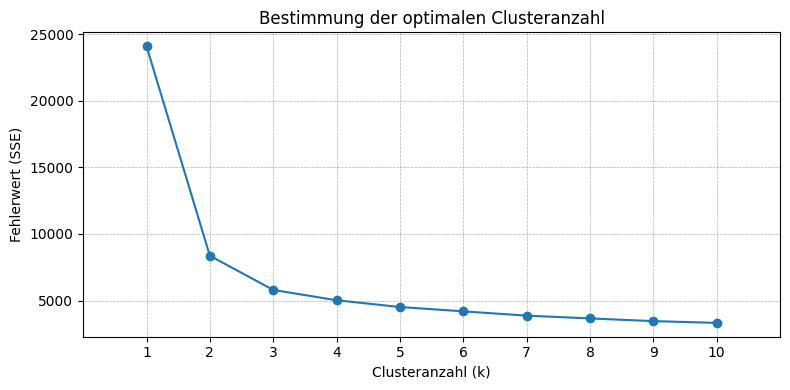

In [50]:
# Kopie erstellen
df_for_elbow = df_pivot_scaled.copy()

# Liste zur Speicherung der Fehlerwerte (SSE) für verschiedene Clusteranzahlen
sse = []

# Bereich der getesteten Clusteranzahl (k von 1 bis 10)
k_range = range(1, 11)

# Für jeden k-Wert: K-Means trainieren und SSE berechnen
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_for_elbow)
    sse.append(kmeans.inertia_)

# Visualisierung
plt.figure(figsize=(8, 4))

# Elbow-Kurve zeichnen
plt.plot(k_range, sse, marker='o')

# Titel und Achsentitel
plt.title('Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Clusteranzahl (k)')
plt.ylabel('Fehlerwert (SSE)')

# Gitterlinien dezent
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# X-Achse
plt.xlim(0, max(k_range) + 1)
plt.xticks(ticks=list(k_range))

plt.tight_layout()
plt.show()



Bei der Analyse der Elbow-Kurve zeigt sich, dass die Summe der quadrierten Fehler (SSE) mit zunehmender Clusteranzahl stetig abnimmt. Ab einem Wert von k = 2 flacht die Kurve jedoch deutlich ab. Auf dieser Grundlage wird die Anzahl der Cluster auf zwei festgelegt.

#### 4.2.3.2 Clustering durchführen

Im nächsten Schritt wird das K-Means-Verfahren mit der zuvor bestimmten Anzahl von zwei Clustern angewendet. Jeder Tag wird dabei auf Basis seines normierten Tageslastprofils einem der beiden Cluster zugewiesen.

Das Cluster wird als zusätzliche Spalte mit dem Namen «Cluster» gespeichert. Die Werte 0 und 1 kennzeichnen die beiden zugewiesenen Gruppen.


In [51]:
df_for_kmean = df_pivot_scaled.copy()
# Spaltennamen in Strings umwandeln (notwedig für diesen Algorithmus)
df_for_kmean.columns = df_pivot_scaled.columns.astype(str)

# Clustering mit 2 Clustern
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_for_kmean)

# Cluster-Zuweisung auf nicht skalierten datensatz hinzufügen
df_pivot_labeled_kmean = df_pivot.copy()
df_pivot_labeled_kmean['Cluster'] = cluster_labels
df_pivot_labeled_kmean.tail()

Start der Messung      00:00      00:15      00:30      00:45      01:00  \
Datum                                                                      
2024-12-27         27246.688  26961.206  26557.512  26197.862  26094.774   
2024-12-28         28293.724  27796.768  27524.553  27289.842  27153.954   
2024-12-29         27314.996  27072.244  26812.809  26474.518  26233.616   
2024-12-30         28387.108  28049.796  27567.616  27364.092  27166.155   
2024-12-31         29973.243  29435.013  29112.214  28381.398  28334.997   

Start der Messung      01:15      01:30      01:45      02:00      02:15  \
Datum                                                                      
2024-12-27         26751.516  26884.829  26305.873  25729.514  25600.922   
2024-12-28         27812.702  27563.995  27047.258  26617.999  26116.586   
2024-12-29         26310.745  25916.052  25528.420  25228.386  24921.053   
2024-12-30         26934.202  26973.833  26714.679  26549.329  26398.927   
2024-12-31         29334.750  29193.838  28610.836  28291.426  27964.066   

Start der Messung      02:30      02:45      03:00      03:15      03:30  \
Datum                                                                      
2024-12-27         25323.486  24953.838  25053.454  24736.216  24811.126   
2024-12-28         26066.492  25601.064  25550.241  25239.236  25155.575   
2024-12-29         24919.747  24764.329  24840.606  24636.268  24706.031   
2024-12-30         26338.735  26228.947  26093.256  26258.141  26233.509   
2024-12-31         27786.302  27150.384  27032.282  26865.519  26897.807   

Start der Messung      03:45      04:00      04:15      04:30      04:45  \
Datum                                                                      
2024-12-27         24987.386  25188.675  25286.575  25576.800  25726.261   
2024-12-28         25328.846  25277.168  25424.878  25308.345  25524.890   
2024-12-29         24764.034  24750.613  24698.875  24736.378  24729.400   
2024-12-30         26256.258  26297.291  26731.278  26822.782  27430.753   
2024-12-31         27031.562  27006.989  27083.000  27262.097  27557.018   

Start der Messung      05:00      05:15      05:30      05:45      06:00  \
Datum                                                                      
2024-12-27         26685.228  27323.604  28154.566  29017.237  30231.683   
2024-12-28         26121.290  26341.740  26553.766  27091.714  27697.514   
2024-12-29         25189.379  25179.554  25462.918  25809.435  26255.292   
2024-12-30         28126.792  28798.221  29546.842  30220.131  31535.297   
2024-12-31         28336.073  29077.273  29776.964  30269.235  31681.727   

Start der Messung      06:15      06:30      06:45      07:00      07:15  \
Datum                                                                      
2024-12-27         31177.757  31950.368  32530.479  33508.987  34226.510   
2024-12-28         28198.999  28661.040  29106.120  29772.434  30373.282   
2024-12-29         26356.594  26530.278  27109.858  27329.863  27566.930   
2024-12-30         32546.886  33838.346  34334.012  35617.761  36607.209   
2024-12-31         32842.296  33357.146  33510.452  35163.023  35609.703   

Start der Messung      07:30      07:45      08:00      08:15      08:30  \
Datum                                                                      
2024-12-27         34819.681  35653.208  35808.902  36382.680  36691.503   
2024-12-28         30894.277  31290.034  31529.746  32297.973  32775.689   
2024-12-29         27985.831  28407.780  28418.809  28670.395  28823.457   
2024-12-30         37365.683  37107.149  37780.251  38095.080  38549.832   
2024-12-31         36227.206  37074.962  37023.741  37573.459  38226.908   

Start der Messung      08:45      09:00      09:15      09:30      09:45  \
Datum                                                                      
2024-12-27         37136.756  37724.118  37666.275  38061.224  38253.894   
2024-12-28         33085.189  33654.724  

#### 4.2.3.3 Visualisierung der durchschnittlichen Tagesverläufe pro Cluster

Nach der Zuweisung der Cluster wird visualisiert, wie sich die durchschnittlichen Tagesverläufe in den beiden Gruppen unterscheiden. Dazu wird für jedes Cluster das arithmetische Mittel aller zugehörigen Tagesprofile berechnet.

Die resultierenden Kurven geben Auskunft über typische Verbrauchsmuster innerhalb der Cluster. Sie zeigen, ob sich die Lastverläufe beispielsweise hinsichtlich der Tageszeit, der Spitzenlasten oder des Verbrauchsniveaus systematisch unterscheiden. Diese Informationen helfen, die Cluster inhaltlich zu interpretieren.

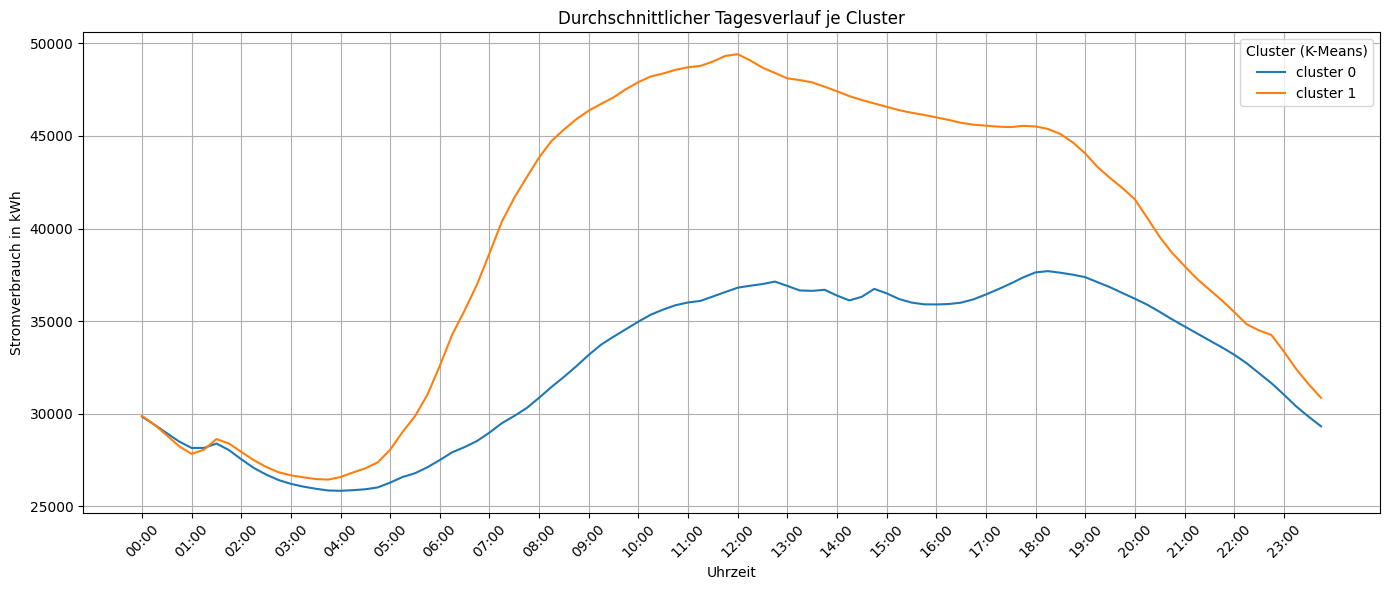

In [52]:
# durchschnittlicher tagesverlauf pro cluster berechnen
cluster_means = df_pivot_labeled_kmean.groupby("Cluster").mean()

# spaltennamen (zeitpunkte) als datetime mit dummy-datum einlesen
zeitpunkte = pd.to_datetime(cluster_means.columns, format="%H:%M")

# plot
plt.figure(figsize=(14, 6))
for cluster in cluster_means.index:
    plt.plot(zeitpunkte, cluster_means.loc[cluster], label=f"cluster {cluster}")

plt.title("Durchschnittlicher Tagesverlauf je Cluster")
plt.xlabel("Uhrzeit")
plt.ylabel("Stromverbrauch in kWh")
plt.xticks(zeitpunkte[::4], zeitpunkte[::4].strftime("%H:%M"), rotation=45)
plt.grid(True)
plt.legend(title="Cluster (K-Means)")
plt.tight_layout()
plt.show()

In der Theorie werden bei Lastprofilen typischerweise sogenannte Typentage verwendet. Meist wird dabei zwischen einem Wochentagsprofil (Montag bis Freitag) und einem Wochenendprofil (Samstag und Sonntag) unterschieden. Diese Einteilung erlaubt eine vereinfachte Abbildung typischer Verbrauchsmuster im Tagesverlauf.

Um zu prüfen, ob sich diese Struktur auch in den berechneten Clustern widerspiegelt, wird analysiert, welche Wochentage welchem Cluster zugewiesen wurden. Die Auswertung zeigt, dass Cluster 0 überwiegend Tage mit deutlich tieferem Stromverbrauch umfasst. Dies deutet darauf hin, dass es sich dabei mehrheitlich um Wochenendtage handelt. Cluster 1 hingegen weist ein durchgehend höheres Lastniveau auf, was typisch für reguläre Arbeitstage ist.

Dieses Ergebnis steht im Einklang mit den Beobachtungen aus Kapitel 4.1.2, wo bereits ersichtlich war, dass an Wochenenden insgesamt weniger Strom verbraucht wird.

Die folgende Visualisierung zeigt die genaue Zuordnung der Wochentage zu den beiden Clustern.


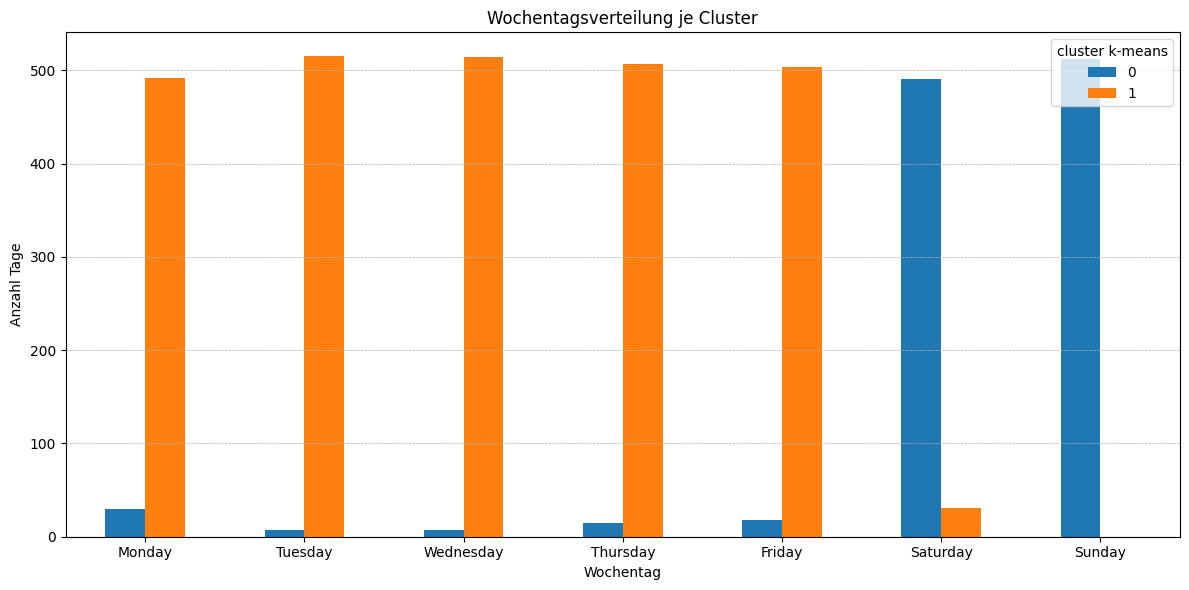

In [53]:
#  sicherstellen, dass datetime-format korrekt ist
df_plot = df_pivot_labeled_kmean.copy()
df_plot.index = pd.to_datetime(df_plot.index)
df_plot["Wochentag"] = df_plot.index.day_name()

#  wochentage pro wochentag und cluster zählen (reihenfolge umdrehen!)
wochentage_pro_cluster = (
    df_plot
    .groupby(["Wochentag", "Cluster"])
    .size()
    .unstack(fill_value=0)
)

#  wochentage sortieren
wochentag_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
wochentage_pro_cluster = wochentage_pro_cluster.reindex(wochentag_order)

#  bar-plot (gruppiert, nicht gestapelt)
wochentage_pro_cluster.plot(kind="bar", figsize=(12, 6), rot=0)
plt.title("Wochentagsverteilung je Cluster")
plt.xlabel("Wochentag")
plt.ylabel("Anzahl Tage")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.legend(title="cluster k-means")
plt.tight_layout()
plt.show()


Die Auswertung zeigt, dass die Zuordnung der Wochentage zu den Clustern ein klares Muster aufweist: Die Tage Montag bis Freitag wurden mehrheitlich dem Cluster 1 zugewiesen, während Samstag und Sonntag fast ausschliesslich dem Cluster 0 zugeordnet wurden.

Zusätzlich wird ausgewertet, wie viele Tage im Vergleich zur klassischen Einteilung in Wochentage und Wochenende abweichen, also zum Beispiel ein Sonntag im Werktagscluster oder ein Dienstag im Wochenendcluster. Solche Tage werden als atypisch bezeichnet, da sie vom erwarteten Muster abweichen. Sie können auf besonderes Verbrauchsverhalten oder spezifische Kontexte wie Feiertage oder Ferienzeiten hinweisen.


In [54]:
# Erwartete Zuordnung definieren
werktag = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
wochenende = ['Saturday', 'Sunday']

# 3. Falsche Zuordnungen identifizieren
falsch_zugeordnet = (
    ((df_plot['Cluster'] == 1) & df_plot['Wochentag'].isin(wochenende)) |
    ((df_plot['Cluster'] == 0) & df_plot['Wochentag'].isin(werktag))
)

# Anzahl und Prozentsatz berechnen
anzahl_falsch = falsch_zugeordnet.sum()
gesamt_tage = len(df_plot)
anteil_falsch = anzahl_falsch / gesamt_tage * 100

# Ausgabe
print(f"Anzahl atypische Tage: {anzahl_falsch}")
print(f"Prozentualer Anteil: {anteil_falsch:.2f}%")

Anzahl atypische Tage: 108
Prozentualer Anteil: 2.96%


Es soll ein zweites Clustering-Verfahren getestet werden, um die Stabilität und Aussagekraft der bestehenden Clusterstruktur zu überprüfen. Ziel ist es, zu evaluieren, ob sich ähnliche Gruppierungen auch mit einem alternativen Algorithmus ergeben.


### 4.2.4 Hierarchisches Clustering

Als zweites Verfahren wird agglomeratives Clustering getestet. Dabei handelt es sich um ein hierarchisches Clustering-Verfahren, das mit jedem Datenpunkt als eigenständigem Cluster beginnt. In jedem Schritt werden die beiden ähnlichsten Cluster anhand einer Distanzmetrik wie zum Beispiel der euklidischen Distanz zusammengeführt. Dieser Vorgang wird so lange wiederholt, bis entweder alle Datenpunkte zu einem einzigen Cluster verschmolzen sind oder eine vorgegebene Anzahl von Clustern erreicht ist. Die Entscheidung, welche Cluster zusammengeführt werden, basiert auf einem sogenannten Linkage-Kriterium (GeeksforGeeks, 2021).

Die folgende Abbildung zeigt schematisch, wie beim agglomerativen Clustering einzelne Punkte schrittweise zu immer grösseren Gruppen zusammengeführt werden.


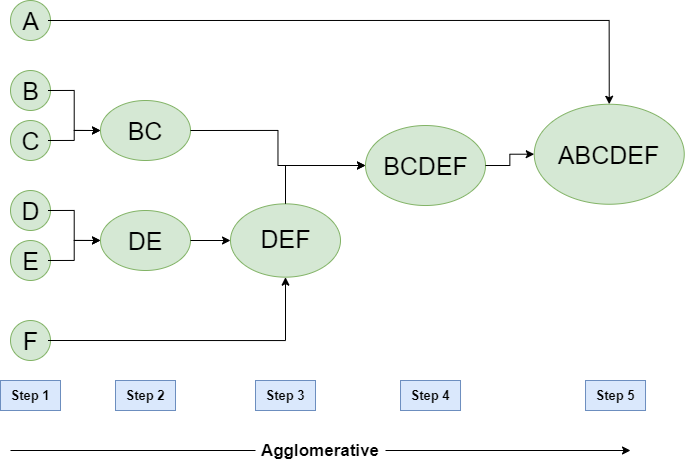

In [55]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/agglo_clustering.png')


Das hierarchische Clustering wird auf den zuvor normierten Tagesprofilen durchgeführt. Dazu wird das Verfahren Agglomerative Clustering mit einer vorgegebenen Clusteranzahl von zwei verwendet.

Jeder Tag wird dabei anhand seines standardisierten Lastprofils einem der beiden Cluster zugewiesen. Die resultierenden Cluster-Labels werden dem ursprünglichen Datensatz als neue Spalte mit dem Namen «Cluster» hinzugefügt.

In [56]:
#clustering durchfüren
agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(df_pivot_scaled)

# Cluster-Label anhängen
df_pivot_labeled_agglo = df_pivot.copy()
df_pivot_labeled_agglo['Cluster'] = labels_agglo

#### 4.2.4.1 Visualisierung der durchschnittlichen Tagesverläufe pro Cluster

Die durchschnittlichen Tagesverläufe der durch hierarchisches Clustering gebildeten Cluster werden nun visualisiert. Dabei wird für jedes Cluster das arithmetische Mittel der zugehörigen Tageslastprofile berechnet. Die Darstellung erfolgt analog zur K-Means-Auswertung.

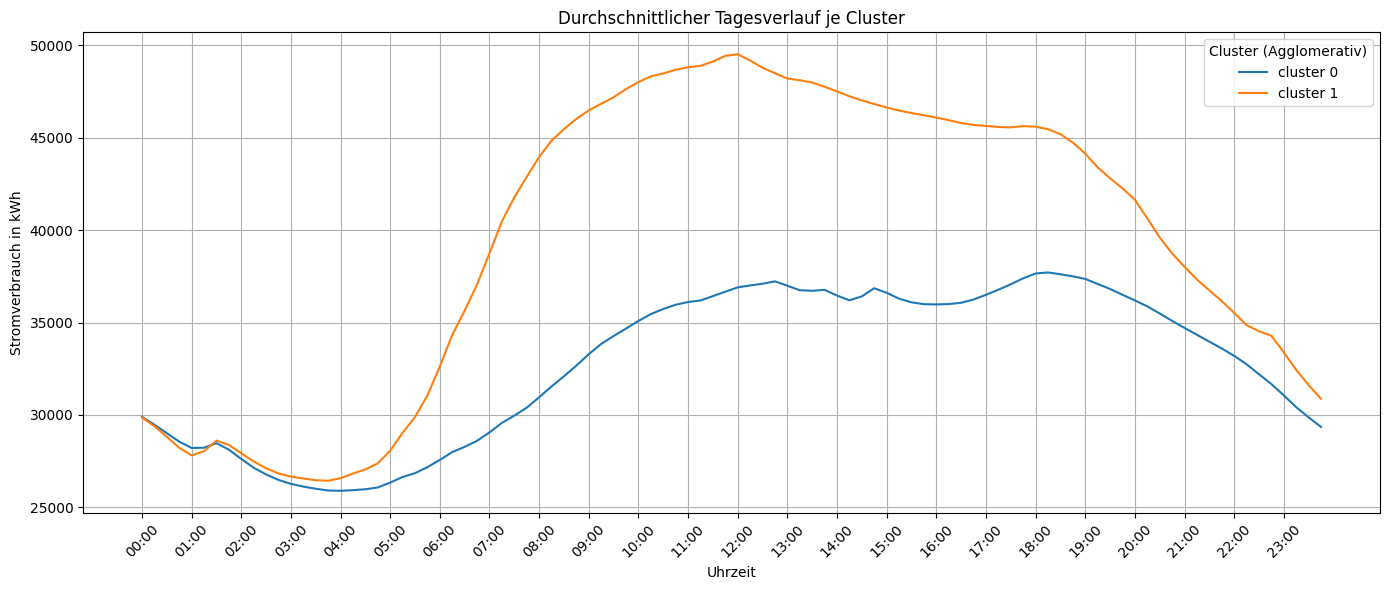

In [57]:
# durchschnittlicher tagesverlauf pro cluster berechnen
cluster_means_agglo = df_pivot_labeled_agglo.groupby("Cluster").mean()

# spaltennamen (zeitpunkte) als datetime mit dummy-datum einlesen
zeitpunkte = pd.to_datetime(cluster_means_agglo.columns, format="%H:%M")

# plot
plt.figure(figsize=(14, 6))
for cluster in cluster_means_agglo.index:
    plt.plot(zeitpunkte, cluster_means_agglo.loc[cluster], label=f"cluster {cluster}")

plt.title("Durchschnittlicher Tagesverlauf je Cluster")
plt.xlabel("Uhrzeit")
plt.ylabel("Stromverbrauch in kWh")
plt.xticks(zeitpunkte[::4], zeitpunkte[::4].strftime("%H:%M"), rotation=45)
plt.grid(True)
plt.legend(title="Cluster (Agglomerativ)")
plt.tight_layout()
plt.show()

Die Visualisierung zeigt die durchschnittlichen Tagesverläufe für die beiden Cluster, die durch hierarchisches Clustering gebildet wurden. Cluster 0 weist insgesamt ein deutlich tieferes Lastniveau auf als Cluster 1. Der Verlauf entspricht in seiner Struktur weitgehend demjenigen der K-Means-Cluster. Auch bei dieser Methode zeigt die Zuordnung der Tage zu den Clustern ein ähnliches Muster: Wochentage liegen überwiegend in Cluster 1, während Wochenendtage vorwiegend in Cluster 0 erscheinen.


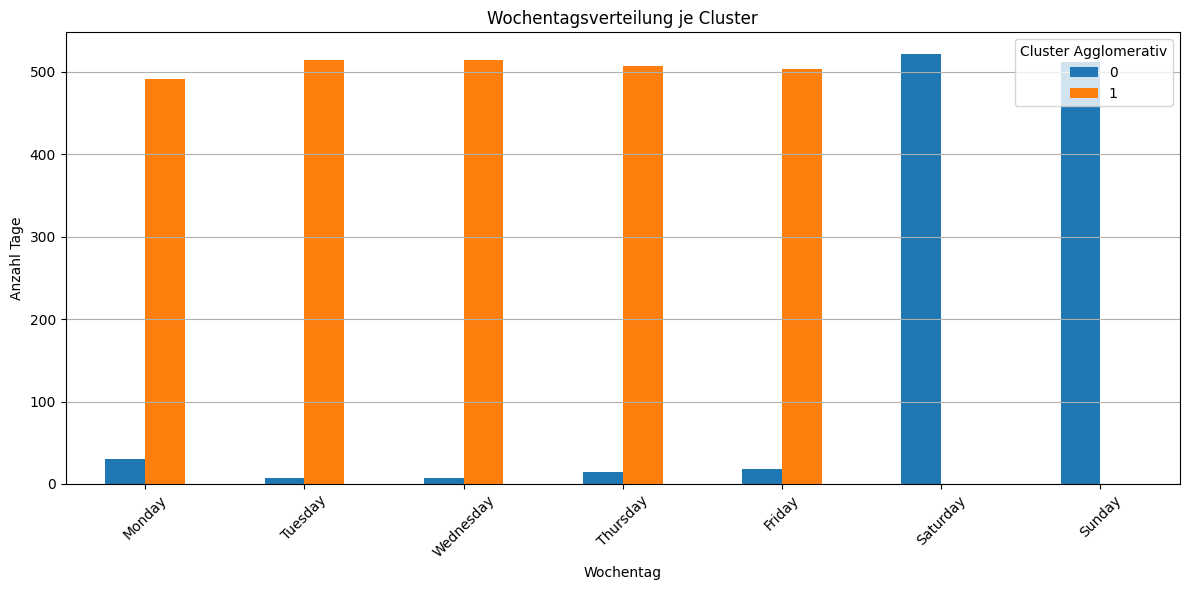

In [58]:
#Wochentage aus index datetime extrahieren und als spalte hinzufügen
df_pivot_labeled_agglo.index = pd.to_datetime(df_pivot_labeled_agglo.index)
df_pivot_labeled_agglo['Wochentag'] = df_pivot_labeled_agglo.index.day_name()

# Wochentage pro Cluster zählen
wochentage_pro_cluster = df_pivot_labeled_agglo.groupby(['Cluster', 'Wochentag']).size().unstack(fill_value=0)

# Wochentage in logische Reihenfolge bringen
wochentag_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wochentage_pro_cluster = wochentage_pro_cluster[wochentag_order]

# Plot erstellen
wochentage_pro_cluster.T.plot(kind='bar', figsize=(12, 6))
plt.title('Wochentagsverteilung je Cluster')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl Tage')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Cluster Agglomerativ')
plt.tight_layout()
plt.show()

Es zeigt sich, dass keine Wochenendtage dem Werktagscluster zugeordnet wurden. Einige Werktage wurden jedoch dem Cluster mit typischem Wochenendverhalten zugewiesen. Dies deutet darauf hin, dass diese Tage ein Stromverbrauchsprofil aufweisen, das eher dem eines Wochenendtages entspricht.

Zunächst wird untersucht, wie viele Tage im Vergleich zur erwarteten Wochentags- und Wochenendstruktur als atypisch klassifiziert wurden. Anschliessend wird analysiert, um welche Tage es sich dabei handelt und ob sich Muster oder Gemeinsamkeiten erkennen lassen.

In [59]:
#  Erwartete Zuordnung definieren
werktag = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
wochenende = ['Saturday', 'Sunday']

# 3. Falsche Zuordnungen identifizieren
falsch_zugeordnet = (
    ((df_pivot_labeled_agglo['Cluster'] == 1) & df_pivot_labeled_agglo['Wochentag'].isin(wochenende)) |
    ((df_pivot_labeled_agglo['Cluster'] == 0) & df_pivot_labeled_agglo['Wochentag'].isin(werktag))
)

# Anzahl und Prozentsatz berechnen
anzahl_falsch = falsch_zugeordnet.sum()
gesamt_tage = len(df_pivot_labeled_agglo)
anteil_falsch = anzahl_falsch / gesamt_tage * 100

# Ausgabe
print(f"Anzahl falsch zugeordneter Tage: {anzahl_falsch}")
print(f"Prozentualer Anteil: {anteil_falsch:.2f}%")

Anzahl falsch zugeordneter Tage: 77
Prozentualer Anteil: 2.11%


Mit agglomerativem Clustering wurden lediglich 77 Tage als atypisch klassifiziert. Nun soll untersucht werden, um welche spezifischen Tage es sich handelt.


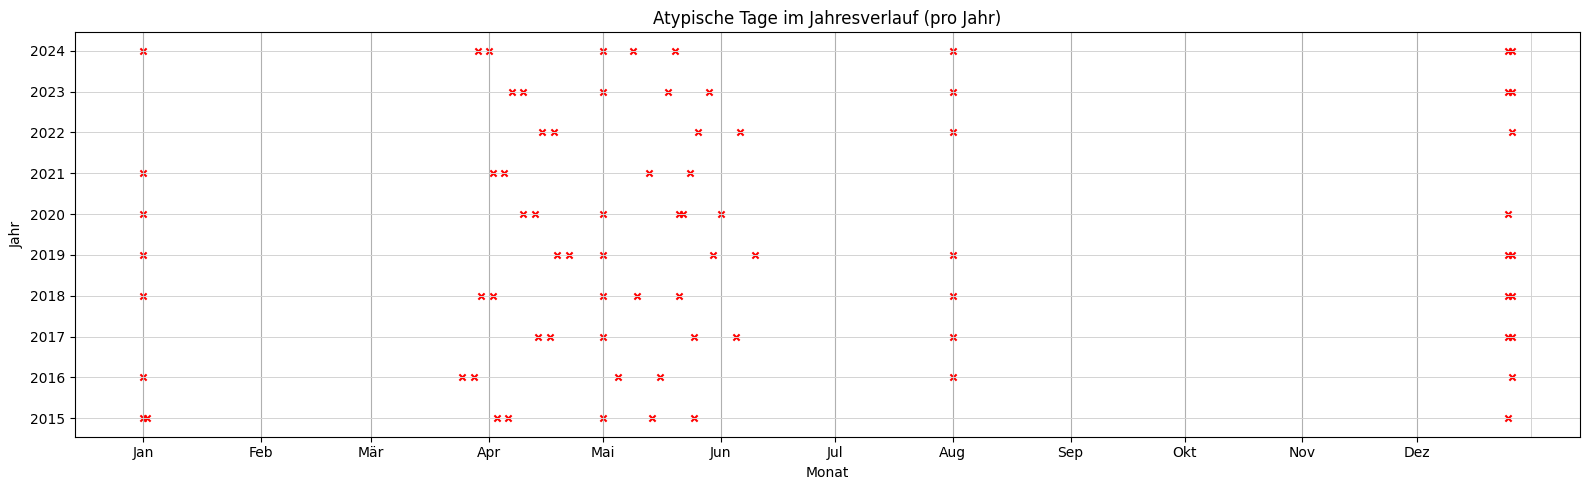

In [60]:
#  Kopie & Index als datetime
falsch_tage_df = falsch_zugeordnet.copy()
falsch_tage_df.index = pd.to_datetime(falsch_tage_df.index)

#  Nur falsch zugeordnete Tage
falsch_tage_df = falsch_tage_df[falsch_tage_df == True]

#  Plot vorbereiten
jahre = sorted(falsch_tage_df.index.year.unique())
plt.figure(figsize=(16, len(jahre) * 0.35 + 1.5))  # Höhe reduziert

#  Für jedes Jahr einzeln plotten
for jahr in jahre:
    daten_im_jahr = falsch_tage_df[falsch_tage_df.index.year == jahr]
    virtuelle_daten = pd.to_datetime({
        'year': 2000,
        'month': daten_im_jahr.index.month,
        'day': daten_im_jahr.index.day
    })
    plt.scatter(
        virtuelle_daten,
        [jahr] * len(virtuelle_daten),
        color='red',
        marker='x',
        s=20
    )

# X-Achse: Monatsnamen
monats_ticks = pd.date_range("2000-01-01", "2000-12-01", freq="MS")
monats_labels = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
plt.xticks(monats_ticks, monats_labels)

# Y-Achse: echte Jahre
plt.yticks(jahre)

# Horizontale Linien je Jahr
for jahr in jahre:
    plt.axhline(y=jahr, color='lightgray', linestyle='-', linewidth=0.7)

# Vertikale Linie am Jahresende (31. Dezember)
plt.axvline(pd.Timestamp("2000-12-31"), color='lightgray', linestyle='-', linewidth=0.7)

# Layout
plt.xlabel('Monat')
plt.ylabel('Jahr')
plt.title('Atypische Tage im Jahresverlauf (pro Jahr)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


Die Visualisierung zeigt die atypisch klassifizierten Tage auf einem Zeitstrahl, wobei die X-Achse den Verlauf eines Kalenderjahres und die Y-Achse das entsprechende Jahr darstellt. Jeder rote Marker repräsentiert einen Tag, der nicht dem erwarteten Cluster (Werktag oder Wochenende) zugewiesen wurde.

Dabei zeigt sich, dass solche Tage besonders häufig im April, Mai und Dezember auftreten. Dies deutet auf typische Feiertagsphasen hin, in denen das Verbrauchsverhalten von der Norm abweicht. Besonders betroffen sind Tage rund um:

- den 1. Januar (Neujahr)
- den 1. Mai (Tag der Arbeit)
- den 1. August (Bundesfeier)
- den 24. & 25. Dezember (Weihnachten)

Solche Feiertage führen häufig zu einem Verbrauchsverhalten, das eher einem Wochenende entspricht, auch wenn der Tag auf einen regulären Werktag fällt. Ebenso können Brückentage vor oder nach Feiertagen eine Rolle spielen. Die atypischen Tage lassen sich somit grösstenteils durch besondere Kalendereinflüsse erklären.

Die ermittelten Cluster-Labels dienen im weiteren Verlauf als zusätzliches Merkmal für die Verbrauchsprognose. Diese Information kann einem Prognosemodell helfen, strukturelle Muster zuverlässiger zu erfassen.

Die Clusterzuweisungen werden daher als neues Feature in die tagesaggregierten Datensätze integriert. Konkret wird die Klassifikation für jeden Tag sowohl dem DataFrame `df_merged_15min_cluster` (Stromverbrauch im 15-Minuten-Raster) als auch `df_merged_1d_cluster` (tägliche Aggregation) hinzugefügt.


In [61]:
# sicherstellen, dass beide datumsformate kompatibel sind
df_merged_1d["Datum"] = pd.to_datetime(df_merged_1d["Datum"])
df_pivot_labeled_agglo.index = pd.to_datetime(df_pivot_labeled_agglo.index)

# cluster-spalte extrahieren und vorbereiten
df_cluster_labels = df_pivot_labeled_agglo[["Cluster"]].copy()
df_cluster_labels = df_cluster_labels.reset_index().rename(columns={"index": "Datum"})

# neues dataframe erstellen, das Cluster enthält
df_merged_1d_cluster = df_merged_1d.merge(df_cluster_labels, on="Datum", how="left")
# Beim cluster Datensatz fehlen ja zeilen, jetzt sind nan entstanden, die werden mit dem letzen wert gefüllt
df_merged_1d_cluster["Cluster"] = df_merged_1d_cluster["Cluster"].fillna(method="ffill").fillna(method="bfill")

df_merged_1d_cluster.head()

<ipython-input-61-3872b060f422>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged_1d_cluster["Cluster"] = df_merged_1d_cluster["Cluster"].fillna(method="ffill").fillna(method="bfill")


Datum  Stromverbrauch  Jahr  Monat  Tag  Wochentag  Tag des Jahres  \
0 2024-12-31     3354252.813  2024     12   31          1             366   
1 2024-12-30     3458629.936  2024     12   30          0             365   
2 2024-12-29     2866909.559  2024     12   29          6             364   
3 2024-12-28     3049541.397  2024     12   28          5             363   
4 2024-12-27     3243493.345  2024     12   27          4             362   

   Quartal  Woche des Jahres  Lufttemperatur  Cluster  
0        4                 1       -1.009375      1.0  
1        4                 1       -1.588542      1.0  
2        4                52       -0.282292      0.0  
3        4                52        0.009375      0.0  
4        4                52       -0.321875      1.0

In [62]:
# kopie erstellen und datum extrahieren
df_15min_copy = df_merged_15min.copy()
df_15min_copy["Datum"] = pd.to_datetime(df_15min_copy["Zeitstempel"]).dt.date

# cluster-labels vorbereiten
df_cluster_labels = df_pivot_labeled_agglo[["Cluster"]].copy()
df_cluster_labels = df_cluster_labels.reset_index().rename(columns={"index": "Datum"})
df_cluster_labels["Datum"] = pd.to_datetime(df_cluster_labels["Datum"]).dt.date

# neues df mit cluster-information
df_merged_15min_cluster = df_15min_copy.merge(df_cluster_labels, on="Datum", how="left")
# Beim cluster Datensatz fehlen ja zeilen, jetzt sind nan entstanden, die werden mit dem letzen wert gefüllt
df_merged_15min_cluster["Cluster"] = df_merged_15min_cluster["Cluster"].fillna(method="ffill").fillna(method="bfill")

df_merged_15min_cluster.head()

<ipython-input-62-6b2cec9b991e>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged_15min_cluster["Cluster"] = df_merged_15min_cluster["Cluster"].fillna(method="ffill").fillna(method="bfill")


Zeitstempel  Stromverbrauch  Jahr  Monat  Tag  Wochentag  \
0 2024-12-31 23:45:00+01:00       30282.928  2024     12   31          1   
1 2024-12-31 23:30:00+01:00       30448.868  2024     12   31          1   
2 2024-12-31 23:15:00+01:00       31074.397  2024     12   31          1   
3 2024-12-31 23:00:00+01:00       31567.270  2024     12   31          1   
4 2024-12-31 22:45:00+01:00       32043.473  2024     12   31          1   

   Tag des Jahres  Quartal  Woche des Jahres  Lufttemperatur       Datum  \
0             366        4                 1            -2.6  2024-12-31   
1             366        4                 1            -2.3  2024-12-31   
2             366        4                 1            -2.4  2024-12-31   
3             366        4                 1            -2.2  2024-12-31   
4             366        4                 1            -2.1  2024-12-31   

   Cluster  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

## 4.3 Korrelation Temperatur und Stromverbrauch

untersucht, ob ein direkter statistischer Zusammenhang zwischen der Lufttemperatur und dem Stromverbrauch besteht.

Ziel ist es, die Beziehung zwischen beiden Grössen zu quantifizieren und zu beurteilen, ob die Temperatur als erklärende Variable in den späteren Prognosemodellen verwendet werden kann.


Als Erstes werden Stromverbrauch und Lufttemperatur gemeinsam betrachtet. Um die Darstellung zu glätten und saisonale Muster besser sichtbar zu machen, wird ein 30-Tage gleitender Mittelwert verwendet.

In der Visualisierung zeigt sich eine tendenziell gegenläufige Entwicklung der beiden Grössen. In den Wintermonaten ist der Stromverbrauch erhöht, während die Temperaturen tief sind. In den Sommermonaten steigen die Temperaturen deutlich an, gleichzeitig sinkt der Stromverbrauch leicht. Die gegenläufige Saisonalität ist jedoch nicht exakt spiegelbildlich.


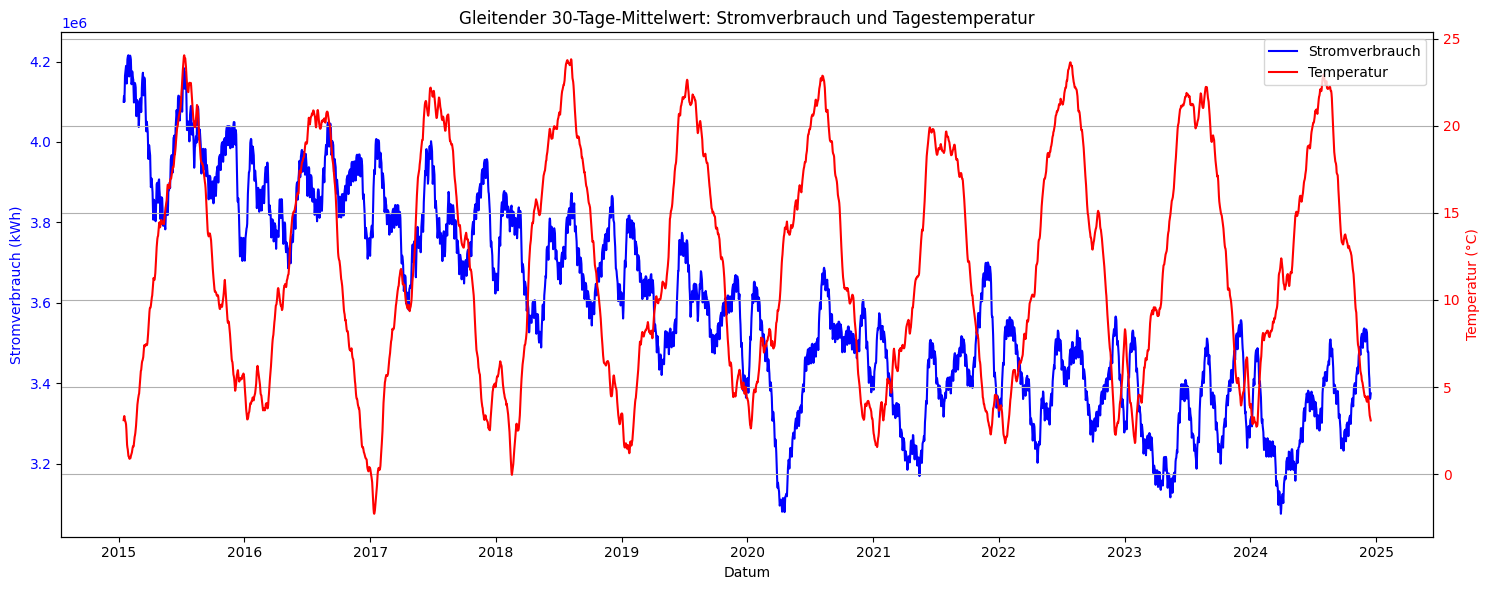

In [63]:
#Kopie estellen
df_plot = df_merged_1d.copy()

plt.figure(figsize=(15, 6))
ax1 = plt.gca()

# 30 Tage Gleitmittel berechnen
df_plot['Stromverbrauch_rolling'] = df_plot['Stromverbrauch'].rolling(window=30, center=True).mean()
df_plot['Temperatur_rolling'] = df_plot['Lufttemperatur'].rolling(window=30, center=True).mean()

# Glattgezogene Stromverbrauchskurve (links)
ax1.plot(df_plot['Datum'], df_plot['Stromverbrauch_rolling'], color='blue', label='Stromverbrauch')
ax1.set_xlabel('Datum')
ax1.set_ylabel('Stromverbrauch (kWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Glattgezogene Temperaturkurve (rechts)
ax2 = ax1.twinx()
ax2.plot(df_plot['Datum'], df_plot['Temperatur_rolling'], color='red', label='Temperatur')
ax2.set_ylabel('Temperatur (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legenden beider Achsen zusammenführen
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Gleitender 30-Tage-Mittelwert: Stromverbrauch und Tagestemperatur')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4.3.1 Scatterplot

Um den Zusammenhang zwischen Lufttemperatur und Stromverbrauch näher zu untersuchen, wird ein Scatterplot erstellt. Dabei wird für jeden Tag ein Punkt in einem zweidimensionalen Koordinatensystem dargestellt. Die X-Achse zeigt die mittlere Tagestemperatur, die Y-Achse den zugehörigen Stromverbrauch.

Der Scatterplot ermöglicht eine visuelle Einschätzung der Richtung und Form des Zusammenhangs.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


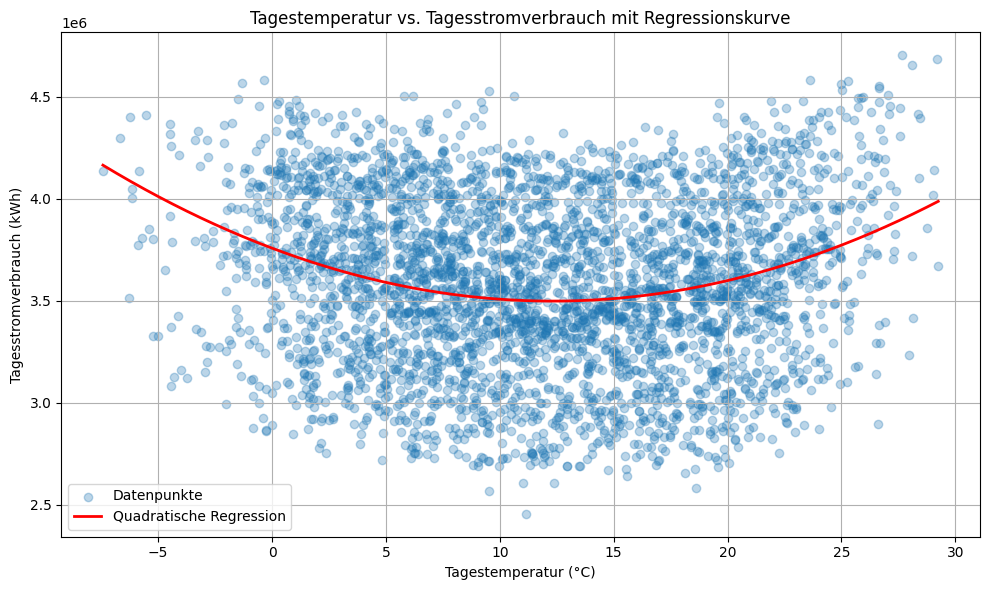

In [64]:
df_plot = df_merged_1d.copy()

# X und y vorbereiten
X = df_plot[['Lufttemperatur']]
y = df_plot['Stromverbrauch']

# Quadratische Merkmale erzeugen
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Regressionsmodell fitten
model = LinearRegression()
model.fit(X_poly, y)

# Werte für die Vorhersagelinie erzeugen
x_range = np.linspace(X.min(), X.max(), 300)
x_range_poly = poly.transform(x_range)

y_pred = model.predict(x_range_poly)

# Plot inkl. Regressionskurve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Datenpunkte')
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Quadratische Regression')
plt.title('Tagestemperatur vs. Tagesstromverbrauch mit Regressionskurve')
plt.xlabel('Tagestemperatur (°C)')
plt.ylabel('Tagesstromverbrauch (kWh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Der Scatterplot zeigt den Zusammenhang zwischen Lufttemperatur und Tagesstromverbrauch. Jeder Punkt stellt einen Kalendertag dar. Die Regressionskurve (rot) wurde mithilfe eines quadratischen Modells berechnet, weil keine linearen Zusammenhänge sichtbar sind.

Die Punktwolke weist ein U-förmiges Muster auf: Sowohl bei sehr tiefen als auch bei sehr hohen Temperaturen steigt der Stromverbrauch tendenziell an, während er im Bereich milder Temperaturen am niedrigsten ist. Dieses Verhalten lässt sich plausibel durch erhöhte Heizbedarfe im Winter und zunehmende Kühlbedarfe im Sommer erklären.

### 4.3.2 Korrelation der Ausreisser

In einem weiteren Schritt wird untersucht, ob ein Zusammenhang zwischen den Ausreissern im Stromverbrauch und in der Lufttemperatur besteht. Konkret wird geprüft, ob Tage mit ungewöhnlich hohen oder tiefen Temperaturen systematisch mit Ausreissern im Stromverbrauch einhergehen.


In [65]:
# Kopie erstellen
df_plot1 = df_merged_1d.copy()

# Monat extrahieren
df_plot1['Monat'] = pd.to_datetime(df_plot1['Datum']).dt.month

# Stromverbrauch: Monatsmittel berechnen
monatsmittel_strom = df_plot1.groupby('Monat')['Stromverbrauch'].transform('mean')
std_strom = df_plot1.groupby('Monat')['Stromverbrauch'].transform('std')

# Temperatur: Monatsmittel berechnen
monatsmittel_temp = df_plot1.groupby('Monat')['Lufttemperatur'].transform('mean')
std_temp = df_plot1.groupby('Monat')['Lufttemperatur'].transform('std')

# Abweichung berechnen
df_plot1['Abweichung_Strom'] = df_plot1['Stromverbrauch'] - monatsmittel_strom
df_plot1['Abweichung_Temp'] = df_plot1['Lufttemperatur'] - monatsmittel_temp

# Ausreißer markieren (Abweichung > 2*Std)
df_plot1['is_outlier_strom'] = (df_plot1['Abweichung_Strom'].abs() > 2 * std_strom)
df_plot1['is_outlier_temp'] = (df_plot1['Abweichung_Temp'].abs() > 2 * std_temp)

cross_tab_ausreisser = pd.crosstab(
    df_plot1['is_outlier_strom'],
    df_plot1['is_outlier_temp']
)

print(cross_tab_ausreisser)

is_outlier_temp   False  True 
is_outlier_strom              
False              3440    132
True                 74      7


Die Kreuztabelle zeigt, wie häufig Tage mit Ausreissern im Stromverbrauch gleichzeitig auch Ausreisser in der Temperatur aufweisen. Insgesamt wurden 81 Tage mit extremem Stromverbrauch identifiziert (davon 74 ohne extreme Temperatur und 7 mit). Ebenso wurden 139 Tage mit extremer Temperatur erkannt (davon 132 ohne Stromausreisser).

Lediglich an 7 Tagen traten Ausreisser in beiden Grössen gleichzeitig auf. Dies deutet darauf hin, dass die meisten Extremwerte im Stromverbrauch nicht direkt durch ungewöhnliche Temperaturen erklärbar sind. Umgekehrt führen auch extreme Temperaturen nicht zwangsläufig zu einem aussergewöhnlichen Stromverbrauch.



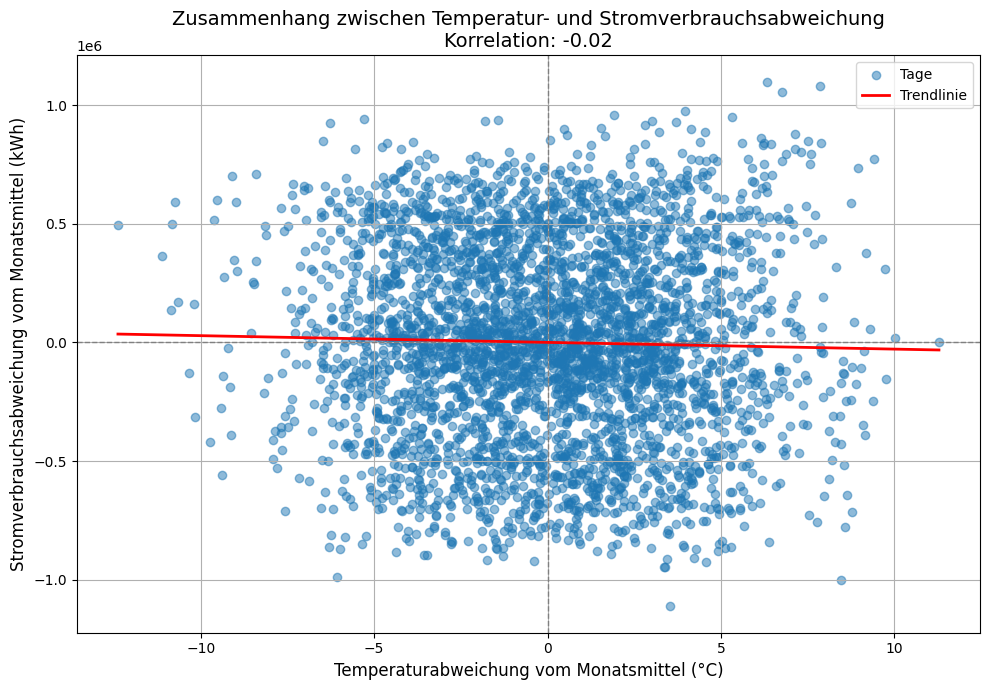

In [66]:
# Kopie erstellen
df_plot = df_merged_1d.copy()

# Monat berechnen, falls noch nicht vorhanden
df_plot['Monat'] = pd.to_datetime(df_plot['Datum']).dt.month

# Abweichung der Temperatur vom Monatsmittel berechnen
monat_temp_avg = df_plot.groupby('Monat')['Lufttemperatur'].transform('mean')
df_plot['Abweichung_temp'] = df_plot['Lufttemperatur'] - monat_temp_avg

# Abweichung des Stromverbrauchs vom Monatsmittel berechnen
monat_strom_avg = df_plot.groupby('Monat')['Stromverbrauch'].transform('mean')
df_plot['Abweichung_strom'] = df_plot['Stromverbrauch'] - monat_strom_avg

# Streudiagramm mit Trendlinie
plt.figure(figsize=(10, 7))
plt.scatter(df_plot['Abweichung_temp'], df_plot['Abweichung_strom'], alpha=0.5, label='Tage')

# Korrelation berechnen und anzeigen
korrelation = df_plot['Abweichung_temp'].corr(df_plot['Abweichung_strom'])
plt.title(f'Zusammenhang zwischen Temperatur- und Stromverbrauchsabweichung\nKorrelation: {korrelation:.2f}', fontsize=14)

# Achsentitel setzen
plt.xlabel('Temperaturabweichung vom Monatsmittel (°C)', fontsize=12)
plt.ylabel('Stromverbrauchsabweichung vom Monatsmittel (kWh)', fontsize=12)

# Achsenlinien
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Trendlinie (lineare Regression)
x = df_plot['Abweichung_temp']
y = df_plot['Abweichung_strom']
m, b = np.polyfit(x, y, 1)
plt.plot(np.sort(x), m*np.sort(x) + b, color='red', linewidth=2, label='Trendlinie')

# Legende und Gitter
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Die Visualisierung bestätigt die bisherigen Erkenntnisse: Es besteht kein signifikanter Zusammenhang zwischen der Abweichung der Lufttemperatur vom monatlichen Mittelwert und der Abweichung des Stromverbrauchs.

Die Korrelationsanalyse ergibt einen Wert von –0.02, was auf eine sehr schwache negative Korrelation hinweist. Die rote Trendlinie verläuft nahezu horizontal und verdeutlicht das Fehlen eines linearen Zusammenhangs.

Die Punktwolke ist gleichmässig verteilt und weist keine erkennbare Struktur oder Gruppierung auf. Weder bei positiven noch bei negativen Temperaturabweichungen lässt sich ein systematischer Effekt auf den Stromverbrauch erkennen.

Die Ergebnisse bestätigen, dass extreme Stromverbrauchswerte nicht direkt durch gleichzeitige extreme Temperaturen erklärt werden können.

## 4.4 Prognose

Auf Grundlage der zuvor aufbereiteten und analysierten Daten werden im nächsten Schritt mehrere Prognosemodelle entwickelt. Ziel ist es, den Stromverbrauch für die Folgetage möglichst präzise vorherzusagen. Dabei wird jeweils ein Prognosehorizont von sieben Tagen gewählt, um zu untersuchen, wie sich die Prognosequalität mit zunehmender Vorhersagedistanz verändert.

Im Folgenden wird eine Übersicht über die eingesetzten Modellansätze gegeben. Die Tabelle vergleicht die Modelle hinsichtlich ihrer Rechenintensität, der genutzten Datenauflösung sowie des vorgesehenen Anwendungszwecks.

**Modellübersicht**

| Modell   | Beschreibung | Verwendete Datenauflösung | Begründung für die gewählte Datenauflösung |
|----------|--------------|----------------------------|--------------------------------------------|
| SARIMA   | Klassisches statistisches Modell zur Abbildung saisonaler Zeitreihen mit ARIMA-Komponenten und zusätzlicher Saisonalität. | Täglich | Aggregation reduziert die Anzahl Parameter und ermöglicht eine stabile Modellanpassung. Eine Prognose auf 15-Minuten-Basis wäre rechnerisch ineffizient. |
| SARIMAX  | Erweiterung von SARIMA mit zusätzlichen externen Variablen wie Temperatur. | Täglich | Die tägliche Aggregation vereinfacht das Modell. Die Kombination aus Saisonalität und externen Variablen wäre bei 15-Minuten-Daten zu komplex. |
| XGBoost  | Maschinelles Lernmodell mit Entscheidungsbäumen. Erkennt auch nichtlineare Zusammenhänge und verarbeitet grosse Datenmengen effizient. | 15 Minuten | Das Modell ist rechentechnisch effizient und kann detaillierte Verbrauchsmuster im Tagesverlauf erkennen. Eine Aggregation ist nicht notwendig. |


**Vorgehen bei der Modellierung:**

Zuerst wird ein SARIMA-Modell als Baseline eingesetzt. Es verwendet ausschliesslich historische Verbrauchswerte und dient als Referenzpunkt für die Modellgüte.

Im zweiten Schritt folgt ein SARIMAX-Modell, das zusätzlich die Temperatur als exogene Variable einbezieht. Ziel ist es, zu prüfen, ob sich durch den Einbezug wetterbezogener Informationen eine Verbesserung der Prognose erzielen lässt.

Abschliessend wird XGBoost als leistungsfähiges Modell aus dem Bereich des maschinellen Lernens getestet. Es wird mit den hochaufgelösten 15-Minuten-Daten trainiert, um auch intratägliche Verbrauchsmuster abbilden zu können.


Definition von Funktionen die widerholt verwendet werden

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
def adf_test(series):
    """Verwendet den ADF-Test, um zu bestimmen, ob eine Serie stationär ist"""
    test_results = adfuller(series)
    print('ADF Statistik: ', test_results[0])
    print('p-Wert: ', test_results[1])
    print('Kritische Werte:')
    for thres, adf_stat in test_results[4].items():
        print("\t%s: %.2f" % (thres, adf_stat))

### 4.4.1 SARIMA

Als erstes Modell wird SARIMA eingesetzt. Das SARIMA-Modell (Seasonal Autoregressive Integrated Moving Average) ist eine Erweiterung des klassischen ARIMA-Modells, das saisonale Muster in Zeitreihen berücksichtigt. Es eignet sich besonders für Prognosen in Daten, die sowohl langfristige Trends als auch regelmässig wiederkehrende Strukturen (z. B. wöchentliche oder jährliche Saisonalität) aufweisen.

Das ARIMA-Modell besteht aus drei Komponenten:

1. **Autoregressive Komponente (AR):** Frühere Werte der Zeitreihe werden verwendet, um zukünftige Werte vorherzusagen.
2. **Integrierte Komponente (I):** Durch Differenzierung wird eine stationäre Zeitreihe erzeugt, um Trends zu entfernen.
3. **Moving-Average-Komponente (MA):** Frühere Prognosefehler werden zur Korrektur aktueller Vorhersagen herangezogen. Das hilft dabei, kurzfristige Schwankungen und Rauschen in der Zeitreihe zu erfassen, indem systematische Muster in den Abweichungen früherer Vorhersagen genutzt werden. Anstatt nur vergangene Werte zu berücksichtigen, bezieht das Modell also auch ein, wie stark es in der Vergangenheit danebenlag, und passt die Prognose entsprechend an.

SARIMA erweitert diese Struktur um saisonale Komponenten. Dabei ergeben sich insgesamt sieben Modellparameter:

- **Nicht-saisonale Parameter (p, d, q):**  
  - **p**: Ordnung der autoregressiven Komponente  
  - **d**: Anzahl der Differenzierungen zur Stationarisierung  
  - **q**: Ordnung der Moving-Average-Komponente

- **Saisonale Parameter (P, D, Q, s):**  
  - **P**: Ordnung der saisonalen Autoregression  
  - **D**: Anzahl saisonaler Differenzierungen  
  - **Q**: Ordnung der saisonalen Moving-Average-Komponente  
  - **s**: Länge der saisonalen Periode (z. B. 7 bei täglichen Werten mit wöchentlicher Saisonalität, 96 bei Viertelstundenwerten über 24 Stunden)

Mit „Ordnung“ ist jeweils die Anzahl der zurückliegenden Zeitpunkte gemeint, die in die Modellierung einbezogen werden. Beispielsweise bedeutet eine Ordnung von 2 bei der autoregressiven Komponente (p = 2), dass das Modell die letzten zwei Werte der Zeitreihe verwendet, um den nächsten Wert vorherzusagen. Entsprechend nutzt eine Moving-Average-Komponente mit Ordnung 1 (q = 1) den letzten Prognosefehler, um die aktuelle Schätzung zu verbessern. Dasselbe Prinzip gilt auch für die saisonalen Parameter, nur dass dort Werte eine volle Saison zurück betrachtet werden (z. B. exakt eine Woche oder ein Tag zuvor).

Die saisonalen Parameter funktionieren analog zu den nicht-saisonalen, beziehen sich aber auf Werte, die genau eine Saison (z. B. eine Woche oder ein Tag) zurückliegen. So kann das Modell regelmässige, wiederkehrende Muster erkennen und gezielt berücksichtigen. Beispielsweise erlaubt es eine saisonale AR-Komponente, zu lernen, dass der Verbrauch am Montag oft ähnlich ist wie jener am vorherigen Montag (Penn State, o. J.; GeeksforGeeks, 2022).


#### 4.4.1.1 Voruntersuchung
Zur Auswahl geeigneter Modellparameter für SARIMA wird die Zeitreihe des täglichen Stromverbrauchs zunächst mithilfe einer Dekomposition analysiert. Die Zerlegung in Trend-, Saisonal- und Restkomponenten hilft dabei, zu prüfen, ob die Zeitreihe stationär ist beziehungsweise wie sie gegebenenfalls stationär gemacht werden kann.

Eine stationäre Zeitreihe ist Voraussetzung für die Anwendung des SARIMA-Modells. Liegt keine Stationarität vor, kann diese beispielsweise durch Differenzierung oder logarithmische Transformation erreicht werden.

Im Anschluss an die Transformation werden die Autokorrelationsfunktion (ACF) und die partielle Autokorrelationsfunktion (PACF) berechnet. Diese Visualisierungen liefern Hinweise auf die Ordnung der Parameter für SARIMA.

Auf Basis dieser Voruntersuchungen werden die finalen Modellparameter für SARIMA bestimmt.

In [69]:
df_sarima = df_stromverbrauch_clean_1d.copy()
df_sarima.set_index("Start der Messung", inplace=True)
df_sarima.sort_index(inplace=True)

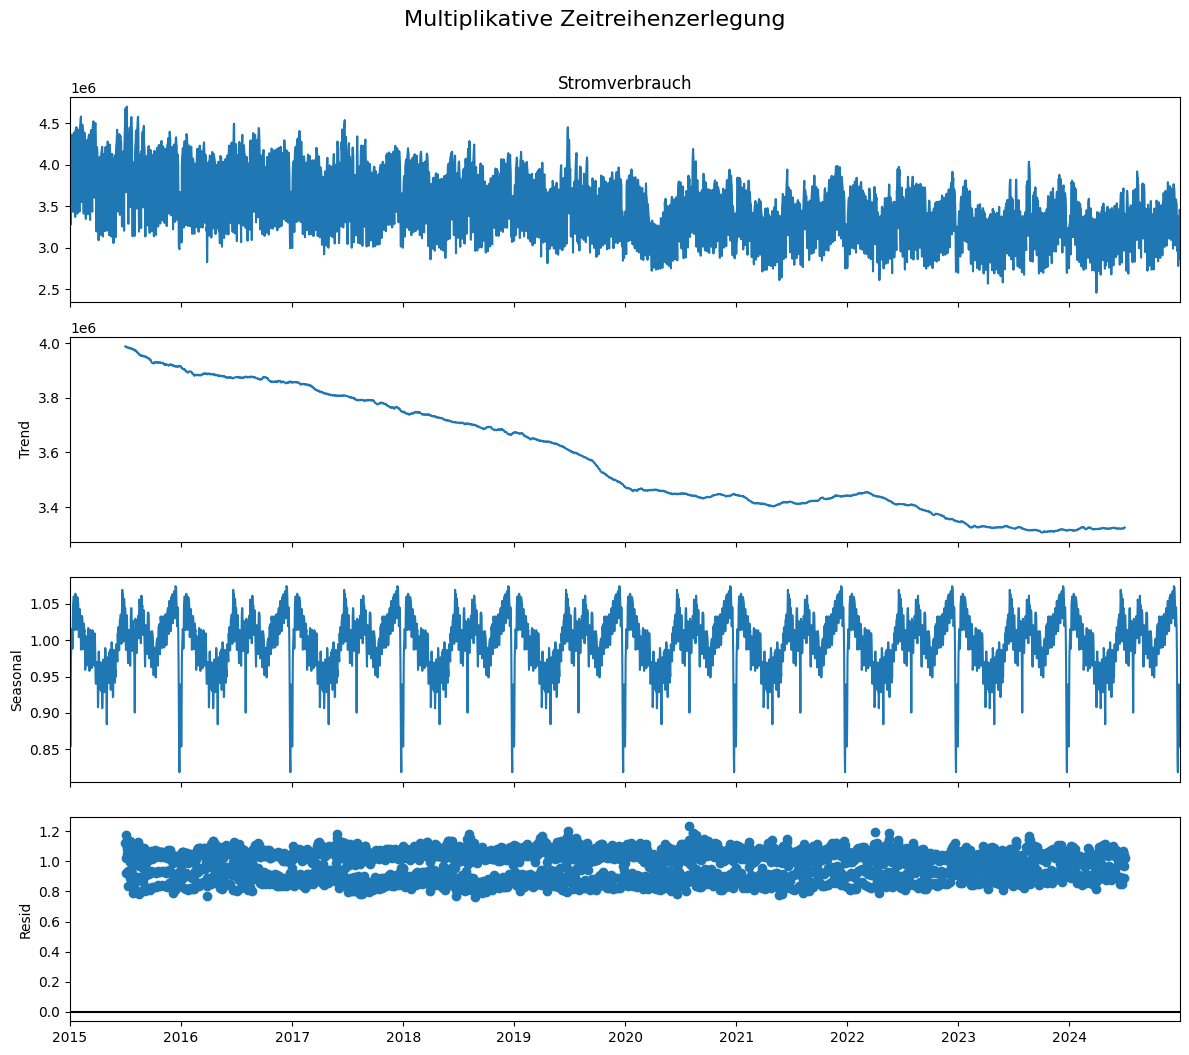

In [70]:
# Zeitreihe (Stromverbrauch) als Variable festlegen
time_series = df_sarima['Stromverbrauch']

# Multiplikative Zerlegung mit einer saisonalen Periode von 365
result_multiplicative = seasonal_decompose(time_series, model='multiplicative', period=365)
# Zerlegung visualisieren
result_multiplicative.plot()
plt.suptitle('Multiplikative Zeitreihenzerlegung', fontsize=16, y=1.05)
plt.show()

Wie bereits in Kapitel 4.1.4.1 ersichtlich, liefert die Dekomposition der Zeitreihe folgende Erkenntnisse:

- Stromverbrauch (obere Grafik): Der Stromverbrauch schwankt über die Zeit, es sind jedoch keine abrupten Veränderungen erkennbar.
- Trend (zweite Grafik): Der langfristige Verlauf zeigt eine Abnahme des Stromverbrauchs.
- Saisonale Schwankungen (dritte Grafik): Es bestehen ausgeprägte jährliche Schwankungen. Darüber hinaus sind feinere periodische Muster erkennbar.
- Residuen (unterste Grafik): Die Residuen sind unregelmässig verteilt und zeigen keine systematischen Muster.

In einem nächsten Schritt wird die Zeitreihe transformiert, um eine stationäre Zeitreihe zu erzeugen.
Dafür werden folgende Schritte durchgeführt:

- Logarithmische Transformation, um eine konstante Varianz zu erzeugen
- Einfache Differenzierung, um den langfristigen Trend zu entfernen
- Saisonale Differenzierung mit einer Periodenlänge von 365 Tagen, um die jährliche Saisonalität zu eliminieren

In [71]:
df_sarima_trans = df_sarima.copy()
#log
df_sarima_trans["Stromverbrauch"] = np.log(df_sarima_trans["Stromverbrauch"])
#diff
df_sarima_trans["Stromverbrauch"] = df_sarima_trans["Stromverbrauch"].diff()
# daisonale differenizierung
df_sarima_trans["Stromverbrauch"] = df_sarima_trans["Stromverbrauch"].diff(periods=365)

#drop nan, entstanden durh differenzierung
df_sarima_trans = df_sarima_trans.dropna()

Wir machen eine erneute Zeitreihenzerlegung um das ergebnis der Transformation zu prüfen. Diesmal mit dem additiven Modell, weil durch die Transformation negative Werte entstanden sind. Das multiplikative Modell funktioniert nur mit positiven Werten.

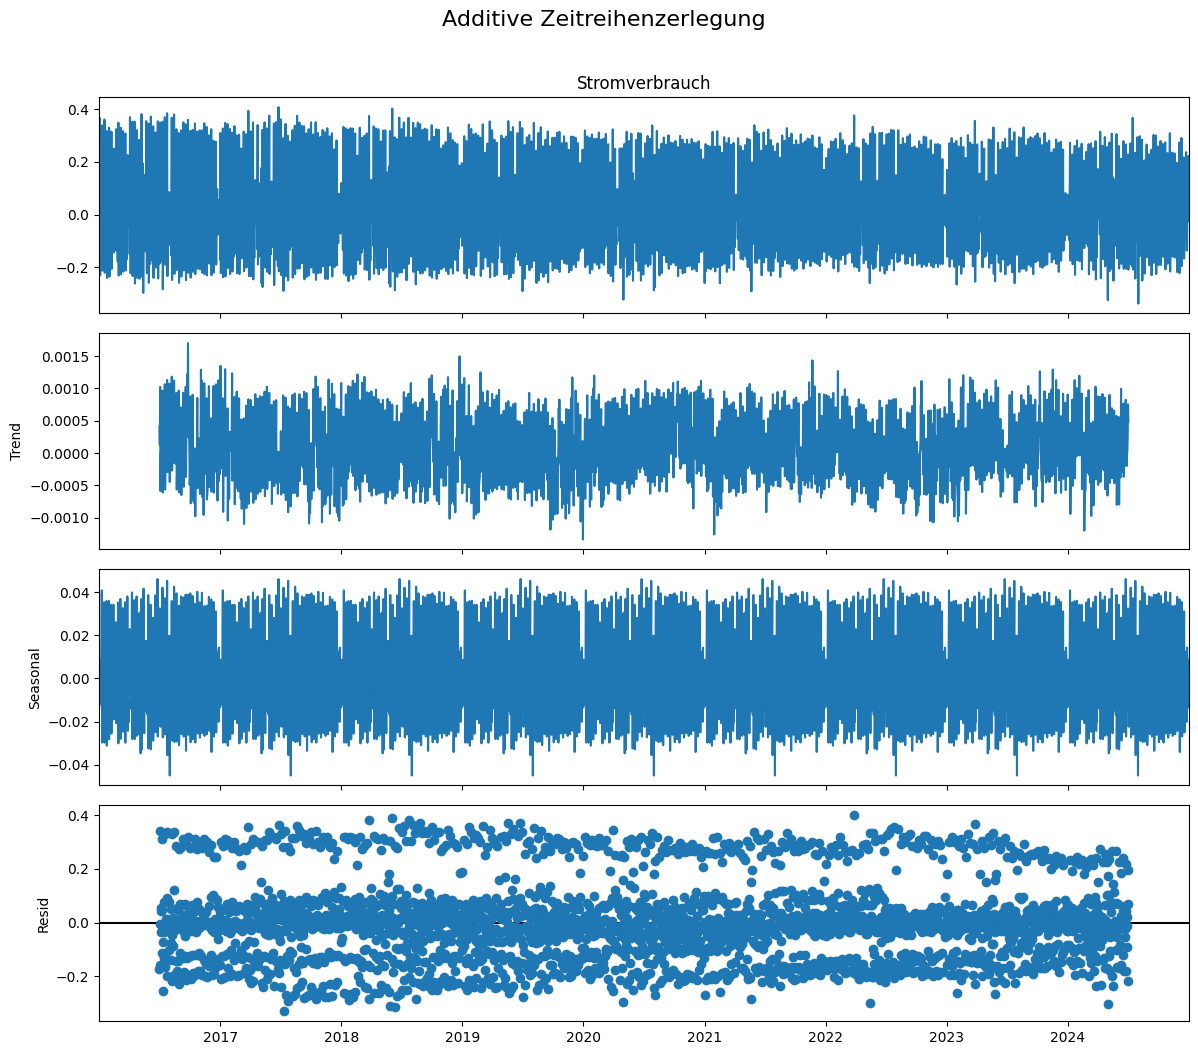

In [72]:
# Zeitreihe (Stromverbrauch) als Variable festlegen
time_series = df_sarima_trans['Stromverbrauch']

# Multiplikative Zerlegung mit einer saisonalen Periode von 365
result_multiplicative = seasonal_decompose(time_series, model='additive', period=365)
# Zerlegung visualisieren
result_multiplicative.plot()
plt.suptitle('Additive Zeitreihenzerlegung', fontsize=16, y=1.05)
plt.show()

Nach der Transformation und der differenziellen Vorverarbeitung ergibt sich durch die additive Zerlegung folgendes Bild:

- Die Zeitreihe im oberen Teil zeigt eine weitgehend konstante Varianz. Dies spricht für den Erfolg der logarithmischen Transformation.
- In der Trendkomponente ist kein klarer Verlauf mehr zu erkennen. Die einfache Differenzierung hat den ursprünglichen Abwärtstrend weitgehend entfernt.
- Die saisonale Komponente zeigt, dass die jährliche Saisonalität eliminiert wurde. Mehrere kleinere periodische Schwankungen sind jedoch weiterhin sichtbar.
- Die Residuen (Restkomponente) weisen ein zufälliges Muster ohne erkennbare Struktur auf, was auf weisses Rauschen hindeutet.

Zur Überprüfung der Stationarität wird zusätzlich ein Augmented-Dickey-Fuller-Test (ADF-Test) durchgeführt.


In [73]:
adf_test(df_sarima_trans["Stromverbrauch"])


ADF Statistik:  -14.441825971933262
p-Wert:  7.337840838789981e-27
Kritische Werte:
	1%: -3.43
	5%: -2.86
	10%: -2.57


Der p-Wert des Augmented-Dickey-Fuller-Tests liegt unter 0.05. Somit kann die Nullhypothese der Nicht-Stationarität auf einem Signifikanzniveau von 5 Prozent abgelehnt werden. Die Zeitreihe kann daher als stationär betrachtet werden.

#### 4.4.1.2 ACF- und PACF-Plots

Ein zentraler Bestandteil der Zeitreihenanalyse ist das Verständnis der Zusammenhänge zwischen Beobachtungen über die Zeit hinweg. Hierfür bieten die Autokorrelationsfunktion (ACF) und die partielle Autokorrelationsfunktion (PACF) wichtige Einblicke.

Die ACF misst den linearen Zusammenhang zwischen einer Zeitreihe und ihren eigenen zeitlich verschobenen Werten (Lags). Ein hoher Autokorrelationswert bei Lag k bedeutet, dass der Wert zum Zeitpunkt t mit dem Wert zum Zeitpunkt t − k stark zusammenhängt.

Im Gegensatz dazu zeigt die PACF den direkten Zusammenhang zwischen einer Beobachtung und einem bestimmten Lag, nachdem der Einfluss der Zwischenwerte herausgerechnet wurde.

#### 4.4.1.3 Bestimmung der SARIMA-Parameter mit ACF und PACF

Wie erwähnt, besteht ein SARIMA-Modell aus zwei Komponenten-Grtuppen: einer nicht-saisonalen (p, d, q) und einer saisonalen (P, D, Q, s). Eine Schätzung geeigneter Parameter erfolgt häufig mithilfe der ACF- und PACF-Plots.

- **p (Ordnung des autoregressiven Teils):**  
  Die PACF hilft, die Anzahl autoregressiver Terme zu bestimmen. Die Anzahl der signifikante Ausschlag deutet häufig auf den Wert von p hin.

- **q (Ordnung des Moving-Average Teils):**  
  Die ACF zeigt, wie viele MA-Terme im Modell erforderlich sind. Ein abrupter Abfall nach einem bestimmten Lag (z. B. Lag 1 oder 2) kann auf den Wert von q hinweisen.

- **d (Differenzierungsgrad):**  
  Der notwendige Differenzierungsgrad ergibt sich aus dem  Stationaritätstest (z. B. ADF-Test). Der Wert d entspricht der Anzahl an Differenzierungen, die notwendig waren, um die Zeitreihe stationär zu machen.

- **P, D, Q (saisonale Komponenten):**  
  Saisonale Muster lassen sich anhand periodischer Ausschläge in ACF und PACF erkennen.
  - **P:** Ausschläge in der PACF bei Vielfachen der Saisonalität (z. B. Lag 7, 14) deuten auf saisonale AR-Terme hin.
  - **Q:** Ausschläge in der ACF bei den entsprechenden Lags sprechen für saisonale MA-Terme.
  - **D:** Wird gewählt, wenn nach saisonaler Differenzierung die periodischen Muster verschwinden und die Zeitreihe stationär wird.

- **s (Länge der saisonalen Periode):**  
  Dieser Parameter entspricht der Anzahl Zeitpunkte pro Periode (z. B. 7 bei wöchentlichen Mustern in täglichen Daten.

**Zusammengefasst:**
- ACF liefert Hinweise auf q und Q  
- PACF unterstützt die Wahl von p und P  
- Stationarität und Saisonalität bestimmen d und D  
- Wiederkehrende Muster in den Plots helfen bei der Wahl von s

 Die exakte Bestimmung optimaler Parameter ist jedoch nicht immer eindeutig. Oft kann eine systematische Suche, beispielsweise mittels Grid Search, helfen, das am besten passende SARIMA-Modell zu identifizieren.


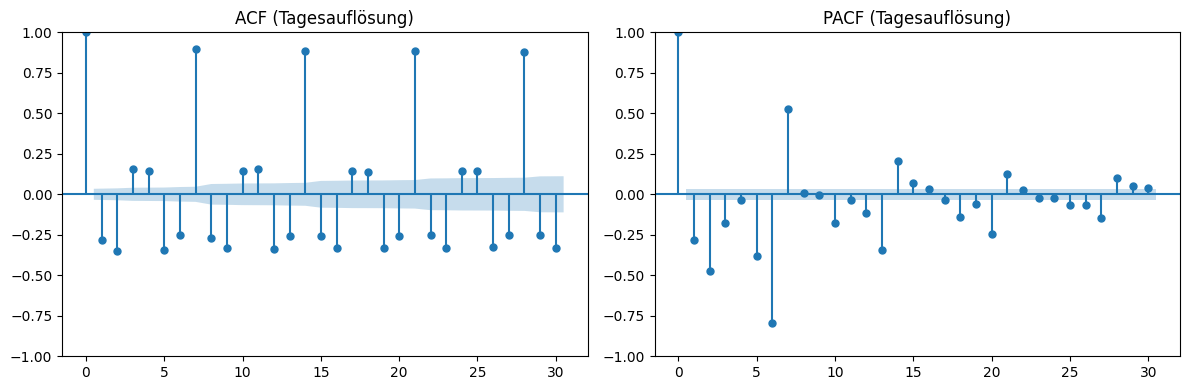

In [74]:
y = df_sarima_trans["Stromverbrauch"]
max_lag = 30 # ca. 1 Monat
plot_title = "(Tagesauflösung)"

# Plot erstellen
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_acf(y, lags=max_lag, ax=plt.gca())
plt.title(f"ACF {plot_title}")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=max_lag, ax=plt.gca(), method="ywm")
plt.title(f"PACF {plot_title}")

plt.tight_layout()
plt.show()

- ACF: Man sieht eine Korrelation mit jedem 7. Wert --> Wöchentliche Saisonalität
- PACF: an sieht eine Korrelation mit jedem 7. Wert --> Wöchentliche Saisonalität

Die Plots zur Modellidentifikation (ACF, PACF) liefern kein eindeutiges Bild. Obwohl der Augmented-Dickey-Fuller-Test (ADF) auf Stationarität hindeutet, lassen die Struktur und der Verlauf der Zeitreihe vermuten, dass weiterhin nicht-stationäre Komponenten vorhanden sind. Grund dafür ist vermutlich die Überlagerung mehrerer saisonaler Muster unterschiedlicher Länge, was die Interpretation der grafischen Hilfsmittel erschwert.

Insbesondere das Erkennen geeigneter Parameterwerte gestaltet sich anspruchsvoll: Die ACF- und PACF-Plots zeigen keine klaren Abbruchpunkte, was eine direkte Bestimmung von p, q, P und Q erschwert. Eine wöchentliche Saisonalität ist hingegen deutlich erkennbar, es zeigen sich markante Ausschläge bei jedem siebten Lag. Trotz der unklaren Grafiken wird eine erste Parameterschätzung vorgenommen:  

- **p = 1:** Möglicher autoregressiver Effekt bei Lag 1 (gemäss PACF).
- **d = 1:** Eine einfache Differenzierung wurde angewendet, um die Zeitreihe näher an Stationarität zu bringen.
- **q = 1:** Die ACF zeigt Anzeichen kurzfristiger Abhängigkeit, was für MA(1) spricht.
- **P = 1 / Q = 1:** Saisonale Ausschläge bei Lag 7 in ACF und PACF deuten auf eine wöchentliche Struktur hin.
- **D = 1:** Eine saisonale Differenzierung erscheint notwendig, um das wiederkehrende Muster zu eliminieren.
- **s = 7:** Eine Saisonalität über sieben Tage ist bei den täglichen Daten plausibel.

Da die visuelle Identifikation unsicher bleibt, wird ergänzend ein systematischer Grid Search durchgeführt. Dabei werden unterschiedliche Parameterkombinationen automatisiert getestet und anhand statistischer Gütekriterien wie AIC und BIC bewertet.

**Vorläufig empfohlenes Modell: SARIMA(1, 1, 1)(1, 1, 1)[7]**


#### 4.4.1.4 Grid Search

Um den Grid Search performant durchführen zu können, erfolgt die Modellselektion nicht auf dem gesamten Datensatz, sondern auf einem Zeitraum von zwei Jahren. Dabei wird bewusst der Abschnitt von Juni bis Juni gewählt.

Der Grund dafür ist, dass sich rund um den Jahreswechsel zahlreiche Feiertage befinden, welche das Stromverbrauchsverhalten verzerren können. Um zu vermeiden, dass diese untypischen Tage überproportional in die Testdaten fallen, wird der Zeitraum so gewählt, dass Trainings- und Testdaten möglichst regelmässige saisonale Muster abbilden. Diese zeitliche Einschränkung reduziert zudem die Rechenzeit erheblich.


In [75]:
#zeitraum festlegen
start_datum = pd.Timestamp("2022-11-15").tz_localize("Europe/Zurich")
end_datum   = pd.Timestamp("2024-11-14").tz_localize("Europe/Zurich")

# Slice aus dem DataFrame ziehen
data = df_sarima.loc[start_datum:end_datum].copy()

# Kontrolle
print(f"Zeitraum: {data.index.min().date()} bis {data.index.max().date()}")
print(f"Anzahl Tage: {len(data)}")

Zeitraum: 2022-11-15 bis 2024-11-14
Anzahl Tage: 731


##### 4.4.1.4.1 Grid Search mit einem Testfenster

Das folgende Skript bewertet verschiedene SARIMA-Konfigurationen zur Prognose des täglichen Stromverbrauchs. Der Ablauf gliedert sich in fünf Schritte:

1. **Parameterraster**  
   - \(p, d, q \in \{0, 1, 2\} \times \{1\} \times \{0, 1\}\)  
   - saisonal \(P, D, Q, s \in \{0, 1\} \times \{1\} \times \{0, 1\} \times 7\)

2. **Datensplitting**  
   - Trainingsdaten: alle Beobachtungen bis 7 Tage vor Ende des Zeitraums  
   - Testdaten: die letzten 7 Tage

3. **Modellschleife**  
   Für jede Kombination der Parameter gilt:
   - Ein SARIMAX-Modell wird auf dem Trainingsdatensatz trainiert  
   - Ein 7-Tage-Forecast wird generiert  
   - Für jeden Testtag wird die prozentuale Abweichung zwischen Prognose und tatsächlichem Wert berechnet:  
     \[
     \text{Fehler} = \frac{\hat{y} - y}{y} \times 100
     \]

4. **Fehlerkennzahlen**  
   - `MAPE_mean`: mittlerer absoluter Prozentfehler über alle 7 Testtage  
   - `MAPE_std`: Standardabweichung dieser Fehlerwerte  
   `MAPE_mean` gibt die durchschnittliche Prognosegenauigkeit an,  
   `MAPE_std` beschreibt die Konstanz dieser Genauigkeit über alle Testtage hinweg.

5. **Pivot-Tabelle**  
   Das Ergebnis ist eine Tabelle, in der jede Zeile eine Modellkonfiguration darstellt.  
   Die Spalten enthalten die Tagesfehlerwerte sowie `MAPE_mean` und `MAPE_std`.  
   Durch Sortierung nach `MAPE_mean` lassen sich jene Modelle identifizieren, die im Mittel am präzisesten und zugleich am stabilsten prognostizieren.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error   # nur für Kontrolle
from itertools import product
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ---------------- SARIMA-Raster ----------------
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1]
P_values = [0, 1]
D_values = [1]
Q_values = [0, 1]
s = 7                                           # Wochenperiode

results_list = []

# ---------------- Train/Test -------------------
if 'data' not in locals():
    print("Error: 'data' DataFrame not found.")
else:
    train_data = data.iloc[:-7]
    test_data  = data.iloc[-7:]

    # Raster schleifen
    for p, d, q, P, D, Q in product(p_values, d_values, q_values,
                                    P_values, D_values, Q_values):
        try:
            model = SARIMAX(
                train_data["Stromverbrauch"],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=True,
                enforce_invertibility=True)
            result = model.fit(disp=False)

            fc = result.get_forecast(steps=len(test_data)).predicted_mean
            fc.index = test_data.index  # Index angleichen

            # Prozent­abweichung je Tag
            pct_dev = ((fc - test_data["Stromverbrauch"])
                       /  test_data["Stromverbrauch"] * 100)

            mape_mean = pct_dev.abs().mean()     # Ø MAPE pro Modell
            mape_std  = pct_dev.abs().std()      # Streuung

            # Einzelzeilen für Pivot
            for dt, ist, prog, dev in zip(test_data.index,
                                          test_data["Stromverbrauch"],
                                          fc, pct_dev.round(2)):
                results_list.append({
                    "Datum"      : dt,
                    "Modell"     : f"({p},{d},{q})x({P},{D},{Q},{s})",
                    "Ist"        : ist,
                    "Prognose"   : prog,
                    "Abweichung %": dev,
                    "MAPE_mean"  : round(mape_mean, 2),
                    "MAPE_std"   : round(mape_std, 2)
                })
        except Exception:
            continue  # fehlerhafte Kombination überspringen

    # ---------------- Pivot-Ausgabe ----------------
    ergebnisse_df = pd.DataFrame(results_list)

    pivot_df = ergebnisse_df.pivot_table(
        index="Modell",
        columns="Datum",
        values="Abweichung %",
        aggfunc="first"
    )

    metrics_df = (ergebnisse_df
                  .groupby("Modell")[["MAPE_mean", "MAPE_std"]]
                  .first())                       # Werte sind je Modell identisch

    pivot_df = pivot_df.merge(metrics_df,
                              left_index=True, right_index=True)

    # Spalten­reihenfolge
    cols_sorted = sorted(pivot_df.columns[:-2]) + ["MAPE_mean", "MAPE_std"]
    pivot_df = pivot_df[cols_sorted]

    print("\nSARIMA-Modellvergleich mit Tagesabweichungen (%) "
          "(aufsteigend nach MAPE_mean sortiert):")
    display(pivot_df.sort_values("MAPE_mean"))



SARIMA-Modellvergleich mit Tagesabweichungen (%) (aufsteigend nach MAPE_mean sortiert):


2024-11-08 00:00:00+01:00  2024-11-09 00:00:00+01:00  \
Modell                                                                    
(1,1,0)x(0,1,1,7)                       0.13                       2.63   
(0,1,1)x(0,1,1,7)                      -0.01                       2.37   
(2,1,1)x(0,1,1,7)                      -0.01                       2.03   
(2,1,0)x(0,1,1,7)                       0.00                       2.03   
(1,1,1)x(0,1,1,7)                       0.03                       2.31   
(2,1,1)x(1,1,1,7)                       0.38                       2.76   
(2,1,0)x(1,1,1,7)                       0.41                       2.78   
(0,1,1)x(1,1,1,7)                       0.34                       3.04   
(1,1,1)x(1,1,1,7)                       0.40                       3.00   
(1,1,0)x(1,1,1,7)                       0.43                       3.25   
(0,1,0)x(0,1,1,7)                       0.78                       3.23   
(2,1,0)x(1,1,0,7)                      -0.08                       3.78   
(2,1,1)x(1,1,0,7)                      -0.08                       3.78   
(1,1,1)x(1,1,0,7)                      -0.12                       3.97   
(0,1,0)x(1,1,1,7)                       1.00                       3.74   
(0,1,1)x(1,1,0,7)                      -0.22                       4.04   
(1,1,0)x(1,1,0,7)                      -0.11                       4.26   
(1,1,1)x(0,1,0,7)                       0.15                       4.44   
(0,1,0)x(1,1,0,7)                       0.41                       4.76   
(2,1,1)x(0,1,0,7)                       0.32                       4.82   
(2,1,0)x(0,1,0,7)                       0.32                       4.83   
(0,1,1)x(0,1,0,7)                       0.18                       5.01   
(1,1,0)x(0,1,0,7)                       0.25                       5.17   
(2,0,1)x(0,1,1,7)                      -0.74                       0.26   
(1,0,1)x(1,1,1,7)                      -1.43                       0.11   
(1,0,1)x(0,1,1,7)                      -1.41                       0.10   
(2,0,1)x(1,1,1,7)                      -0.83                       0.38   
(0,1,0)x(0,1,0,7)                       0.71                       5.61   
(2,0,0)x(0,1,1,7)                      -1.31                       1.08   
(2,0,0)x(1,1,1,7)                      -1.31                       1.11   
(1,0,1)x(0,1,0,7)                      -1.56                       1.88   
(1,0,0)x(0,1,0,7)                      -1.55                       1.87   
(2,0,0)x(0,1,0,7)                      -1.56                       1.88   
(2,0,1)x(0,1,0,7)                      -1.55                       1.87   
(0,0,1)x(0,1,0,7)                      -1.76                       0.85   
(2,0,1)x(1,1,0,7)                      -1.64                       1.40   
(1,0,1)x(1,1,0,7)                      -1.70                       1.47   
(0,0,1)x(1,1,0,7)                      -1.82                       0.40   
(0,0,1)x(0,1,1,7)                      -1.78                       0.31   
(2,0,0)x(1,1,0,7)                      -1.64                       1.55   
(0,0,1)x(1,1,1,7)                      -1.79                       0.19   
(1,0,0)x(0,1,1,7)                      -0.98                       1.20   
(1,0,0)x(1,1,0,7)                      -1.36                       1.49   
(1,0,0)x(1,1,1,7)                      -1.00                       1.15   
(0,0,0)x(0,1,0,7)                      -3.48                       0.85   
(0,0,0)x(1,1,1,7)                      -3.54                       0.58   
(0,0,0)x(0,1,1,7)                      -3.54                       0.67   
(0,0,0)x(1,1,0,7)                      -3.53                       0.69   

                   2024-11-10 00:00:00+01:00  2024-11-11 00:00:00+01:00  \
Modell                                                                    
(1,1,0)x(0,1,1,7)                      -0.09                      -0.34   
(0,1,1)x(0,1,1,7)                      -0.3

Die Tabelle zeigt die Abweichungen der Tagesprognosen für verschiedene SARIMA-Konfigurationen. Bewertet wird die mittlere absolute prozentuale Abweichung (`MAPE_mean`) sowie deren Streuung (`MAPE_std`) über die sieben Testtage.

**Beobachtungen:**

- Das Modell **SARIMA(1, 1, 0)(0, 1, 1)[7]** erreicht mit `MAPE_mean = 0.64` den niedrigsten durchschnittlichen Prognosefehler im betrachteten Zeitraum. Mit einer Streuung von `0.91` ist die Vorhersage zudem vergleichsweise stabil.
- Modelle wie **(0, 1, 1)(0, 1, 1)[7]** oder **(2, 1, 1)(0, 1, 0)[7]** liefern nahezu gleich gute mittlere Abweichungen, unterscheiden sich jedoch in der Schwankungsbreite der Fehler.
- Modelle mit `d = 0`, also ohne vorherige Differenzierung der Zeitreihe,  erzielen durchgehend schlechtere Ergebnisse. Dies bestätigt die Notwendigkeit einer einfachen Differenzierung, um die nichtstationäre Struktur des Stromverbrauchs angemessen zu modellieren.

**Fazit:**

Das Modell **SARIMA(1, 1, 0)(0, 1, 1)[7]** zeigt im gewählten Testzeitraum eine gute Kombination aus Genauigkeit und Stabilität. Es bietet sich als aussichtsreicher Kandidat für eine weiterführende Analyse und einen Back-Testing-Vergleich an.

##### 4.4.1.4.2 Grid Search mit Back-Testing

Dieses Skript bewertet verschiedene SARIMA-Konfigurationen mithilfe von Back-Testing auf drei rollierenden 7-Tage-Testfenstern.

**Ablauf**

1. **Datenaufbereitung**  
   Der `DatetimeIndex` der Zeitreihe wird geprüft und bei Bedarf auf Tagesfrequenz gesetzt (`asfreq("D")`).

2. **Parameterraster**  
   - nicht-saisonal: \((p, d, q) \in \{0, 1, 2\} \times \{1\} \times \{0, 1\}\)  
   - saisonal: \((P, D, Q, s) \in \{0, 1\} \times \{1\} \times \{0, 1\} \times 7\)

3. **Back-Testing-Splits**  
   Es werden drei Testfenster mit jeweils 7 Tagen definiert:
   - Fold 1: 24. März bis 31. März  
   - Fold 2: 31. März bis 7. April  
   - Fold 3: 7. April bis 14. April  
   Das Trainingsfenster wächst dabei mit jedem Fold (Expanding Window).

4. **Modellbewertung**  
   Für jede Parameterkombination wird:
   - ein SARIMAX-Modell auf das jeweilige Trainingssegment gefittet  
   - ein 7-Tage-Forecast erstellt  
   - der absolute prozentuale Fehler (MAPE) je Fold berechnet

5. **Kennzahlen**  
   - `MAPE_mean`: durchschnittlicher Fehler über die drei Folds  
   - `MAPE_std`: Standardabweichung der Fehler als Mass für die Prognoserobustheit

6. **Ausgabe**  
   - Eine sortierte Rangliste zeigt die Modelle nach aufsteigendem `MAPE_mean`  
   - Eine Pivot-Tabelle enthält je Zeile ein Modell, je Spalte die MAPE-Werte pro Fold sowie `MAPE_mean` und `MAPE_std`

---

### Unterschied zum vorherigen Skript

| Kriterium             | Einfacher Train/Test-Split            | Back-Testing                        |
|----------------------|----------------------------------------|-------------------------------------|
| Testfenster           | Ein einziges Segment (letzte 7 Tage)   | Drei rollierende 7-Tage-Fenster     |
| Bewertung             | Fehlerkennzahlen eines Splits         | Durchschnitt und Streuung über drei Folds |
| Aussagekraft          | Genauigkeit in einem Zeitraum         | Genauigkeit und Stabilität über Zeit |
| Pivot-Matrix          | Spalten = 7 Einzelwerte               | Spalten = 3 Folds + Mittelwerte     |

Im Vergleich zur einfachen Aufteilung erlaubt das Back-Testing eine umfassendere Bewertung. Es zeigt nicht nur, wie gut ein Modell in einem bestimmten Zeitraum prognostiziert, sondern auch, wie konstant diese Leistung über mehrere aufeinanderfolgende Wochen bleibt.


In [77]:

import warnings, itertools, numpy as np, pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")



# ---------- Datensatz vorbereiten ----------
data.index = pd.to_datetime(data.index)
if data.index.inferred_freq is None:
    data = data.asfreq("D")                      # Tagesdaten

# ---------- Parameter-Raster ----------
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1]
P_values = [0, 1]
D_values = [1]
Q_values = [0, 1]
s = 7                                          # Wochenzyklus

# ---------- DST-Tag, der bei der FEHLERberechnung ignoriert wird ----------
exclude_dates = pd.to_datetime(["2025-03-30"])

# ---------- Back-Testing-Splits ----------
h, n_folds = 7, 3
fold_starts = range(len(data) - h * n_folds, len(data), h)
splits = [(0, start, start + h) for start in fold_starts]   # (train_start, train_end_exkl, test_end_exkl)

model_scores, fold_details = [], []

# ---------- Grid + Folds ----------
for p, d, q, P, D, Q in itertools.product(
        p_values, d_values, q_values, P_values, D_values, Q_values):

    mape_folds = []
    for fold_id, (tr0, tr1, te1) in enumerate(splits, start=1):
        train = data.iloc[tr0:tr1]["Stromverbrauch"]
        test  = data.iloc[tr1:te1]["Stromverbrauch"]

        try:
            res = SARIMAX(
                train,
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=True,
                enforce_invertibility=True
            ).fit(disp=False)

            fc = res.get_forecast(steps=len(test)).predicted_mean
            fc.index = test.index                # Index anpassen
        except Exception:
            mape_folds = []                      # Modell verwerfen
            break

        # ---------- Fehler nur für zulässige Tage berechnen ----------
        mask      = ~test.index.normalize().isin(exclude_dates)
        test_eval = test[mask]
        fc_eval   = fc[mask]

        denom = test_eval.replace(0, 1e-6)
        ape   = (np.abs(test_eval - fc_eval) / denom) * 100
        mape  = ape.mean()
        mape_folds.append(mape)

        fold_details.append({
            "Modell"    : f"({p},{d},{q})x({P},{D},{Q},{s})",
            "Fold"      : fold_id,
            "Test_start": test.index.min(),
            "Test_ende" : test.index.max(),
            "MAPE_%"    : round(mape, 2)
        })

    if mape_folds:                               # nur vollständige Modelle
        model_scores.append({
            "Modell"    : f"({p},{d},{q})x({P},{D},{Q},{s})",
            "MAPE_mean" : round(np.mean(mape_folds), 2),
            "MAPE_std"  : round(np.std(mape_folds), 2)
        })

# ---------- Ergebnis-Tabellen ----------
scores_df = (
    pd.DataFrame(model_scores)
    .sort_values("MAPE_mean")
    .reset_index(drop=True)
)

fold_df = pd.DataFrame(fold_details)

pivot = (
    fold_df
    .pivot(index="Modell", columns="Test_start", values="MAPE_%")
    .merge(scores_df.set_index("Modell"), left_index=True, right_index=True)
    .sort_values("MAPE_mean")
)

print("\nRanking nach durchschnittlicher MAPE :")
display(scores_df.head(30))

print("\nMatrix: MAPE pro Modell und Test-Zeitraum :")
display(pivot)



Ranking nach durchschnittlicher MAPE :


Modell  MAPE_mean  MAPE_std
0   (1,1,0)x(0,1,1,7)       1.03      0.38
1   (0,1,1)x(0,1,1,7)       1.07      0.41
2   (1,1,1)x(0,1,1,7)       1.10      0.43
3   (0,1,0)x(0,1,1,7)       1.11      0.25
4   (0,1,1)x(1,1,1,7)       1.13      0.43
5   (1,1,0)x(1,1,1,7)       1.13      0.39
6   (2,1,1)x(0,1,1,7)       1.13      0.47
7   (2,1,0)x(0,1,1,7)       1.14      0.47
8   (1,1,1)x(1,1,1,7)       1.15      0.45
9   (2,1,0)x(1,1,1,7)       1.17      0.48
10  (2,1,1)x(1,1,1,7)       1.17      0.49
11  (0,1,0)x(1,1,1,7)       1.21      0.32
12  (1,1,1)x(0,1,0,7)       1.50      0.41
13  (1,1,0)x(1,1,0,7)       1.54      0.48
14  (0,1,1)x(1,1,0,7)       1.55      0.53
15  (1,1,1)x(1,1,0,7)       1.56      0.57
16  (2,0,1)x(0,1,1,7)       1.57      0.55
17  (2,1,1)x(1,1,0,7)       1.58      0.63
18  (2,1,0)x(1,1,0,7)       1.58      0.63
19  (2,0,1)x(1,1,1,7)       1.60      0.58
20  (1,0,1)x(1,1,1,7)       1.61      0.57
21  (0,1,0)x(1,1,0,7)       1.61      0.45
22  (1,0,1)x(0,1,1,7)       1.61      0.57
23  (0,1,1)x(0,1,0,7)       1.68      0.50
24  (1,1,0)x(0,1,0,7)       1.69      0.47
25  (2,1,0)x(0,1,0,7)       1.71      0.57
26  (2,1,1)x(0,1,0,7)       1.71      0.57
27  (2,0,0)x(0,1,1,7)       1.72      0.67
28  (2,0,0)x(1,1,1,7)       1.73      0.67
29  (1,0,1)x(1,1,0,7)       1.78      0.63


Matrix: MAPE pro Modell und Test-Zeitraum :


2024-10-25 00:00:00+02:00  2024-11-01 00:00:00+01:00  \
Modell                                                                    
(1,1,0)x(0,1,1,7)                       0.92                       1.54   
(0,1,1)x(0,1,1,7)                       0.92                       1.64   
(1,1,1)x(0,1,1,7)                       0.91                       1.69   
(0,1,0)x(0,1,1,7)                       0.94                       1.47   
(0,1,1)x(1,1,1,7)                       0.85                       1.75   
(1,1,0)x(1,1,1,7)                       0.84                       1.67   
(2,1,1)x(0,1,1,7)                       0.94                       1.77   
(2,1,0)x(0,1,1,7)                       0.93                       1.79   
(1,1,1)x(1,1,1,7)                       0.85                       1.78   
(2,1,0)x(1,1,1,7)                       0.86                       1.86   
(2,1,1)x(1,1,1,7)                       0.86                       1.85   
(0,1,0)x(1,1,1,7)                       0.81                       1.60   
(1,1,1)x(0,1,0,7)                       1.02                       2.02   
(1,1,0)x(1,1,0,7)                       1.11                       2.21   
(0,1,1)x(1,1,0,7)                       1.11                       2.29   
(1,1,1)x(1,1,0,7)                       1.11                       2.36   
(2,0,1)x(0,1,1,7)                       0.79                       1.97   
(2,1,1)x(1,1,0,7)                       1.09                       2.46   
(2,1,0)x(1,1,0,7)                       1.09                       2.46   
(2,0,1)x(1,1,1,7)                       0.77                       2.04   
(1,0,1)x(1,1,1,7)                       0.80                       2.06   
(0,1,0)x(1,1,0,7)                       1.07                       2.17   
(1,0,1)x(0,1,1,7)                       0.81                       2.04   
(0,1,1)x(0,1,0,7)                       1.06                       2.29   
(1,1,0)x(0,1,0,7)                       1.07                       2.22   
(2,1,0)x(0,1,0,7)                       1.05                       2.45   
(2,1,1)x(0,1,0,7)                       1.05                       2.44   
(2,0,0)x(0,1,1,7)                       0.79                       2.11   
(2,0,0)x(1,1,1,7)                       0.79                       2.12   
(1,0,1)x(1,1,0,7)                       0.90                       2.08   
(1,0,0)x(1,1,0,7)                       0.87                       2.04   
(2,0,0)x(1,1,0,7)                       0.89                       2.05   
(2,0,1)x(1,1,0,7)                       0.90                       2.10   
(1,0,0)x(0,1,1,7)                       0.82                       2.13   
(0,1,0)x(0,1,0,7)                       1.12                       2.16   
(0,0,1)x(0,1,1,7)                       0.90                       2.13   
(0,0,1)x(1,1,0,7)                       0.92                       2.13   
(1,0,0)x(1,1,1,7)                       0.84                       2.18   
(0,0,1)x(0,1,0,7)                       0.99                       2.21   
(1,0,1)x(0,1,0,7)                       1.02                       2.19   
(2,0,1)x(0,1,0,7)                       1.02                       2.19   
(1,0,0)x(0,1,0,7)                       1.02                       2.19   
(2,0,0)x(0,1,0,7)                       1.02                       2.19   
(0,0,1)x(1,1,1,7)                       0.91                       2.25   
(0,0,0)x(0,1,1,7)                       1.00                       2.17   
(0,0,0)x(1,1,0,7)                       1.00                       2.17   
(0,0,0)x(1,1,1,7)                       1.00                       2.21   
(0,0,0)x(0,1,0,7)                       1.04                       2.20   

                   2024-11-08 00:00:00+01:00  MAPE_mean  MAPE_std  
Modell                                                             
(1,1,0)x(0,1,1,7)                       0.64       1.03      0.38  
(0,1,1)x(0,1,1,7)                       0.67       1.07      0.4

**Beobachtungen:**

- Das Modell **SARIMA(1, 1, 0)(0, 1, 1)[7]** erzielt mit `MAPE_mean = 1.03` den niedrigsten durchschnittlichen Fehler und weist mit `MAPE_std = 0.38` auch die stabilste Prognosequalität auf.
- Weitere gut bewertete Modelle wie **(1, 1, 1)(0, 1, 1)[7]** und **(2, 1, 0)(0, 1, 1)[7]** zeigen ebenfalls niedrige mittlere Fehlerwerte (`MAPE_mean` zwischen 1.07 und 1.10), unterscheiden sich jedoch leicht in der Fehlerstreuung.
- Modelle mit höherer Komplexität, wie **(2, 1, 1)(0, 1, 1)[7]**, bieten keine bessere Leistung.

**Fazit:**
Das Modell **SARIMA(1, 1, 0)(0, 1, 1)[7]** erweist sich auch im Back-Testing als der verlässlichste Kandidat. Es kombiniert eine niedrige durchschnittliche Abweichung mit einer geringen Streuung und zeigt somit sowohl Genauigkeit als auch Stabilität über mehrere Testperioden.

#### 4.4.1.5 Fazit zur SARIMA-Parameterfindung

Die Parameterwahl basiert auf zwei Bewertungsverfahren: einer einmaligen Hold-out-Evaluierung über 7 Tage sowie einem rollierenden Back-Testing über drei aufeinanderfolgende Wochen. Beide liefern konsistente Einsichten hinsichtlich Modellstruktur und Prognosequalität.

- **Vergleich Hold-out vs. Back-Testing**  
  Das Hold-out-Modell **(1,1,0)(0,1,1)[7]** zeigt mit `MAPE_mean = 0.64` und `MAPE_std = 0.91` die beste Leistung im Einzelzeitfenster.  
  Im Back-Testing überzeugt dasselbe Modell erneut: Mit `MAPE_mean = 1.03` und `MAPE_std = 0.38` liefert es die stabilste Prognose über drei Wochen hinweg. Das Modell ist damit sowohl für kurzfristige als auch für wiederholte Vorhersagen geeignet.

**Schlussfolgerung**  
Das Modell **SARIMA(1,1,0)(0,1,1)[7]** kombiniert eine geringe durchschnittliche Abweichung mit hoher Prognosestabilität. Dieses Modell wird für die weiteren SARIMA-Prognosen verwendet.


#### 4.4.1.6 SARIMA-Durchführung

Für die finale Durchführung wird das SARIMA-Modell \((1,1,0)(0,1,1)[7]\) verwendet.

Zur Modellbewertung wird ein rollierendes Testverfahren eingesetzt, bei dem die letzten vier verfügbaren Wochen des Datensatzes verwendet werden. Für jede Woche wird ein separates Modell trainiert. Dabei kommt ein expanding window zum Einsatz: Das Trainingsfenster beginnt am 1. Januar 2015 und endet jeweils unmittelbar vor der jeweiligen Testwoche. Auch hier wird dsrauf geschäut dass die Prognose nicht dirkt auf die Feirtage ende Jahr trifft.

In [78]:
#zeitraum festlegen
start_datum = pd.Timestamp("2015-01-01").tz_localize("Europe/Zurich")
end_datum   = pd.Timestamp("2024-11-15").tz_localize("Europe/Zurich")

# Slice aus dem DataFrame ziehen
data = df_sarima.loc[start_datum:end_datum].copy()

# Kontrolle
print(f"Zeitraum: {data.index.min().date()} bis {data.index.max().date()}")
print(f"Anzahl Tage: {len(data)}")

Zeitraum: 2015-01-01 bis 2024-11-15
Anzahl Tage: 3607


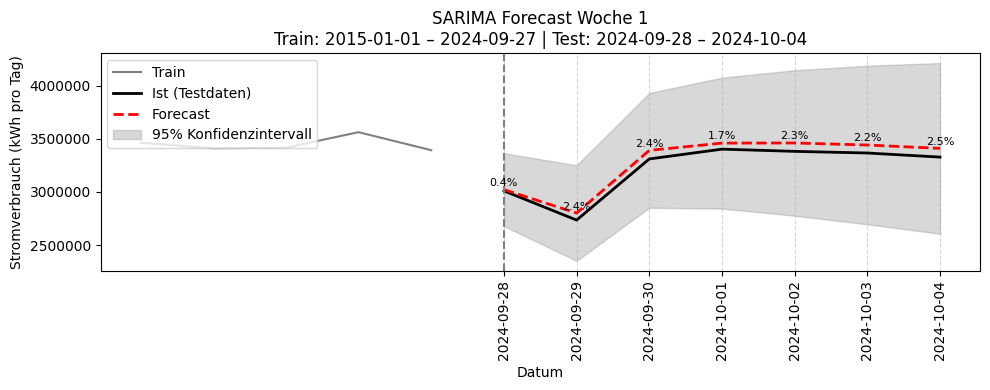

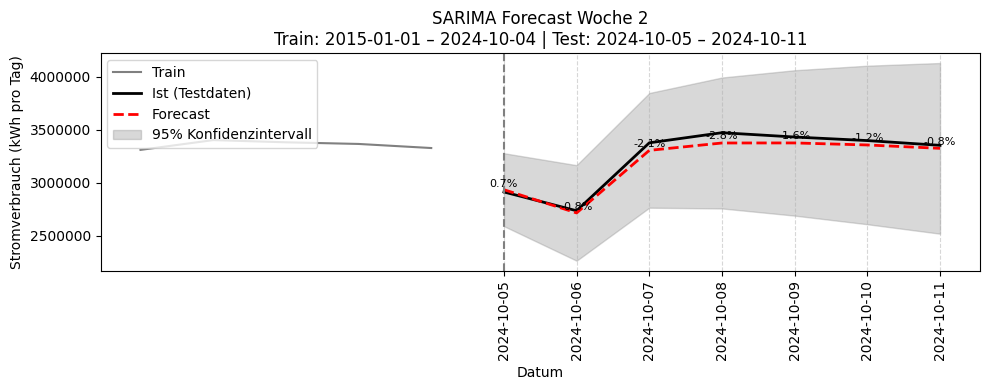

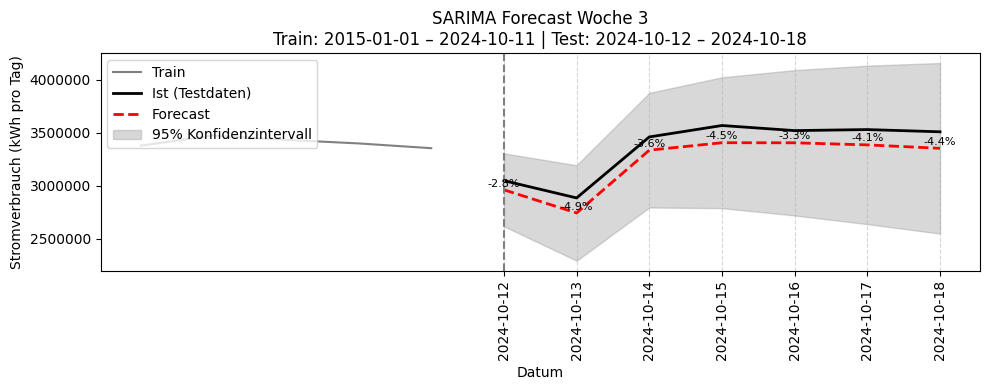

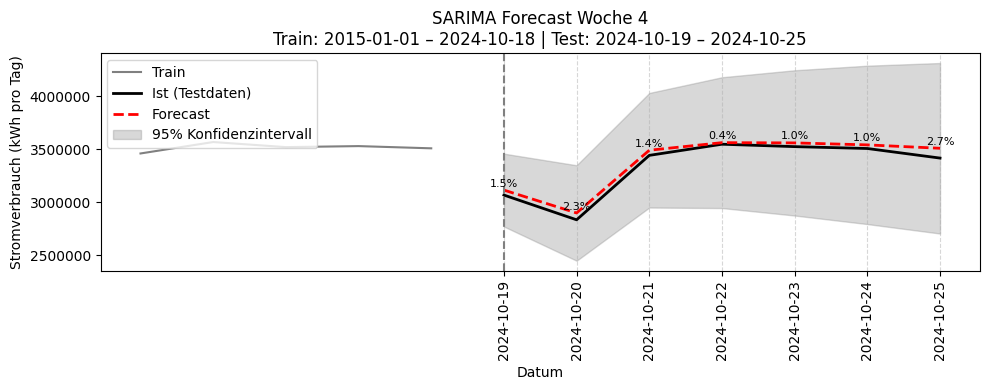

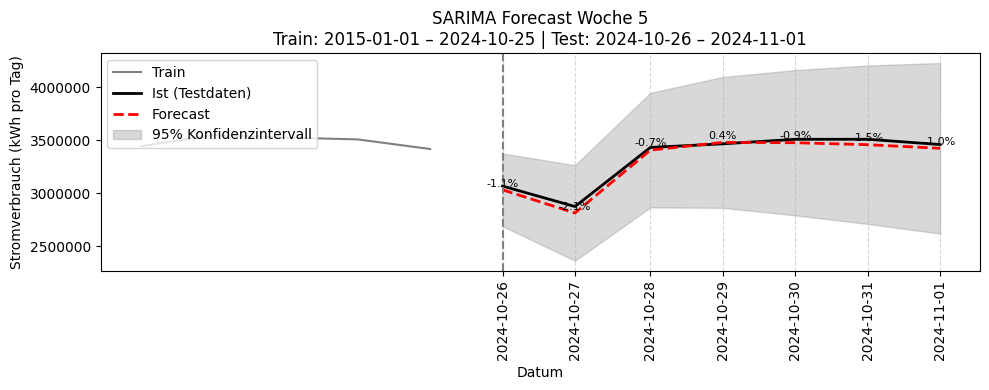

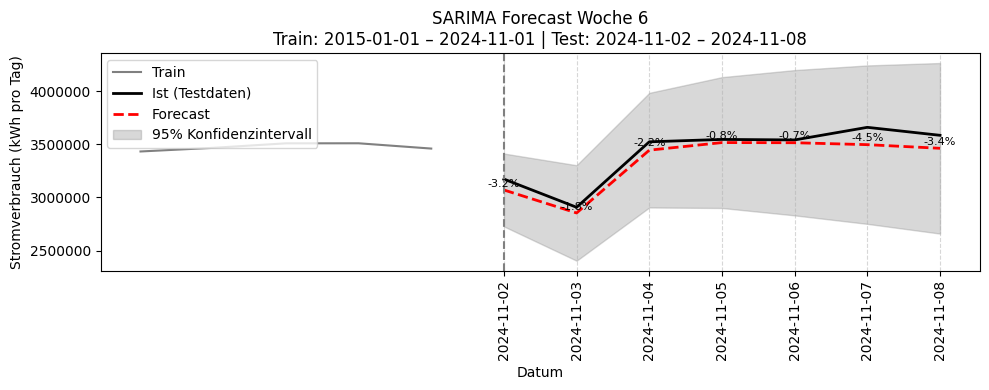


Durchschnittliche Fehlerkennzahlen (alle Wochen):


∅ Abweichung %
Prognosetag                            
1                                  1.64
2                                  2.38
3                                  2.08
4                                  1.77
5                                  1.65
6                                  2.40
7                                  2.48
∅ über alle Tage (MAPE)            2.06
MAE                            68599.05
RMSE                           74169.44

In [79]:
# Parameter
horizon = 7                  # Testfenstergrösse (1 Woche)
n_forecasts = 6             # Anzahl rollierender Testwochen

# Ergebnisse speichern
rmses, maes = [], []
all_relative_errors = []

# Startindex: 4 Wochen vor Schluss
start_idx = len(data) - (n_forecasts + 1) * horizon

for i in range(n_forecasts):
    train_end = start_idx + i * horizon
    test_start = train_end
    test_end = test_start + horizon

    # Trainings- und Testdaten (expanding window)
    train_data = data.iloc[:train_end]
    test_data = data.iloc[test_start:test_end]

    # Modell fitten
    model = SARIMAX(
        endog=train_data["Stromverbrauch"],
        order=(1, 1, 0),
        seasonal_order=(0, 1, 1, 7),
        enforce_stationarity=True,
        enforce_invertibility=True
    )
    results = model.fit(disp=False)

    # Prognose
    forecast = results.get_forecast(steps=horizon)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    forecast_mean.index = test_data.index
    conf_int.index = test_data.index

    # Fehlerkennzahlen
    mae = mean_absolute_error(test_data["Stromverbrauch"], forecast_mean)
    rmse = np.sqrt(mean_squared_error(test_data["Stromverbrauch"], forecast_mean))
    maes.append(mae)
    rmses.append(rmse)

    # Abweichungen berechnen
    vergleich = pd.DataFrame({
        "Ist": test_data["Stromverbrauch"],
        "Prognose": forecast_mean
    })
    vergleich["Abweichung %"] = ((vergleich["Prognose"] - vergleich["Ist"]) / vergleich["Ist"]) * 100
    all_relative_errors.append(vergleich["Abweichung %"].values)

    # Plot
    plt.figure(figsize=(10, 4))

    # Trainingsdaten (letzte 5 Tage)
    train_slice = train_data.iloc[-5:]
    plt.plot(train_slice.index, train_slice["Stromverbrauch"], label="Train", color="gray")

    # Testdaten und Prognose
    plt.plot(test_data.index, test_data["Stromverbrauch"], label="Ist (Testdaten)", color="black", linewidth=2)
    plt.plot(test_data.index, forecast_mean.values, label="Forecast", color="red", linestyle="--", linewidth=2)
    plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="gray", alpha=0.3, label="95% Konfidenzintervall")
    plt.axvline(test_data.index[0], color="gray", linestyle="--")

    # Prozentabweichungen als Text
    for x, val in zip(test_data.index, vergleich["Abweichung %"]):
        plt.text(x, forecast_mean[x] + 0.01 * forecast_mean[x], f"{val:.1f}%", ha='center', fontsize=8)

    plt.xticks(ticks=test_data.index, labels=[d.strftime('%Y-%m-%d') for d in test_data.index], rotation=90)
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    plt.title(
        f"SARIMA Forecast Woche {i+1}\n"
        f"Train: {train_data.index[0].date()} – {train_data.index[-1].date()} | "
        f"Test: {test_data.index[0].date()} – {test_data.index[-1].date()}"
    )
    plt.xlabel("Datum")
    plt.ylabel("Stromverbrauch (kWh pro Tag)")
    plt.ticklabel_format(axis="y", style="plain")
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

# ------------------ Zusammenfassung ------------------
all_relative_errors = np.array(all_relative_errors)
mean_relative_errors_per_day = np.mean(np.abs(all_relative_errors), axis=0)

summary_df = pd.DataFrame({
    "Prognosetag": np.arange(1, horizon + 1),
    "∅ Abweichung %": mean_relative_errors_per_day.round(2)
}).set_index("Prognosetag")

# Zusatzzeilen ergänzen
gesamt_mape = mean_relative_errors_per_day.mean().round(2)
summary_df.loc["∅ über alle Tage (MAPE)"] = [gesamt_mape]
summary_df.loc["MAE"] = [round(np.mean(maes), 2)]
summary_df.loc["RMSE"] = [round(np.mean(rmses), 2)]

# Ausgabe
print("\nDurchschnittliche Fehlerkennzahlen (alle Wochen):")
display(summary_df)


Für den ersten Tag ergibt sich eine Abweichung von **1.64 %** gegenüber dem tatsächlichen Stromverbrauch. Mit wachsendem Prognosehorizont nimmt die Prognosegüte tendenziell ab. Über die gesamte Woche hinweg ergibt sich ein durchschnittlicher Fehler von **2.06 %** pro Tag.


### 4.4.2 SARIMAX


Im zweiten Schritt wird SARIMAX eingesetzt. Dabei handelt es sich um eine Erweiterung des SARIMA-Modells, die zusätzlich exogene Variablen (X) in die Modellierung integriert. Das ermöglicht, externe Einflussgrössen explizit in die Prognose einzubeziehen.

Im Gegensatz zu rein autoregressiven Modellen berücksichtigt SARIMAX nicht nur die Struktur der Zeitreihe selbst, sondern auch erklärende Variablen, die potenziell mit dem Zielwert zusammenhängen (GeeksforGeeks, 2023).


Für die SARIMAX-Modellierung wird derselbe Datenzeitraum verwendet wie beim SARIMA-Modell, wobei der Bereich vom 1. Januar 2015 bis Mitte November 2024 berücksichtigt wird. Zur Bewertung der Modellgüte kommen die selben Testfenster wie bei SARIMA zum Einsatz.

Als Modellkonfiguration wird dasselbe Setup wie im vorherigen Abschnitt verwendet. Die Parameter des SARIMAX-Modells lauten:

- Nicht-saisonale Komponenten:  
  \((p, d, q) = (1, 1, 0)\)

- Saisonale Komponenten:  
  \((P, D, Q, s) = (0, 1, 1, 7)\)
    
    

Dieses Modell geht von einem einfachen autoregressiven Effekt ohne gleitenden Durchschnitt aus, ergänzt durch eine saisonale MA-Komponente bei wöchentlicher Periodizität (7 Tage). Die Differenzierung erfolgt sowohl auf nicht-saisonaler als auch auf saisonaler Ebene jeweils einmal, um Trend und wöchentliche Muster zu eliminieren.


Ergänzend berücksichtigt das SARIMAX-Modell zusätzlich exogene Einflussgrössen. Dazu zählen:
- Lufttemperatur
- Monat
- Wochentag
- Tag des Jahres
- Clusterzugehörigkeit (gemäss Kapitel 4.2)

Die Lufttemperatur wurde in Kapitel 4.3 auf ihren Zusammenhang mit dem Stromverbrauch untersucht. Dabei konnte lediglich ein sehr schwacher Zusammenhang festgestellt werden. Dennoch wird sie als erklärende Variable aufgenommen. Die weiteren Variablen decken saisonale und kalendarische Einflüsse ab, während die Clusterzugehörigkeit die ermittelte Tagesmuster einbezieht.


In [80]:
df_sarimax = df_merged_1d_cluster.copy()

In [81]:
#Spalte Start der Messung als Index
df_sarimax.set_index("Datum", inplace = True)
df_sarimax.sort_index(inplace=True)

In [82]:
#zeitraum festlegen
start_datum = pd.Timestamp("2015-01-01")
end_datum   = pd.Timestamp("2024-11-15")

# Slice aus dem DataFrame ziehen
data = df_sarimax.loc[start_datum:end_datum].copy()

# Kontrolle
print(f"Zeitraum: {data.index.min().date()} bis {data.index.max().date()}")
print(f"Anzahl Tage: {len(data)}")

Zeitraum: 2015-01-01 bis 2024-11-15
Anzahl Tage: 3607


**Expanding Window**

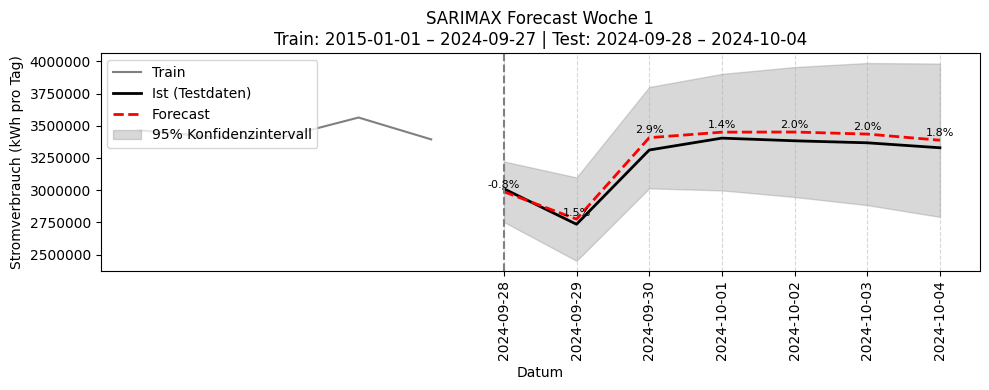

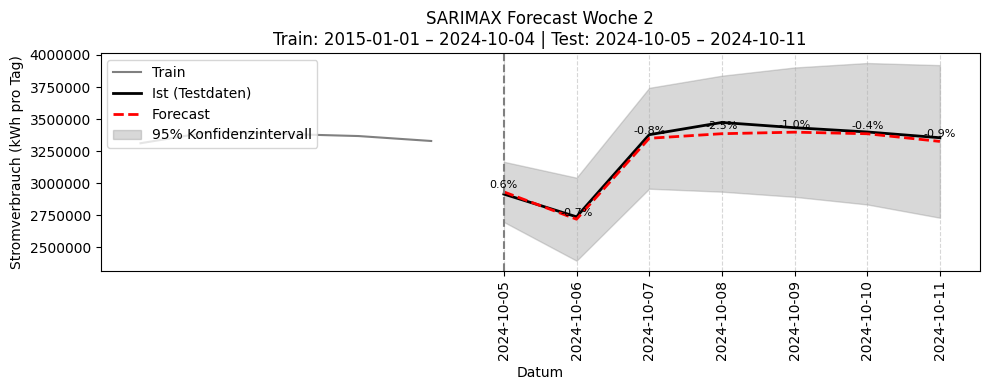

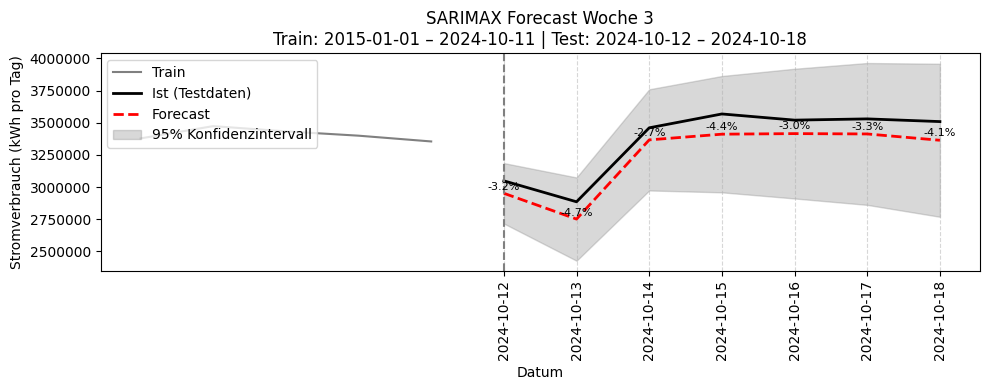

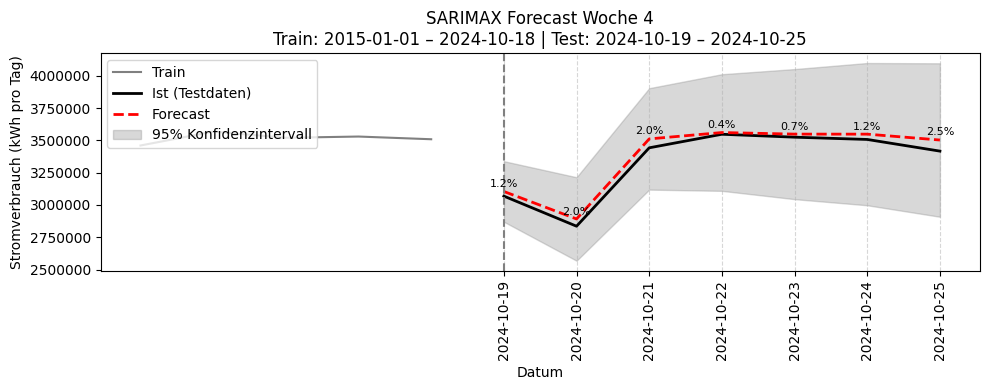

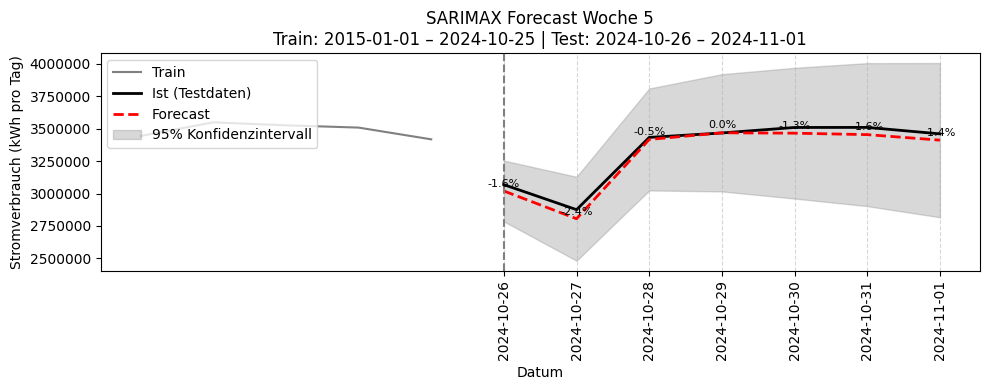

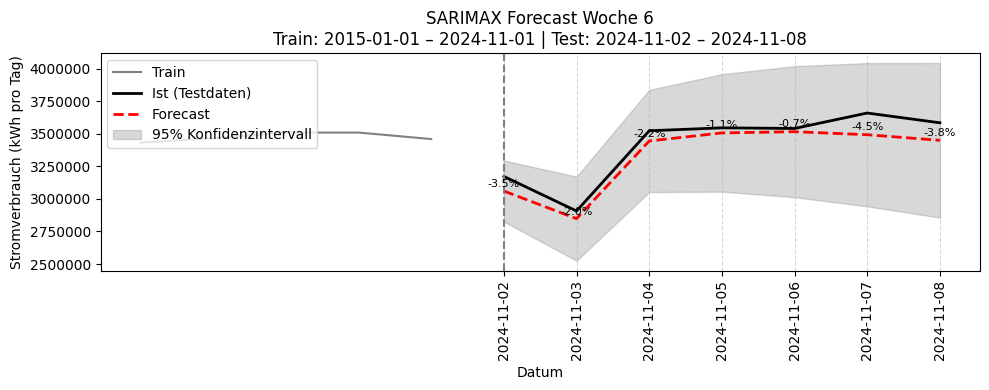


Durchschnittliche Fehlerkennzahlen über alle Testwochen:


∅ Abweichung %
Prognosetag                            
1                                  1.80
2                                  2.21
3                                  1.85
4                                  1.63
5                                  1.44
6                                  2.17
7                                  2.40
∅ über alle Tage (MAPE)            1.93
∅ MAE über alle Wochen         64290.75
∅ RMSE über alle Wochen        70506.66

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Parameter
horizon = 7
n_forecasts = 6
exog_cols = ["Lufttemperatur", "Monat", "Tag des Jahres", "Cluster"]

rmses, maes = [], []
all_relative_errors = []

# Rolling-Startpunkt: 4 Wochen vor Ende
start_idx = len(data) - (n_forecasts + 1) * horizon

for i in range(n_forecasts):
    train_end = start_idx + i * horizon
    test_start = train_end
    test_end = test_start + horizon

    train = data.iloc[:train_end]
    test = data.iloc[test_start:test_end]

    exog_train = train[exog_cols]
    exog_test = test[exog_cols]

    model = SARIMAX(
        endog=train["Stromverbrauch"],
        exog=exog_train,
        order=(1, 1, 0),
        seasonal_order=(0, 1, 1, 7),
        enforce_stationarity=True,
        enforce_invertibility=True
    )
    results = model.fit(disp=False)

    forecast = results.get_forecast(steps=horizon, exog=exog_test)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()

    mae = mean_absolute_error(test["Stromverbrauch"], forecast_mean)
    rmse = np.sqrt(mean_squared_error(test["Stromverbrauch"], forecast_mean))
    maes.append(mae)
    rmses.append(rmse)

    deviations = pd.DataFrame({
        "Ist": test["Stromverbrauch"],
        "Prognose": forecast_mean
    })
    deviations["Abweichung %"] = ((deviations["Prognose"] - deviations["Ist"]) / deviations["Ist"]) * 100
    all_relative_errors.append(deviations["Abweichung %"].values)

    # Visualisierung
    plt.figure(figsize=(10, 4))
    train_slice = train.iloc[-5:]
    plt.plot(train_slice.index, train_slice["Stromverbrauch"], label="Train", color="gray")
    plt.plot(test.index, test["Stromverbrauch"], label="Ist (Testdaten)", color="black", linewidth=2)
    plt.plot(test.index, forecast_mean, label="Forecast", color="red", linestyle="--", linewidth=2)
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="gray", alpha=0.3, label="95% Konfidenzintervall")
    plt.axvline(test.index[0], color="gray", linestyle="--")

    for x, val in zip(test.index, deviations["Abweichung %"]):
        plt.text(x, forecast_mean[x] + 0.01 * forecast_mean[x], f"{val:.1f}%", ha='center', fontsize=8)

    plt.xticks(ticks=test.index, labels=[d.strftime('%Y-%m-%d') for d in test.index], rotation=90)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.legend(loc="upper left")
    plt.title(
        f"SARIMAX Forecast Woche {i+1}\n"
        f"Train: {train.index[0].date()} – {train.index[-1].date()} | "
        f"Test: {test.index[0].date()} – {test.index[-1].date()}"
    )
    plt.xlabel("Datum")
    plt.ylabel("Stromverbrauch (kWh pro Tag)")
    plt.ticklabel_format(axis="y", style="plain")
    plt.tight_layout()
    plt.show()

# ------------------ Zusammenfassung ------------------
all_relative_errors = np.array(all_relative_errors)
mean_relative_errors_per_day = np.mean(np.abs(all_relative_errors), axis=0)

summary_df = pd.DataFrame({
    "Prognosetag": np.arange(1, horizon + 1),
    "∅ Abweichung %": mean_relative_errors_per_day.round(2)
}).set_index("Prognosetag")

# MAPE, MAE, RMSE ergänzen
summary_df.loc["∅ über alle Tage (MAPE)"] = [round(mean_relative_errors_per_day.mean(), 2)]
summary_df.loc["∅ MAE über alle Wochen"] = [round(np.mean(maes), 2)]
summary_df.loc["∅ RMSE über alle Wochen"] = [round(np.mean(rmses), 2)]

# Ausgabe
print("\nDurchschnittliche Fehlerkennzahlen über alle Testwochen:")
display(summary_df)


Für den ersten Tag ergibt sich eine Abweichung von **1.80 %** gegenüber dem tatsächlichen Stromverbrauch. Über die gesamte Woche hinweg liegt der durchschnittliche Prognosefehler bei **1.93 %** pro Tag und ist damit leicht besser als beim SARIMA-Modell.


### 4.4.3 XGBoost

Als drittes Modell wird XGBoost (Extreme Gradient Boosting) eingesetzt. Es handelt sich um ein leistungsstarkes, nicht-lineares Regressionsverfahren aus dem Bereich des überwachten maschinellen Lernens. XGBoost basiert auf der Methode des Gradient Boosting, bei der schwache Entscheidungsbäume schrittweise zu einem starken Gesamtmodell kombiniert werden.

Gradient Boosting funktioniert folgendermassen: Zuerst wird ein einfaches Modell trainiert, das die Daten grob vorhersagt. Danach wird ein zweites Modell darauf trainiert, die Fehler des ersten zu korrigieren. Dieser Prozess wird viele Male wiederholt. Jedes neue Modell konzentriert sich darauf, die noch verbleibenden Fehler der bisherigen Modelle zu verbessern. Am Ende entsteht eine Kombination vieler kleiner Modelle, die zusammen eine sehr präzise Vorhersage ermöglichen.

Im Gegensatz zu SARIMA und SARIMAX ist XGBoost kein Zeitreihenmodell im engeren Sinn. Statt autoregressive Strukturen direkt zu modellieren, lernt es aus manuell erstellten Features wie Zeitindikatoren, Lag-Werten und exogenen Variablen. Die Qualität des Modells hängt dabei stark von der Feature-Auswahl und der gewählten Auflösung ab.

Ein entscheidender Vorteil von XGBoost ist die hohe Flexibilität: Das Modell kann komplexe, nichtlineare Zusammenhänge zwischen Input-Features und Zielvariable erkennen. In dieser Arbeit wird XGBoost auf Viertelstundenbasis trainiert, was eine detaillierte Modellierung des tageszeitlichen Verbrauchsverlaufs ermöglicht, im Gegensatz zu den zeitreihenbasierten Modellen, die mit Tageswerten arbeiten  (NVIDIA, o. J.).

Die Trainingsdaten umfassen dabei sowohl vergangene Verbrauchswerte (Lags) als auch erklärende Variablen wie Wochentag, Uhrzeit oder Temperatur.

Für die XGBoost-Modellierung wird der Datensatz auf 15-Minuten-Intervalle verwendet. Der betrachtete Zeitraum entspricht demjenigen der SARIMA- und SARIMAX-Modelle: vom 1. Januar 2015 bis Mitte November 2024.

Zur Einbindung der zeitlichen Dynamik werden verschiedene Lag-Features generiert, die vergangene Verbrauchswerte in das Modell einspeisen:
- **1 Stunde Verzögerung (lag_1h)**  
- **1 Tag Verzögerung (lag_1d)**  
- **1 Woche Verzögerung (lag_1w)**


Die Modellbewertung erfolgt an den selben Prognosefenstern wie bei SARIMA und SARIMAX.


In [84]:
df_xgboost = df_merged_15min.copy()

In [85]:
#Spalte Start der Messung als Index
df_xgboost.set_index("Zeitstempel", inplace = True)
df_xgboost.sort_index(inplace=True)

In [86]:
tz = df_xgboost.index.tz

# Zeitraum auswählen
start_datum = pd.Timestamp("2015-01-01", tz=tz)
end_datum   = pd.Timestamp("2024-11-15", tz=tz)

# Slice ziehen
data = df_xgboost.loc[start_datum:end_datum].copy()

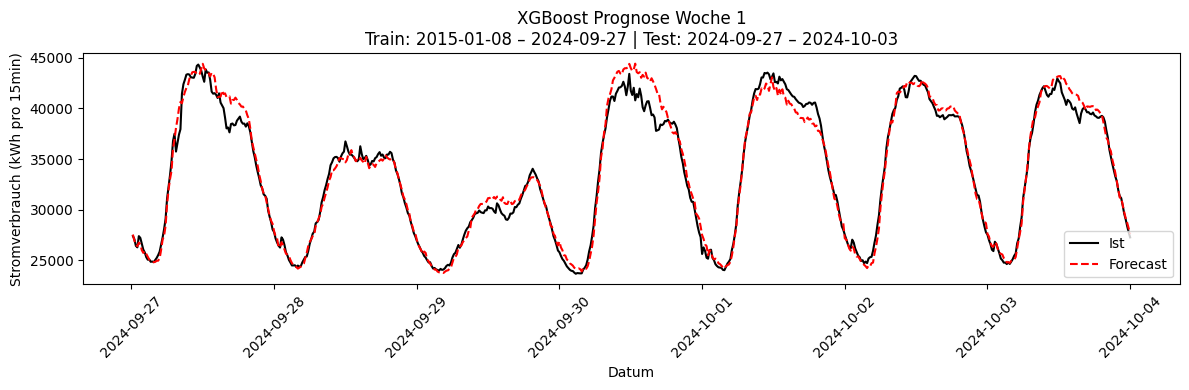

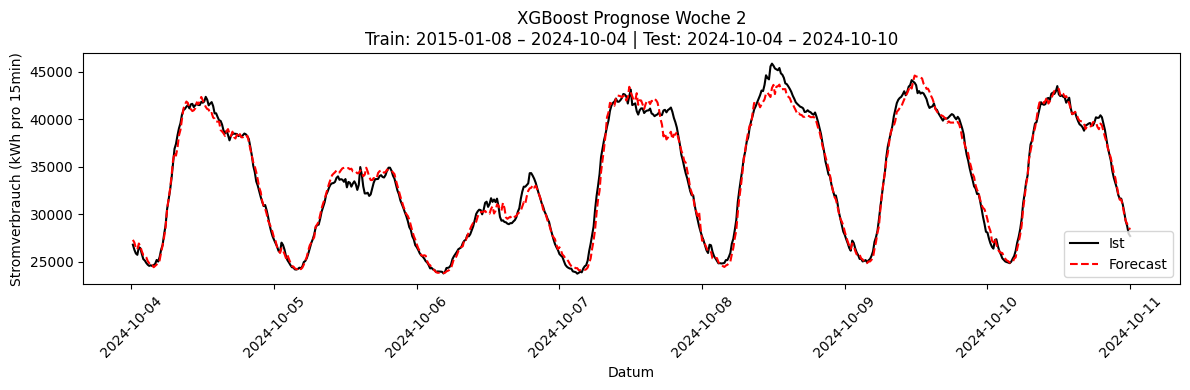

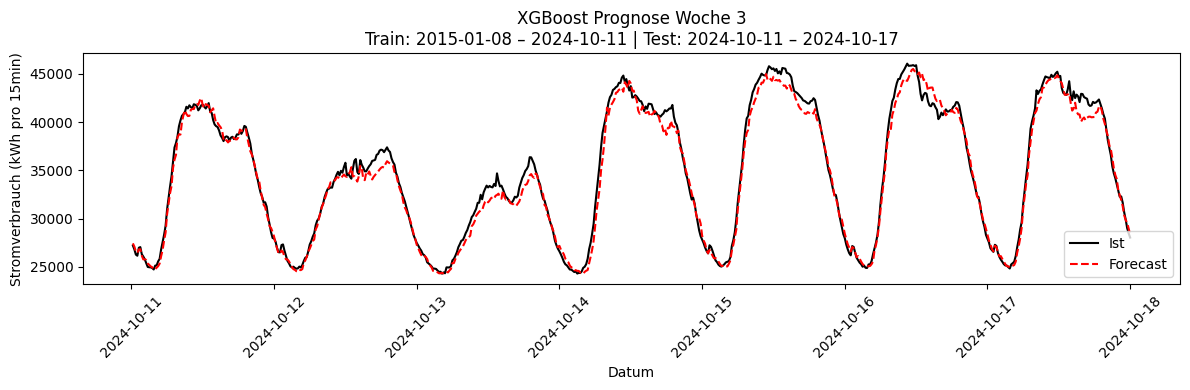

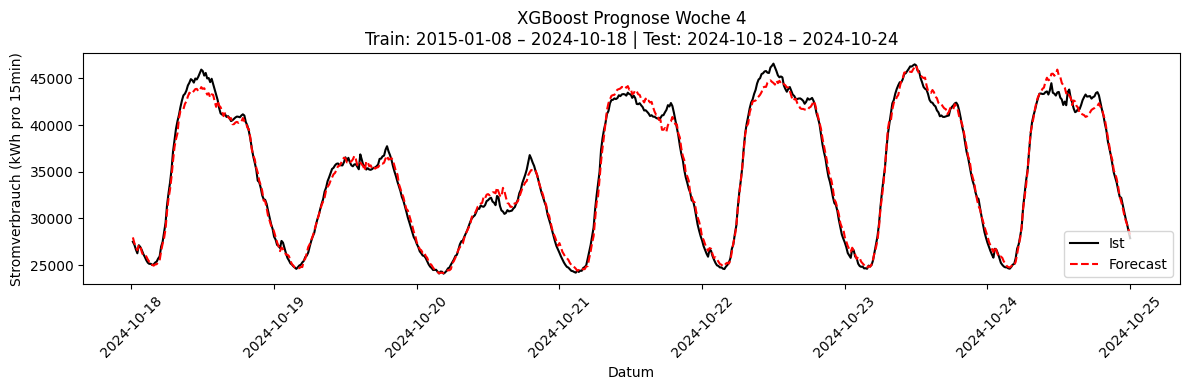

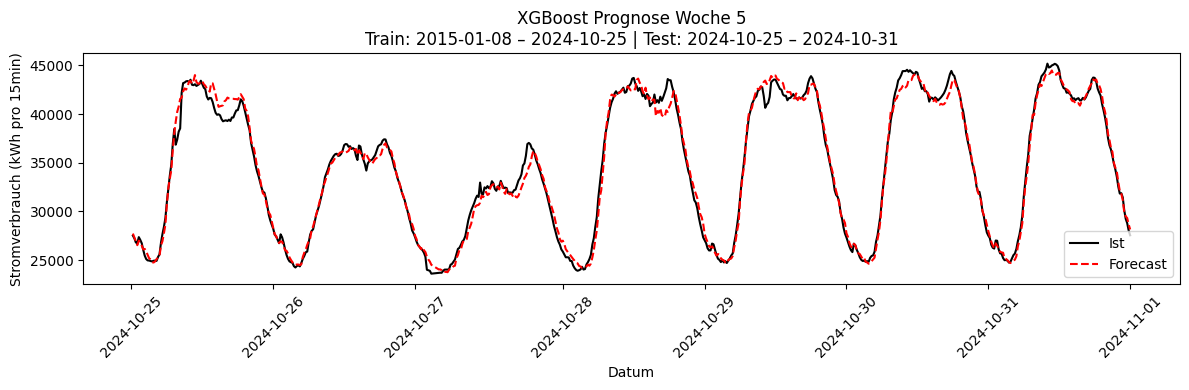

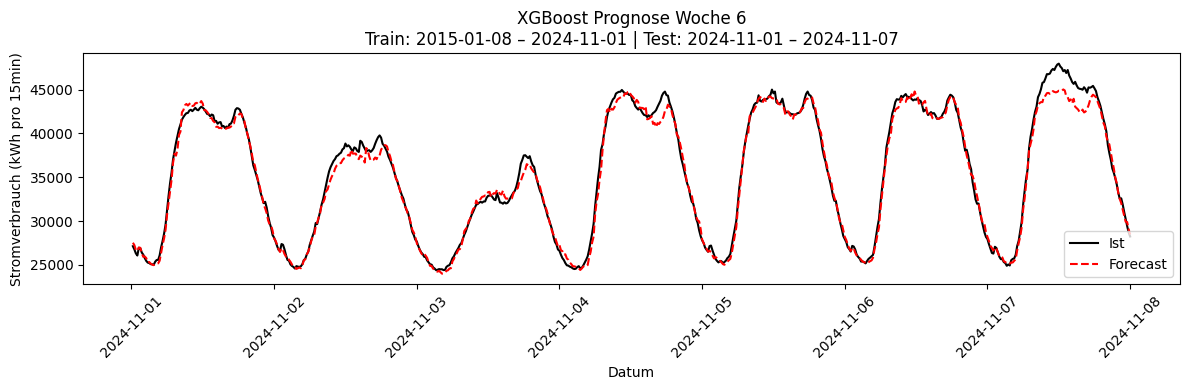


Durchschnittlicher RMSE über alle Wochen: 837.89
Durchschnittlicher MAE  über alle Wochen: 613.2

Durchschnittliche relative Abweichung je Prognosetag:


∅ Abweichung %
Prognosetag                            
1                                  1.59
2                                  1.45
3                                  1.75
4                                  2.48
5                                  1.64
6                                  1.46
7                                  1.67
∅ über alle Tage (MAPE)            1.72
∅ MAE über alle Wochen           613.20
∅ RMSE über alle Wochen          837.89

In [87]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ------------------ Parameter ------------------
horizon = 672  # 7 Tage à 96 Punkte (15-Minuten-Daten)
n_forecasts = 6
lags = [4, 96, 672]  # 1h, 1d, 1w Lags in 15min-Schritten
target = "Stromverbrauch"
exog = ["Lufttemperatur", "Monat", "Wochentag", "Tag des Jahres"]

# ------------------ Daten vorbereiten ------------------
df = data.copy()
df = df.sort_index()

# Lag-Features hinzufügen
for lag in lags:
    df[f"lag_{lag}"] = df[target].shift(lag)

df = df.dropna()

# ------------------ Rolling Forecast (Expanding Window) ------------------
start_idx = len(df) - (n_forecasts + 1) * horizon
rmses, maes = [], []
all_relative_errors = []

for i in range(n_forecasts):
    train_end = start_idx + i * horizon
    test_start = train_end
    test_end = test_start + horizon

    train = df.iloc[:train_end]
    test = df.iloc[test_start:test_end]

    X_train = train[exog + [f"lag_{l}" for l in lags]]
    y_train = train[target]
    X_test = test[exog + [f"lag_{l}" for l in lags]]
    y_test = test[target]

    # Modelltraining
    model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    # Prognose
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    rmses.append(rmse)
    maes.append(mae)

    # Fehlerberechnung in %
    abweichung_prozent = ((y_pred - y_test) / y_test) * 100
    all_relative_errors.append(abweichung_prozent.values)

    # Forecast-Plot
    plt.figure(figsize=(12, 4))
    plt.plot(y_test.index, y_test, label="Ist", color="black")
    plt.plot(y_test.index, y_pred, label="Forecast", color="red", linestyle="--")
    plt.title(
        f"XGBoost Prognose Woche {i+1}\n"
        f"Train: {train.index[0].date()} – {train.index[-1].date()} | "
        f"Test: {y_test.index[0].date()} – {(y_test.index[-1] - pd.Timedelta(minutes=15)).date()}"
    )
    plt.xlabel("Datum")
    plt.ylabel("Stromverbrauch (kWh pro 15min)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ------------------ Ergebnis zusammenfassen ------------------

# MAE und RMSE berechnen
mean_rmse = np.mean(rmses).round(2)
mean_mae = np.mean(maes).round(2)
print(f"\nDurchschnittlicher RMSE über alle Wochen: {mean_rmse}")
print(f"Durchschnittlicher MAE  über alle Wochen: {mean_mae}")

# ------------------ Zusammenfassung ausgeben ------------------

all_relative_errors = np.array(all_relative_errors)

# Aggregation zu täglichen Mittelwerten (z. B. bei 15min-Auflösung: 96 Werte pro Tag)
n_days = 7
mean_relative_errors_per_day = (
    np.abs(all_relative_errors)
    .reshape(n_forecasts, n_days, -1)
    .mean(axis=2)  # Mittel über Zeitpunkte pro Tag
    .mean(axis=0)  # Mittel über Wochen
)

# Tabelle aufbauen
summary_df = pd.DataFrame({
    "Prognosetag": np.arange(1, n_days + 1),
    "∅ Abweichung %": mean_relative_errors_per_day.round(2)
}).set_index("Prognosetag")

# Zusätzliche Gesamtwerte einfügen
mape = mean_relative_errors_per_day.mean().round(2)
summary_df.loc["∅ über alle Tage (MAPE)"] = [mape]
summary_df.loc["∅ MAE über alle Wochen"] = [mean_mae]
summary_df.loc["∅ RMSE über alle Wochen"] = [mean_rmse]

# Ausgabe
print("\nDurchschnittliche relative Abweichung je Prognosetag:")
display(summary_df)


Das XGBoost-Modell zeigt mit einer Abweichung von **1.59 %** am ersten Prognosetag den niedrigsten Startfehler und schlägt damit sowohl SARIMA als auch SARIMAX. Über die gesamte Woche bleibt die Prognosegüte relativ konstant, mit einem durchschnittlichen Fehler von **1.72 %**, was ebenfalls die besten Werte im Vergleich darstellt.

# 5 Ergebnisse darstellen und interpretieren

In diesem Kapitel werden die Resultate der drei implementierten Prognosemodelle SARIMA, SARIMAX und XGBoost gegenübergestellt und analysiert. Ziel ist es, die Prognosequalität der Modelle auf Basis der prozentualen Abweichung vom Prognosewert zum tatsächlichen Verbrauch zu beurteilen.

Zur Evaluation wird immer der Zeitraum vom 27. September 2024 bis zum 1. November 2024 betrachtet. Im Folgenden werden die einzelnen Modelle analysiert.


## 5.1 SARIMA

Die Plots zeigen für sechs aufeinanderfolgende Wochen jeweils die tatsächlichen Messwerte der Zielwoche, die Prognosen mit 95-Prozent-Konfidenzintervall sowie zur Einordnung die letzten Punkte aus dem Trainingszeitraum.

Die Prognosequalität variiert dabei von Woche zu Woche. In Woche 5 zeigt SARIMA eine sehr gute Leistung. Der reale Lastverlauf wird eng erfasst.

In Woche 3 hingegen ist eine systematische Unterschätzung zu erkennen. Das Modell bleibt über mehrere Tage hinweg unter dem tatsächlichen Verbrauchsniveau.

In Woche 6 kommt es am 7. November 2024 zu einem deutlichen Verbrauchssprung, den das Modell nicht antizipieren kann. Die Prognose bleibt klar unter dem tatsächlichen Verlauf.

Die durchschnittlichen Fehlerkennzahlen ergänzen die visuelle Analyse:

| Prognosetag | Ø Abweichung (%) |
|-------------|------------------|
| 1           | 1.64             |
| 2           | 2.38             |
| 3           | 2.08             |
| 4           | 1.77             |
| 5           | 1.65             |
| 6           | 2.40             |
| 7           | 2.48             |
| **Ø über alle Tage (MAPE)** | **2.06** |
| **MAE**     | **68'599.05**    |
| **RMSE**    | **74'169.44**    |

Auffällig ist, dass die durchschnittliche Abweichung innerhalb der Prognosewoche tendenziell zunimmt. Während der erste Tag (jeweils Samstag) mit 1.64 Prozent den geringsten Fehler aufweist, steigen die Werte bis Freitag (Tag 7) auf 2.48 Prozent an. Eine Ausnahme bilden Tag 4 und 5 (Dienstag und Mittwoch), an denen die Abweichung wieder sinkt. Dieses Muster deutet darauf hin, dass die Prognoseunsicherheit vor allem durch die zeitliche Distanz zum letzten verfügbaren Trainingspunkt beeinflusst wird.

Insgesamt zeigt SARIMA eine solide Prognoseleistung bei stabilen Verbrauchsverläufen. In Situationen mit plötzlichen strukturellen Änderungen reagiert das Modell jedoch nur eingeschränkt.


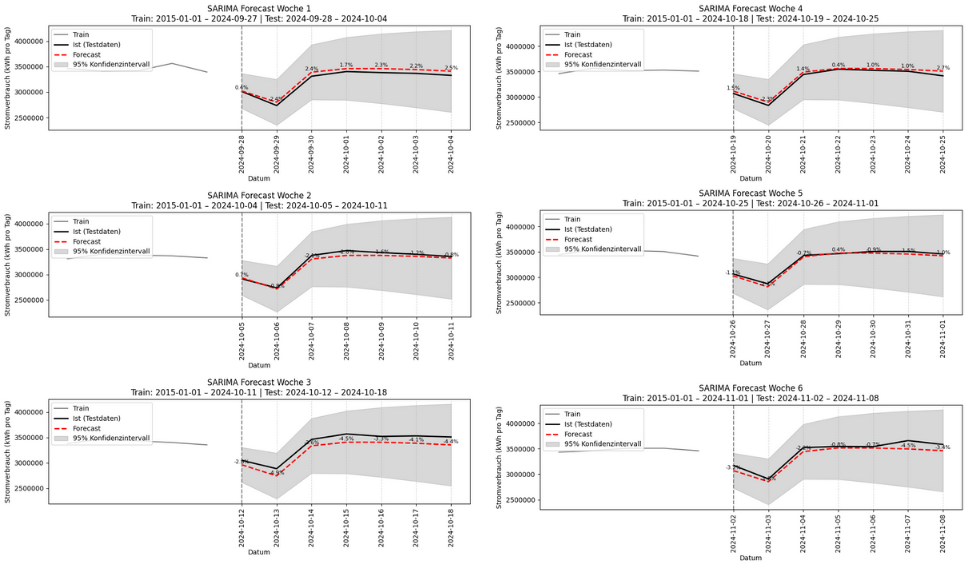

In [88]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/sarima_prognosen.png')


## 5.2 SARIMAX

Die Plots zeigen für sechs aufeinanderfolgende Wochen jeweils die tatsächlichen Messwerte der Zielwoche, die Prognosen mit 95-Prozent-Konfidenzintervall sowie zur Einordnung die letzten Punkte aus dem Trainingszeitraum.

Auch beim SARIMAX-Modell variiert die Prognosequalität je nach Woche. In Woche 5 zeigt das Modell eine besonders gute Leistung. Die Vorhersage liegt über mehrere Tage hinweg sehr nah an den tatsächlichen Verbrauchswerten. Auch Woche 2 ist positiv hervorzuheben: Der Lastverlauf wird dort insgesamt stabil und eng innerhalb des Prognosebands abgebildet.

In Woche 3 hingegen ist erneut eine leichte systematische Unterschätzung zu beobachten. Über fast die gesamte Woche bleibt die Prognose leicht unterhalb des tatsächlichen Verbrauchs, wenn auch mit geringerer Abweichung als beim SARIMA-Modell.

In Woche 6 zeigt sich wie zuvor am 7. November 2024 ein sprunghafter Anstieg im Verbrauch. Auch SARIMAX kann diesen nicht vollständig vorwegnehmen, bleibt jedoch näher an den tatsächlichen Werten als SARIMA, was auf eine höhere Anpassungsfähigkeit durch die exogenen Variablen hinweist.

Die durchschnittlichen Fehlerkennzahlen ergänzen die visuelle Analyse:

| Prognosetag | Ø Abweichung (%) |
|-------------|------------------|
| 1           | 1.80             |
| 2           | 2.21             |
| 3           | 1.85             |
| 4           | 1.63             |
| 5           | 1.44             |
| 6           | 2.17             |
| 7           | 2.40             |
| **Ø über alle Tage (MAPE)** | **1.93** |
| **MAE**     | **64'290.75**    |
| **RMSE**    | **70'506.66**    |

Auch beim SARIMAX-Modell zeigt sich eine tendenziell steigende Abweichung im Verlauf der Woche. Der erste Tag der Prognose beginnt mit 1.80 Prozent, gegen Ende der Woche steigen die Werte auf bis zu 2.40 Prozent. Zwischenzeitlich sinkt die Abweichung an Tag 4 und 5. Die zeitliche Distanz zum letzten Trainingspunkt bleibt jedoch ein Unsicherheitsfaktor.

Insgesamt lässt sich feststellen, dass SARIMAX eine leicht bessere Prognosequalität als SARIMA erreicht. Der Einbezug exogener Variablen wirkt sich insbesondere bei unregelmässigeren Verläufen positiv auf die Modellleistung aus.


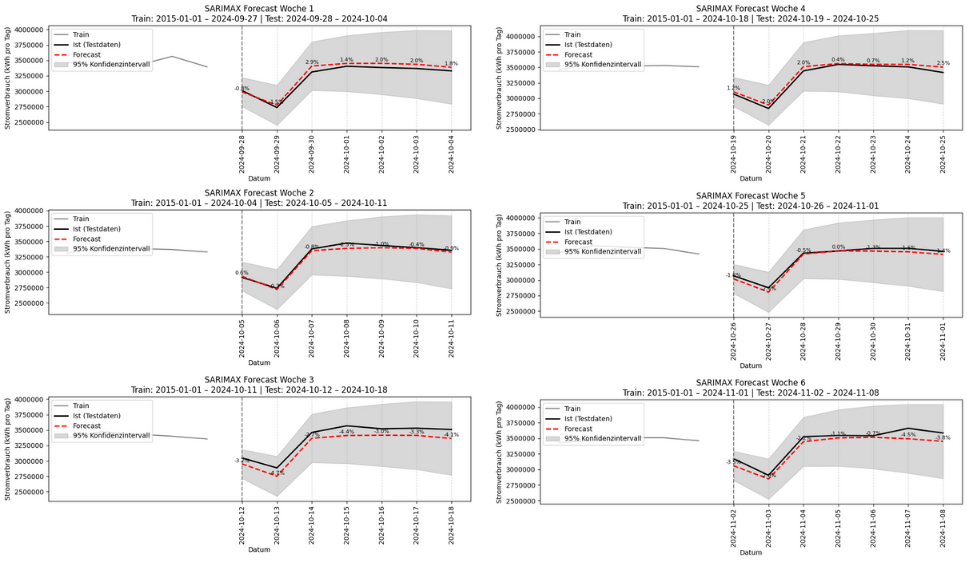

In [89]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/sarimax_prognosen.png')


### 5.3 XGBoost

Die Plots zeigen für sechs aufeinanderfolgende Wochen jeweils die tatsächlichen Messwerte der Zielwoche sowie die Prognosen des XGBoost-Modells.

Anders als bei SARIMA und SARIMAX arbeitet das XGBoost-Modell nicht mit aggregierten Tageswerten, sondern auf Basis von Viertelstundenwerten. Dadurch kann der tageszeitliche Verlauf modelliert werden.

XGBoost liefert über alle Wochen hinweg eine auffallend präzise Abbildung des Lastverlaufs. Der Tagesgang wird sehr genau nachgebildet, und auch kleinere Schwankungen werden vom Modell gut erfasst. Auch in Woche 3, wo SARIMA und SARIMAX zu einer systematischen Unterschätzung neigten, bleibt XGBoost sehr nah an den realen Verbrauchsdaten.

In Woche 1 ist am 30. September 2024 eine deutliche Überschätzung zu beobachten. Das Modell prognostiziert einen signifikant höheren Verbrauch als tatsächlich gemessen wurde. Am 7. November 2024 zeigt sich in Woche 6 eine auffällige Unterschätzung. Diese trat in ähnlicher Form auch bei SARIMA und SARIMAX auf, was auf einen atypischen Verbrauch an diesem spezifischen Tag hindeutet, den keines der Modelle antizipieren konnte.

Die durchschnittlichen Fehlerkennzahlen verdeutlichen die hohe Prognosegüte:

| Prognosetag | Ø Abweichung (%) |
|-------------|------------------|
| 1           | 1.59             |
| 2           | 1.45             |
| 3           | 1.75             |
| 4           | 2.48             |
| 5           | 1.64             |
| 6           | 1.46             |
| 7           | 1.67             |
| **Ø über alle Tage (MAPE)** | **1.72** |
| **MAE**     | **613.20**       |
| **RMSE**    | **837.89**       |

Im Vergleich zu den anderen Modellen ist die durchschnittliche Abweichung innerhalb der Woche deutlich geringer ausgeprägt. Tag 4 (Dienstag) weist mit 2.48 Prozent den höchsten Fehlerwert auf, was sich vor allem durch die starke Überschätzung am 30. September erklären lässt. Der Rest der Woche bleibt dagegen sehr konstant. Das spricht für eine robuste und tageszeitlich differenzierte Modellierung.

Besonders auffällig sind die sehr niedrigen absoluten Fehlerwerte. MAE und RMSE liegen um ein Vielfaches unter denen der zeitreihenbasierten Modelle. Dies ist in erster Linie auf die feinere zeitliche Auflösung der Daten zurückzuführen. Viertelstundenwerte führen zu kleineren numerischen Abweichungen.

Insgesamt zeigt XGBoost die stabilste Prognoseleistung aller getesteten Modelle. Die Kombination aus hoher zeitlicher Auflösung, exogenen Einflussgrössen und nichtlinearer Modellierung ermöglicht eine detailgetreue Abbildung des Stromverbrauchs über alle Wochentage hinweg.


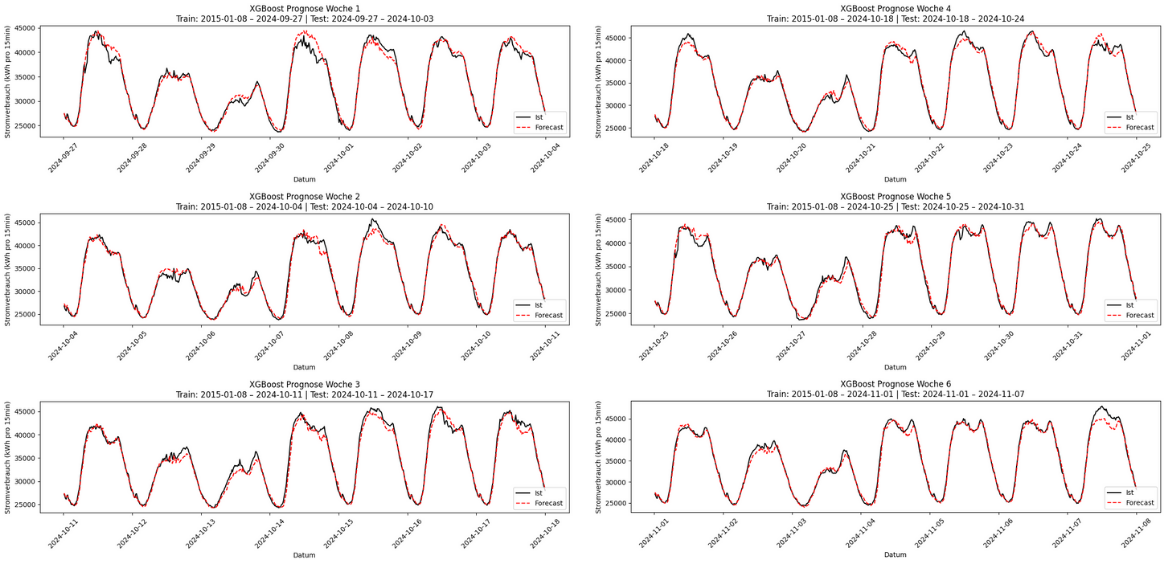

In [90]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Share_WiSquad/Abgabe/images/xgboost_prognosen.png')

## 5.4 Vergleich aller Modelle

Die folgende Übersicht fasst die Prognosegüte der drei getesteten Modelle SARIMA, SARIMAX und XGBoost anhand zentraler Fehlerkennzahlen zusammen:

| Prognosetag | SARIMA (%) | SARIMAX (%) | XGBoost (%) |
|-------------|-------------|--------------|--------------|
| 1           | 1.64        | 1.80         | 1.59         |
| 2           | 2.38        | 2.21         | 1.45         |
| 3           | 2.08        | 1.85         | 1.75         |
| 4           | 1.77        | 1.63         | 2.48         |
| 5           | 1.65        | 1.44         | 1.64         |
| 6           | 2.40        | 2.17         | 1.46         |
| 7           | 2.48        | 2.40         | 1.67         |
| **Ø über alle Tage (MAPE)** | **2.06** | **1.93** | **1.72** |
| **MAE**     | **68'599.05** | **64'290.75** | **613.20** |
| **RMSE**    | **74'169.44** | **70'506.66** | **837.89** |

Im direkten Vergleich zeigt sich, dass XGBoost über alle Prognosetage hinweg die geringste mittlere prozentuale Abweichung (MAPE) aufweist. Auch SARIMAX schneidet leicht besser ab als SARIMA. Der Unterschied zwischen den beiden Modellen liegt ausschliesslich im Einbezug exogener Variablen. In dieser Arbeit wurde dafür die Lufttemperatur verwendet. Da diese nur einen sehr geringen linearen Zusammenhang mit dem Stromverbrauch aufweist, konnte kein wesentlicher Performancegewinn erzielt werden. Möglicherweise wären andere wetterbezogene Einflussgrössen geeigneter gewesen. So könnte etwa die Sonnenscheindauer einen stärkeren Einfluss haben, da bei hoher Sonnen Einstrahlung mehr Strom dezentral produziert wird und entsprechend weniger aus dem Netz bezogen werden muss.

Die absoluten Fehlerwerte MAE und RMSE fallen bei XGBoost um ein Vielfaches geringer aus als bei den zeitreihenbasierten Modellen. Dieser Unterschied ist jedoch primär auf die unterschiedliche zeitliche Auflösung der Daten zurückzuführen. Während SARIMA und SARIMAX mit aggregierten Tageswerten arbeiten, basiert XGBoost auf Viertelstundenwerten. Dadurch entstehen kleinere numerische Fehler, die nicht direkt mit den Tageswerten vergleichbar sind.

XGBoost ist in der Lage, den tageszeitlichen Verbrauchsverlauf sehr genau zu erfassen und auch kurzfristige Schwankungen zuverlässig abzubilden. Die Prognosegüte nimmt über die sieben Prognosetage hinweg nur geringfügig ab, was für eine hohe Stabilität des Modells spricht.

Insgesamt zeigt sich, dass XGBoost die robusteste und genaueste Prognose über alle betrachteten Wochen hinweg liefert. Die zeitreihenbasierten Modelle bieten eine solide Grundlage, stossen jedoch bei abrupten Änderungen oder nichtlinearen Mustern an ihre Grenzen.


## 5.5 Fazit

Im Vergleich der drei getesteten Modelle erzielte XGBoost die besten Ergebnisse. Neben der geringsten durchschnittlichen Abweichung über alle Prognosetage hinweg überzeugt das Modell vor allem durch seine Fähigkeit, den tageszeitlichen Verlauf präzise abzubilden. Die höhere zeitliche Auflösung durch die Verwendung von Viertelstundenwerten stellt dabei einen entscheidenden Vorteil dar, da sie eine feingranulare Prognose ermöglicht und kurzfristige Schwankungen im Stromverbrauch erfassen kann.

Ein nächster logischer Schritt wäre, die Struktur des XGBoost-Modells weiter zu optimieren. Insbesondere die Auswahl und Gestaltung der Lags sowie der exogenen Variablen könnten weiterentwickelt werden.  Als relevante Einflussgrössen sollte weitere metrologische Merkmale wie Sonnenscheindauer untersucht werden.

Auch im Fall von SARIMAX sollte die Auswahl exogener Variablen überdacht werden. Die in dieser Arbeit verwendete Lufttemperatur erwies sich als wenig korrelierend mit dem Stromverbrauch. Hier könnten alternative Grössen wie Strahlung, Niederschlag mehr Einfluss auf die Prognosequalität haben.

Generell wäre es sinnvoll, die Modelle über weitere Zeiträume hinweg zu testen, um die Robustheit der Prognose zu validieren. Ebenso könnte es aufschlussreich sein, unterschiedliche Wochentage als ersten Prognosetag zu definieren, um allfällige Abhängigkeiten vom Startpunkt der Vorhersage zu identifizieren.

Insgesamt sind wir mit dem Verlauf und den Ergebnissen dieser Case Study sehr zufrieden. Gleichzeitig hat uns das Thema auch technisch begeistert. Die Arbeit an den Prognosen war nicht nur analytisch herausfordernd, sondern auch fachlich spannend. Die Projektarbeit hat unser Interesse an datenbasierten Lösungen gestärkt und uns gezeigt, wie viel Potenzial in datengetriebenen analysen steckt.


# Quellen


Chartered Professional Accountants Canada. (2020, January). *From data to decisions: A five-step approach to data-driven decision making*. https://www.cpacanada.ca

GeeksforGeeks. (2021, November 17). Hierarchical clustering in data mining. https://www.geeksforgeeks.org/hierarchical-clustering-in-data-mining/

GeeksforGeeks. (2022, August 22). SARIMA – Seasonal autoregressive integrated moving average. https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

GeeksforGeeks. (2023, April 7). *Complete guide to SARIMAX in Python*. https://www.geeksforgeeks.org/complete-guide-to-sarimax-in-python/

NVIDIA. (o. J.). *XGBoost*. https://www.nvidia.com/en-us/glossary/xgboost/

Pennsylvania State University. (o. J.). Lesson 4: Nonstationary time series. STAT 510: Applied Time Series Analysis. https://online.stat.psu.edu/stat510/Lesson04

Verband Schweizerischer Elektrizitätsunternehmen (VSE). (2025). *Prognose von Produktion und Verbrauch (BPP – 2025)*. https://www.strom.ch/de


